#Project- Time Series Forecasting


## Sparkling Sales Analysis & Forecasting

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

Data set for the Problem: Sparkling.csv



In [1]:
#Importing the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pylab import rcParams

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import  mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import month_plot, plot_acf, plot_pacf

from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

##**1. Read the data as an appropriate Time Series data and plot the data.**


In [2]:
df=pd.read_csv('Sparkling.csv')
df

YearMonth  Sparkling
0     1980-01       1686
1     1980-02       1591
2     1980-03       2304
3     1980-04       1712
4     1980-05       1471
..        ...        ...
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

[187 rows x 2 columns]

#### Creating the Time Stamps and adding to the data frame to make it a Time Series Data

In [3]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [4]:
# Adding the time stamp to the data frame
df['Year_Month'] = pd.DataFrame(date)
df

YearMonth  Sparkling Year_Month
0     1980-01       1686 1980-01-31
1     1980-02       1591 1980-02-29
2     1980-03       2304 1980-03-31
3     1980-04       1712 1980-04-30
4     1980-05       1471 1980-05-31
..        ...        ...        ...
182   1995-03       1897 1995-03-31
183   1995-04       1862 1995-04-30
184   1995-05       1670 1995-05-31
185   1995-06       1688 1995-06-30
186   1995-07       2031 1995-07-31

[187 rows x 3 columns]

In [6]:
#Changing the time series column to Index
df.set_index('Year_Month',inplace=True)

In [7]:
#Dropping the YearMonth column
df.drop(['YearMonth'], axis=1, inplace=True)

In [8]:
df

Sparkling
Year_Month           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471
...               ...
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

[187 rows x 1 columns]

In [9]:
#Checking Shape of the data
df.shape

(187, 1)

In [10]:
#Checking the information of the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


- **Insights**
 - The DataFrame has 187 entries with a DatetimeIndex ranging from January 1980 to July 1995.
 - The 'Sparkling' column is of integer type (int64), and it has 187 non-null values.


#### Ploting the Time Series

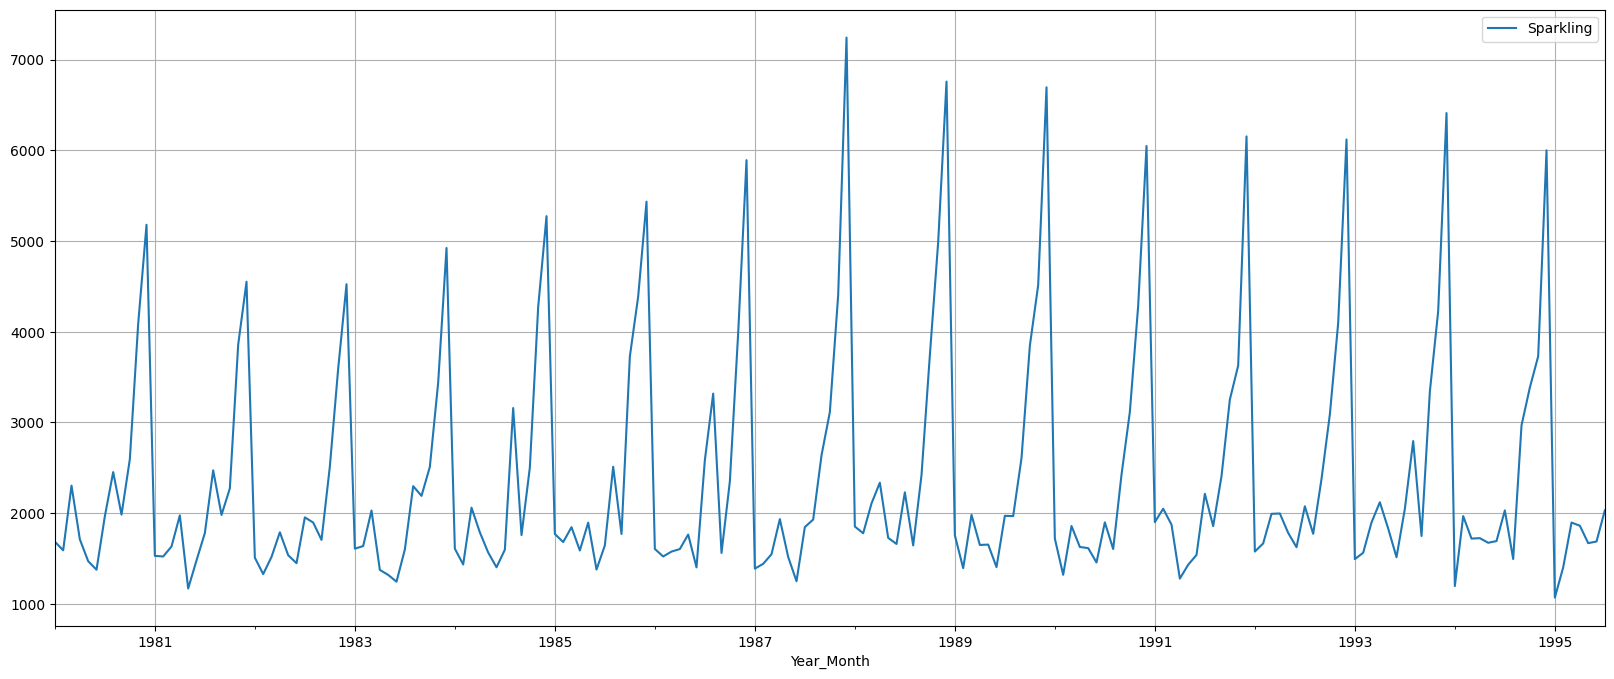

In [11]:
rcParams['figure.figsize'] = 20,8
df.plot()
plt.grid();

- **Insights**

 - **Increasing Trend**: The sales of Sparkling products have been steadily increasing over the years, indicating a positive trend in customer demand.

 - **Seasonal Patterns**:  We observe that there are specific periods each year when sales spike, especially during November and December. These peaks might be due to the holiday season, when people tend to buy more Sparkling products for celebrations
 - Historical data will enable accurate forecasting for better planning.






## **2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.**


In [12]:
#Checking Null Values
df.isnull().sum()

Sparkling    0
dtype: int64

- There are no Null values in the dataset, which means the series is complete & ideal for analysis

In [13]:
#Duplicate values
df.duplicated().sum()

11

- The dataset shows 11 Duplicates, however, this could be the same no of sales at different year, let's validate it.

In [14]:
duplicates = df[df.duplicated(keep=False)]
duplicates

Sparkling
Year_Month           
1981-02-28       1523
1982-03-31       1518
1982-08-31       1897
1983-01-31       1609
1984-01-31       1609
1985-01-31       1771
1985-07-31       1645
1985-09-30       1771
1986-02-28       1523
1986-03-31       1577
1986-04-30       1605
1987-05-31       1518
1988-08-31       1645
1989-08-31       1968
1990-01-31       1720
1990-08-31       1605
1992-01-31       1577
1994-02-28       1968
1994-03-31       1720
1994-07-31       2031
1995-03-31       1897
1995-07-31       2031

- As per the above, it is clear that there are no duplicate values againt a particular timestamp.

#### Checking the basic measures of descriptive statistics

In [15]:
df.describe().T

count         mean         std     min     25%     50%     75%  \
Sparkling  187.0  2402.417112  1295.11154  1070.0  1605.0  1874.0  2549.0   

              max  
Sparkling  7242.0

- **Insights**
 -  The dataset contains 187 observations of sparkling product sales.
 - On average, there are approximately 2402 sales
 - Half of the sales fall below 1874, indicating a balanced distribution around the median value.
 - The sales data has a moderate level of variability, with a standard deviation of about 1295.
 - The minimum recorded sales for sparkling products is 1070, while the maximum is 7242.






#### Boxplot to understand the spread of Sales across different years and within different months across years.

Skewness = 1.82


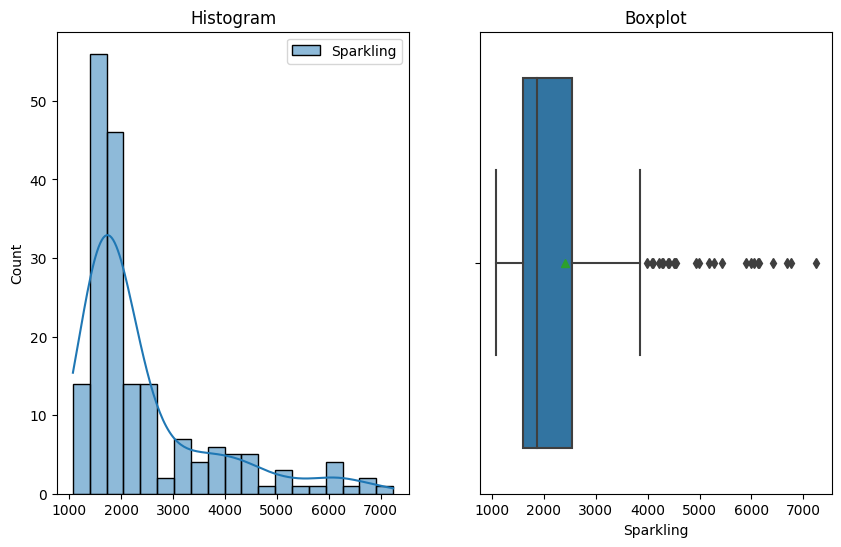

In [16]:
# Historgram & Boxplot of the sales

plt.figure(figsize = [10, 6])
plt.subplot(1,2,1)
plt.title('Histogram')
sns.histplot(df, kde = True);

plt.subplot(1,2,2)
plt.title('Boxplot')
sns.boxplot(x = df['Sparkling'], showmeans = True);
print('Skewness =', round(df['Sparkling'].skew(), 2));


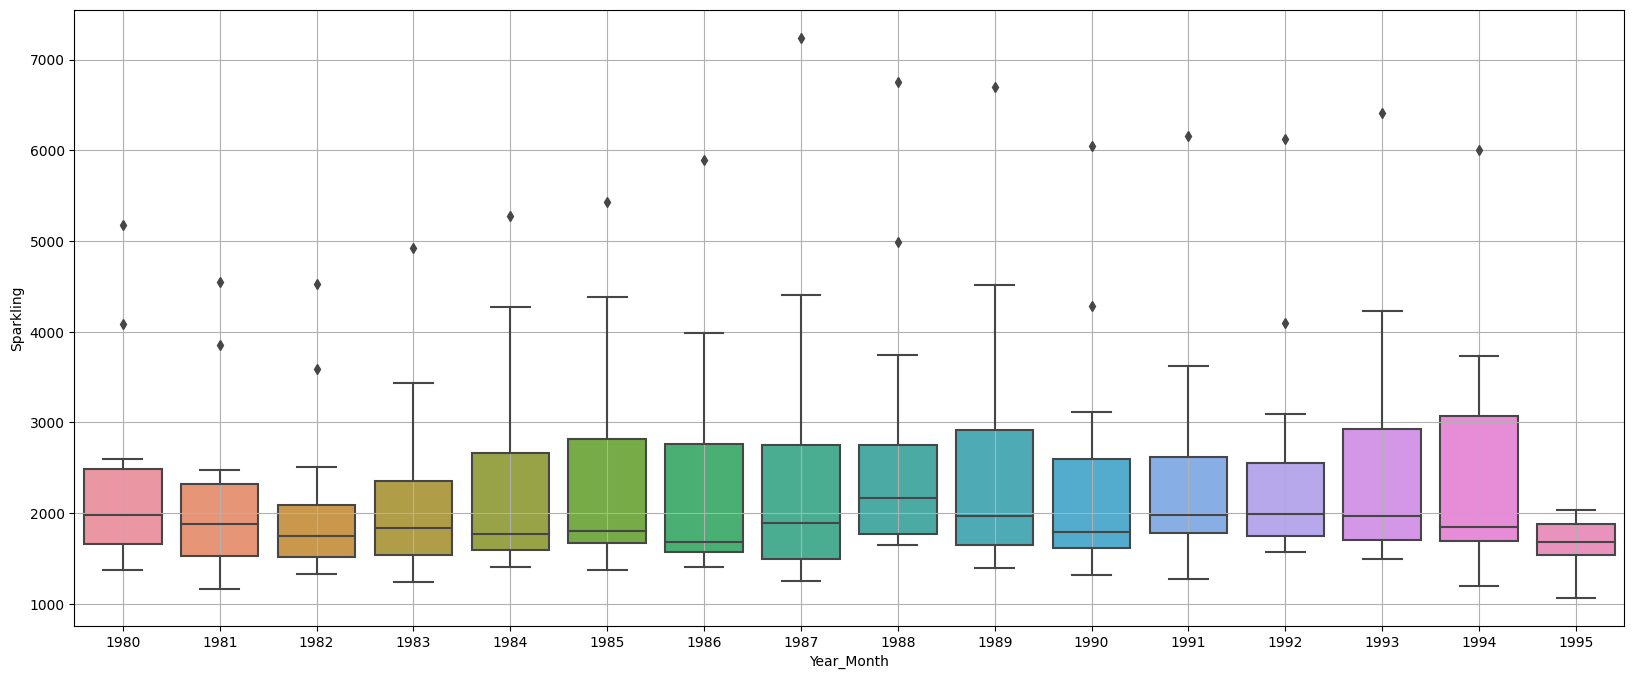

In [17]:
#Yearly Boxplot
sns.boxplot(x = df.index.year,y = df['Sparkling'])
plt.grid();


- **Insights**
 - Sales of Sparkling products have been increasing, with median sales rising over time.
 - The dataset is skewed with the presence of outliers on the right tail.
 - There is significant variability in sales from year to year, with a large interquartile range.
 - There are a few outliers in the data, which could be due to special promotions, holidays or other occasions


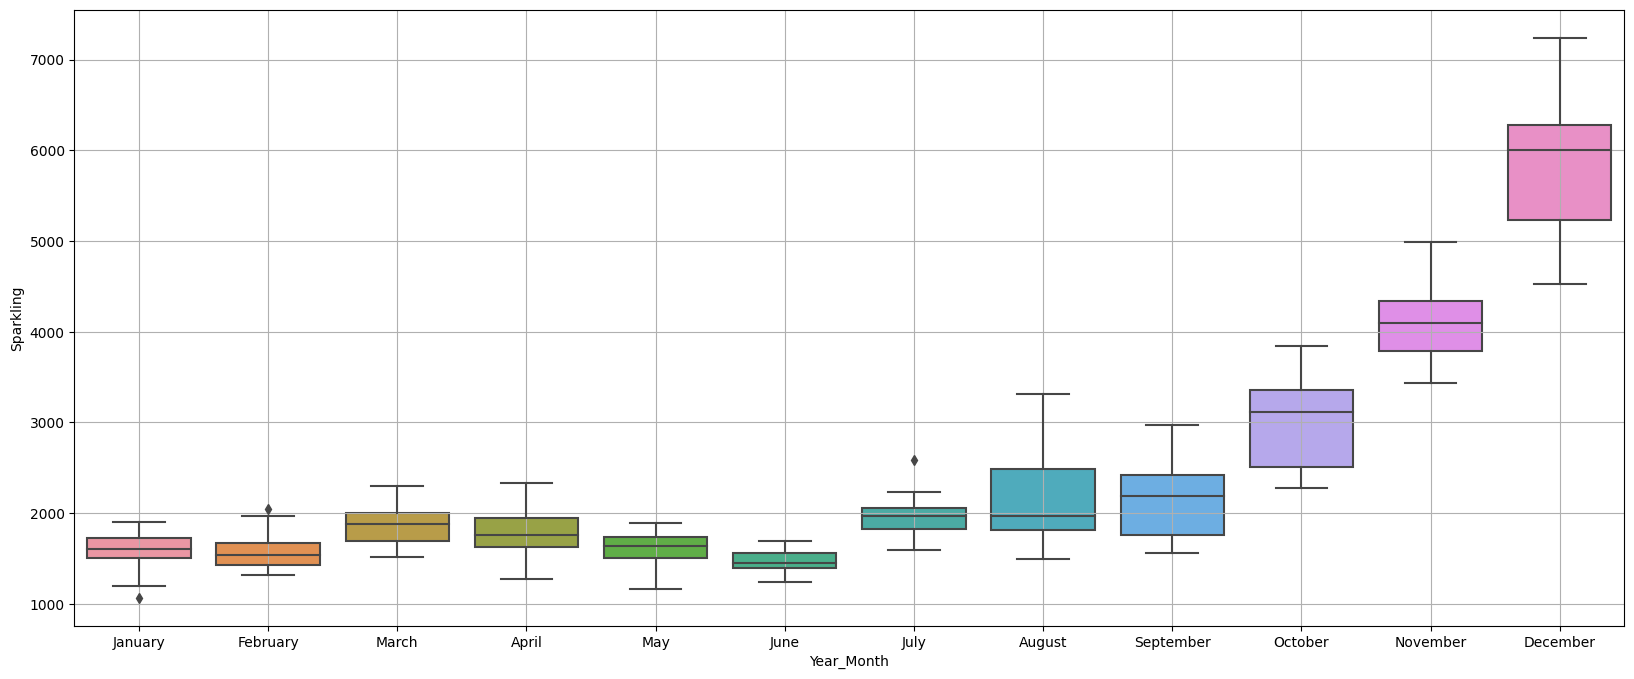

In [18]:
#Monthly boxplot
sns.boxplot(x = df.index.month_name(),y = df['Sparkling'])
plt.grid();

#### Time series month Plot to understand the spread of sales across different years and within different months across years.

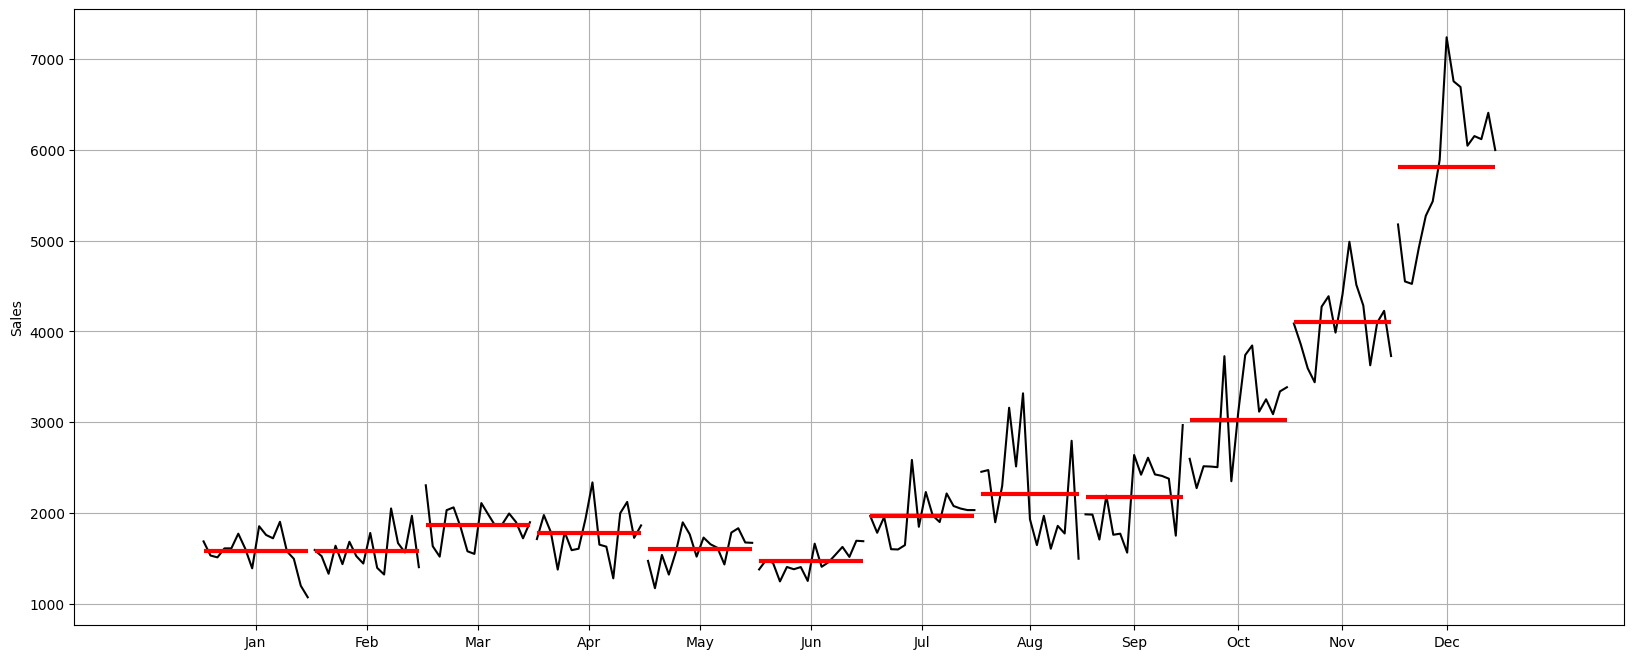

In [19]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(df['Sparkling'],ylabel='Sales')
plt.grid();

**Insights**

- The Month Plot provides insights into the distribution of the Time Series data across different months, with the red line representing the median value.

- Upon analyzing the Month Plot, we can observe a constant (stable) trend that remains consistent across all the years for each month, except for December. Additionally, the plot shows clear seasonal patterns across the months.

- In December, the sales initially dip, then experience an increase, followed by another drop, eventually stabilizing over the years. This pattern in December's sales aligns with the overall trend observed in the entire time series.

- The evidence suggests that December might be a significant month influencing the trend in the time series, given that it has the maximum sales compared to other months.






#### Monthly Sales across years Plot

In [20]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

Year_Month      1       2       3       4       5       6       7       8   \
Year_Month                                                                   
1980        1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981        1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982        1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983        1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984        1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985        1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986        1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987        1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988        1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989        1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990        1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991        1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992        1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993        1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994        1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995        1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

Year_Month      9       10      11      12  
Year_Month                                  
1980        1984.0  2596.0  4087.0  5179.0  
1981        1981.0  2273.0  3857.0  4551.0  
1982        1706.0  2514.0  3593.0  4524.0  
1983        2191.0  2511.0  3440.0  4923.0  
1984        1759.0  2504.0  4273.0  5274.0  
1985        1771.0  3727.0  4388.0  5434.0  
1986        1562.0  2349.0  3987.0  5891.0  
1987        2638.0  3114.0  4405.0  7242.0  
1988        2421.0  3740.0  4988.0  6757.0  
1989        2608.0  3845.0  4514.0  6694.0  
1990        2424.0  3116.0  4286.0  6047.0  
1991        2408.0  3252.0  3627.0  6153.0  
1992        2377.0  3088.0  4096.0  6119.0  
1993        1749.0  3339.0  4227.0  6410.0  
1994        2968.0  3385.0  3729.0  5999.0  
1995           NaN     NaN     NaN     NaN

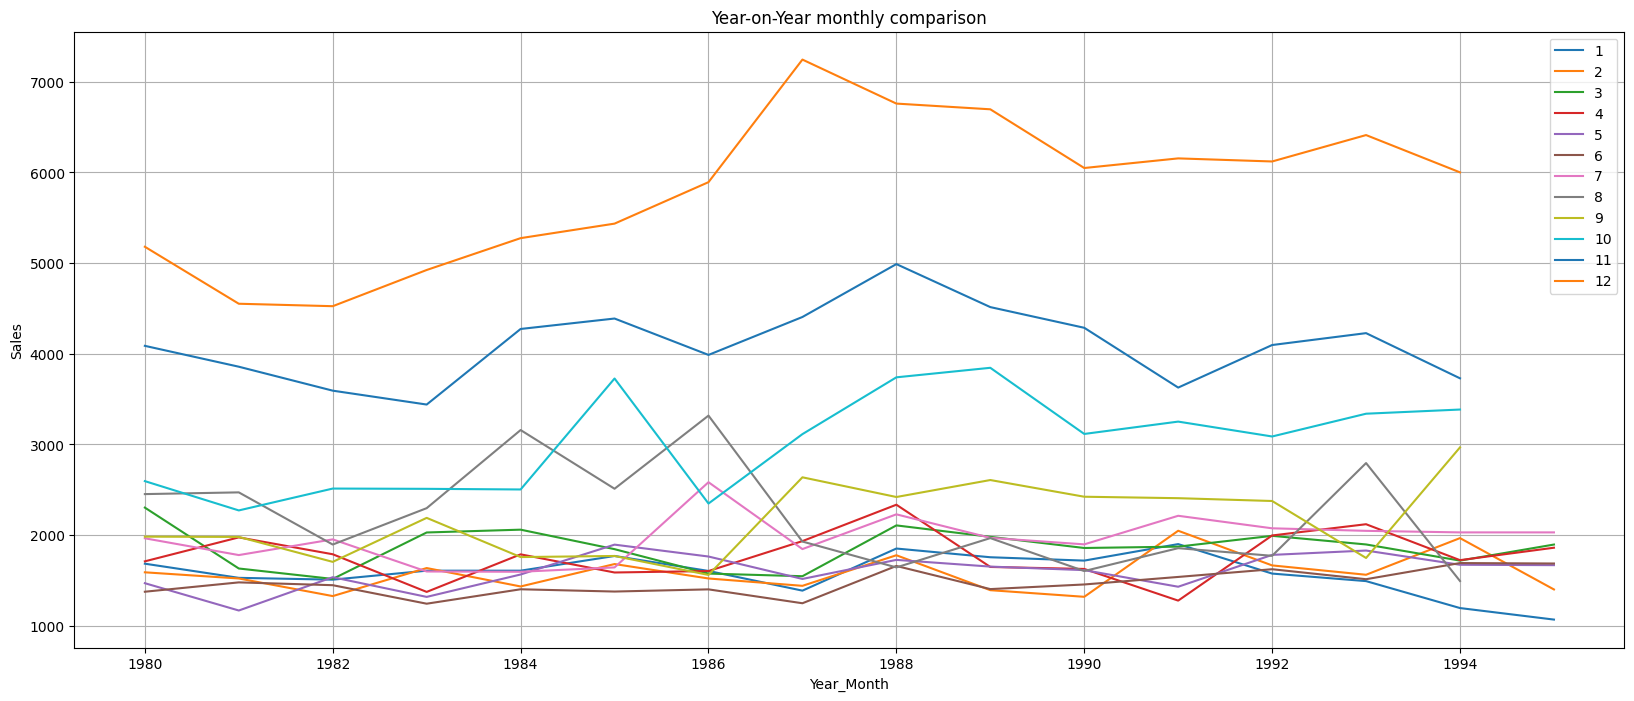

In [21]:
monthly_sales_across_years.plot(title = 'Year-on-Year monthly comparison', ylabel = 'Sales');
plt.grid()
plt.legend(loc='best');

- **Insights**

  - This  shows us the behaviour of the Sparkling sales across various months.
 - The sales are highest in December. The sale appears to drop in the month of January and is stable till July, with seasonal patterns across years.
 - There is significant variability in sales from month to month
 - There are a few outliers in the data, which could be due to special promotions, holidays or other occasions


#### Empirical Cumulative Distribution Plot

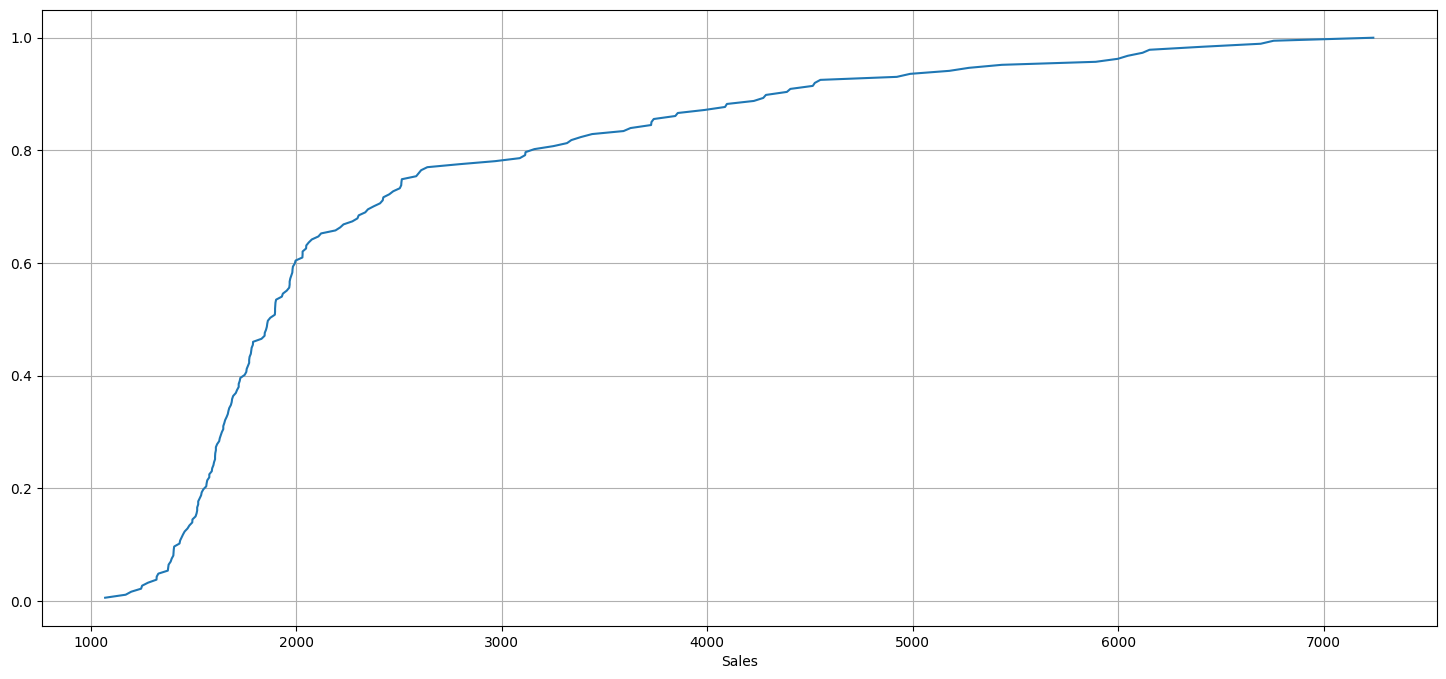

In [22]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

- **Insights**
  - This graph tells us what percentage of data points refer to what number of Sales.
 - The distribution of sales is skewed to the right. This means that there are more sales at the lower end of the distribution than at the higher end.


#### Average Sparkling Sales per month and the month on month percentage change of Sales.

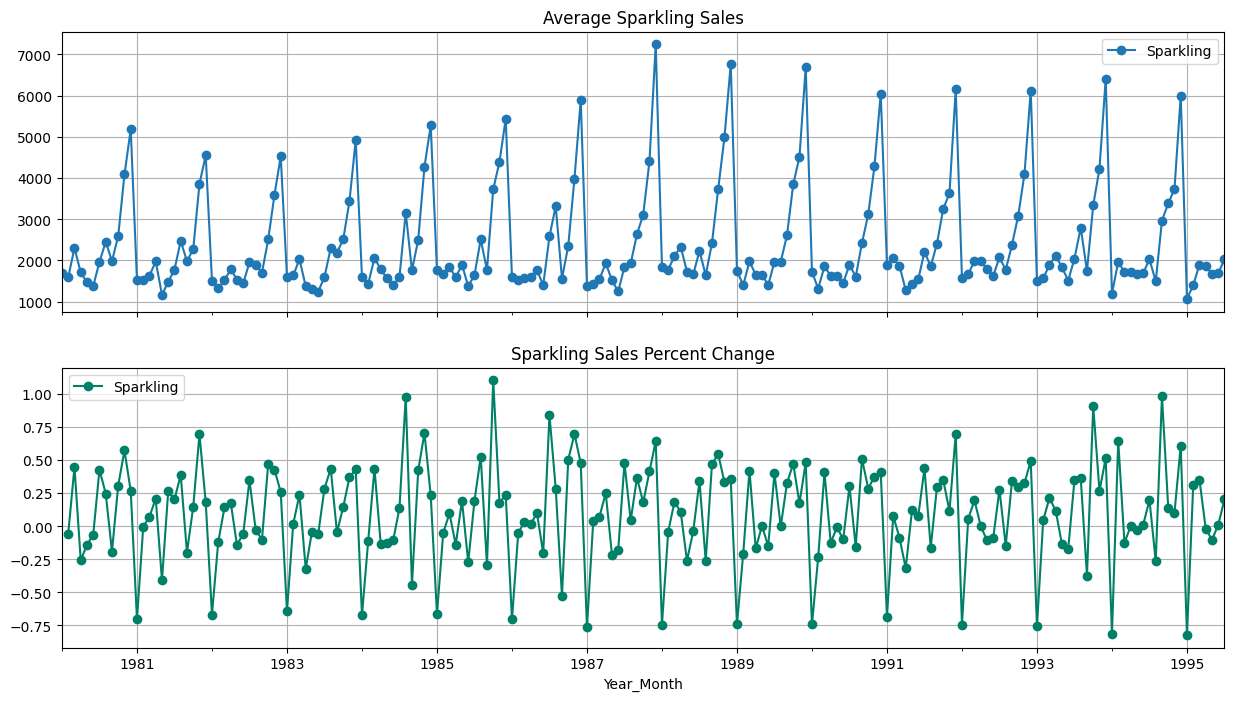

In [23]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling Sales Percent Change",grid=True)

- **Insights**
  - The average sales are increasing year-on-year. This is evident from the fact that the line graph is generally increasing.
 - The year-on-year percentage change in sales is positive for most years, but there are some years with negative changes increasing, but there are some periods where it decreases.
 - There is a seasonal pattern in sales, with sales being highest in December.

#### Decompose the Time Series and plot the different components.

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

##### Additive Decomposition

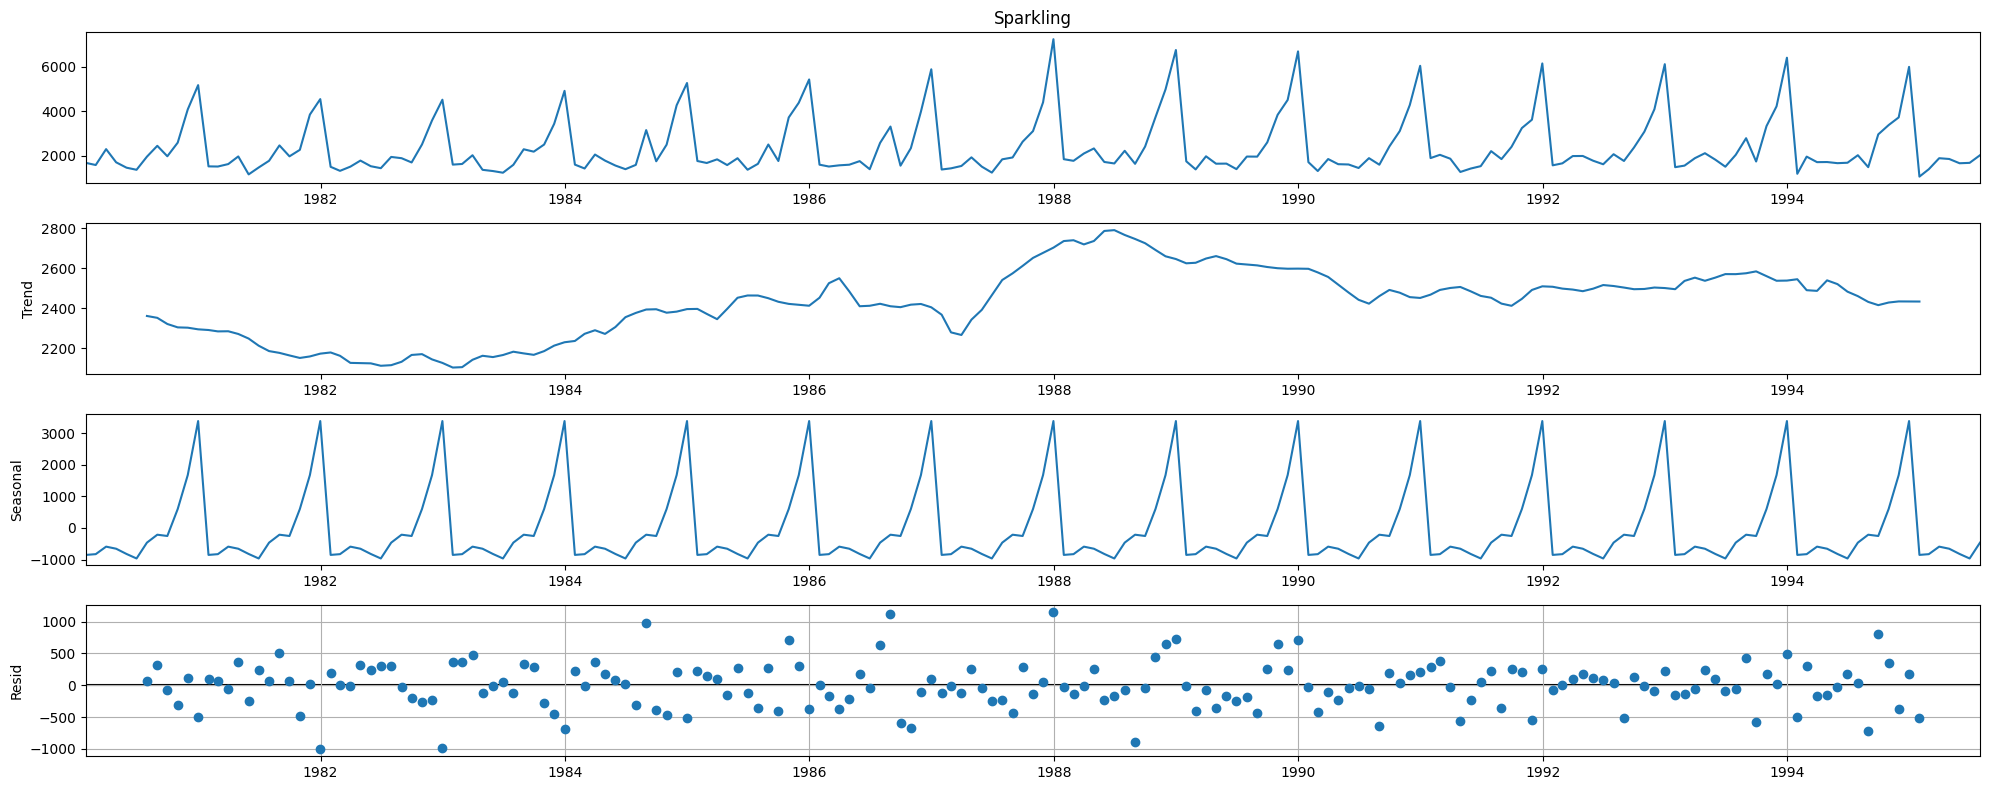

In [25]:
rcParams['figure.figsize'] = 20,8
decomposition = seasonal_decompose(df['Sparkling'],model='additive')
decomposition.plot()
plt.grid();


Skewness = 0.15


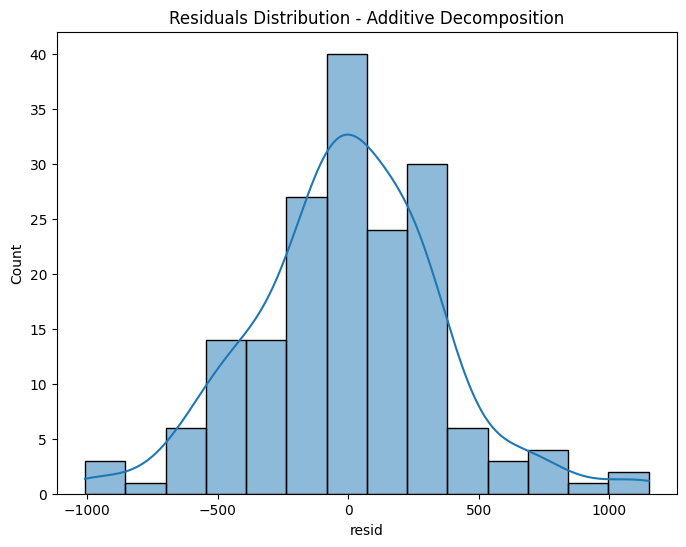

In [26]:
#Printing the values of decomposed time series
plt.figure(figsize = [8, 6])
plt.title('Residuals Distribution - Additive Decomposition')
sns.histplot(decomposition.resid, kde = True);
print('Skewness =', round(decomposition.resid.skew(), 2))

**Test for Normality**

We will use Shapiro Wilk Test for Normality.

Let's define the Null & alternate hypothesis:-


Ho: The residuals are normally distributed

Ha: The residuals are not normally distributed

In [27]:
import scipy.stats as stats


In [28]:
stats.shapiro(decomposition.resid.dropna())

ShapiroResult(statistic=0.9833053350448608, pvalue=0.0343334935605526)

p-value < 0.05

- We Reject the null hypothesis.

Hence Residuals are not normally distributed. The time series is not an additive time series.

##### Multiplicative Decomposition

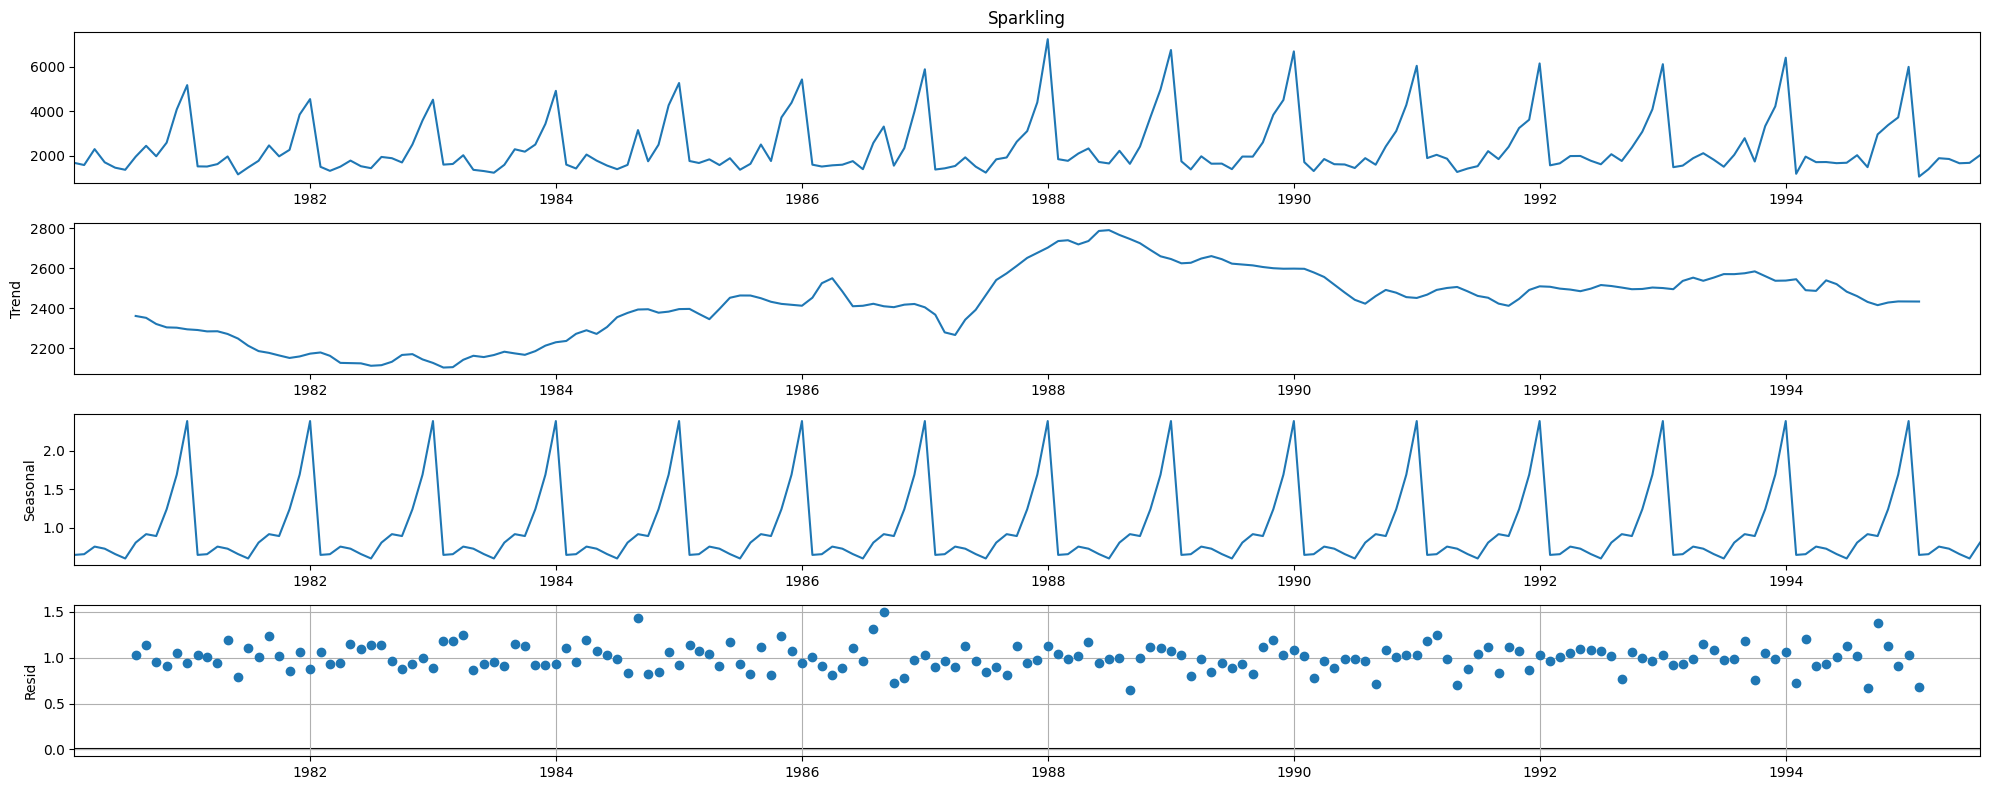

In [29]:
rcParams['figure.figsize'] = 20,8
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot()
plt.grid();


Skewness = 0.24


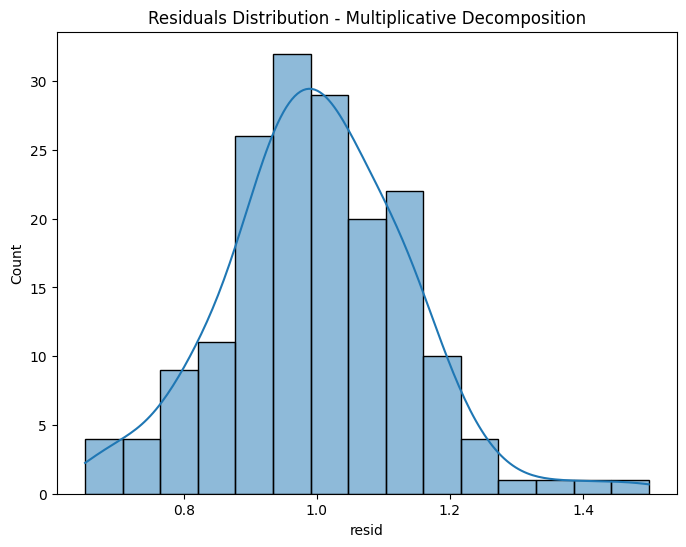

In [30]:
#Printing the values of decomposed time series
plt.figure(figsize = [8, 6])
plt.title('Residuals Distribution - Multiplicative Decomposition')
sns.histplot(decomposition.resid, kde = True);
print('Skewness =', round(decomposition.resid.skew(), 2))

**Test for Normality**

We will use Shapiro Wilk Test for Normality.

Let's define the Null & alternate hypothesis:-


Ho: The residuals are normally distributed

Ha: The residuals are not normally distributed

In [31]:
stats.shapiro(decomposition.resid.dropna())

ShapiroResult(statistic=0.9859988689422607, pvalue=0.07802142202854156)

p - value > 0.05
- At this p-value, We fail to reject the Null hypothesis
-  Residuals are normally distributed. The time series is a multiplicative time series.

In [32]:
#Printing the values of decomposed time series
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Year_Month
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Year_Month
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Year_Month
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

- **Insights**

  Based on the decomposed data provided for both additive and multiplicative decomposition, we can see that the **Time Series is Multiplicative**

 - The **Trend** appears to be **increasing** over time with some fluctuations, indicating a positive growth pattern.
 - The **seasonality** shows both positive and negative values, suggesting regular cycles or seasonal effects.
 - The **residual** component includes random fluctuations and unexplained variance in the time series.



## **3. Split the data into training and test. The test data should start in 1991.**

In [33]:
#Train - Test Split
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [34]:
## Display multiple data frames from one cell
from IPython.display import display

print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
Year_Month           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Last few rows of Training Data


Sparkling
Year_Month           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

First few rows of Test Data


Sparkling
Year_Month           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

Last few rows of Test Data


Sparkling
Year_Month           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [35]:
#Printing the dimentions of the data after split
print('Dimentions of Original Dataset:' ,df.shape)
print('Dimentions of Training data:', train.shape)
print('Dimentions of Training data:', test.shape)

Dimentions of Original Dataset: (187, 1)
Dimentions of Training data: (132, 1)
Dimentions of Training data: (55, 1)


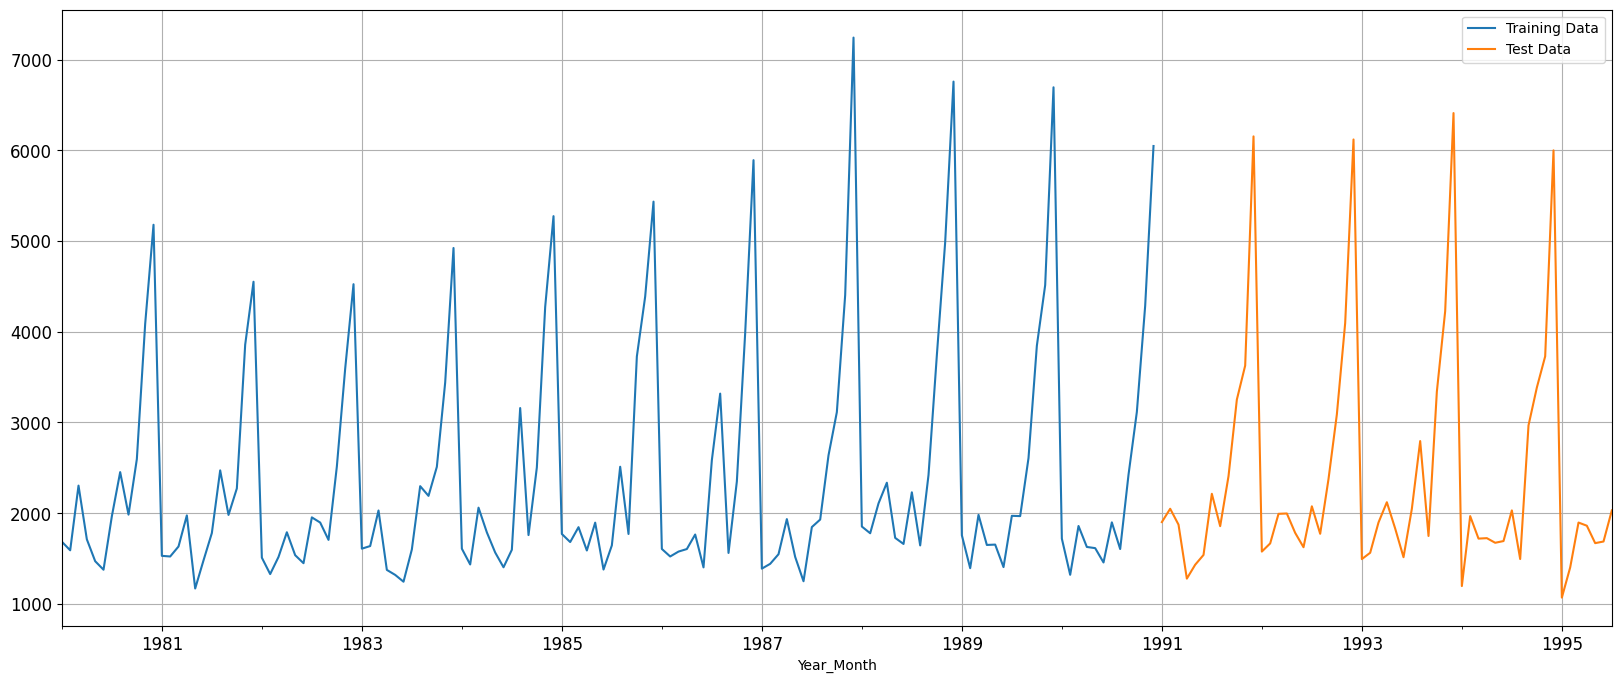

In [36]:
#Plotting the Train Test Split
train['Sparkling'].plot(fontsize=12)
test['Sparkling'].plot(fontsize=12)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()


## **4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models should also be built on the training data and check the performance on the test data using RMSE.**


### **Building different models and comparing the accuracy metrics.**

### Linear Regression

**For this particular linear regression, we are going to regress the 'Sparkling' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.**


In [37]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)


Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


- We have successfully generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.



In [38]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()


In [39]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())


First few rows of Training Data


Sparkling  time
Year_Month                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5

Last few rows of Training Data


Sparkling  time
Year_Month                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132

First few rows of Test Data


Sparkling  time
Year_Month                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137

Last few rows of Test Data


Sparkling  time
Year_Month                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187

- Our training and test data has been modified. let's use **LinearRegression** to build the model on the training data and test the model on the test data.



In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr = LinearRegression()


In [42]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])


LinearRegression()

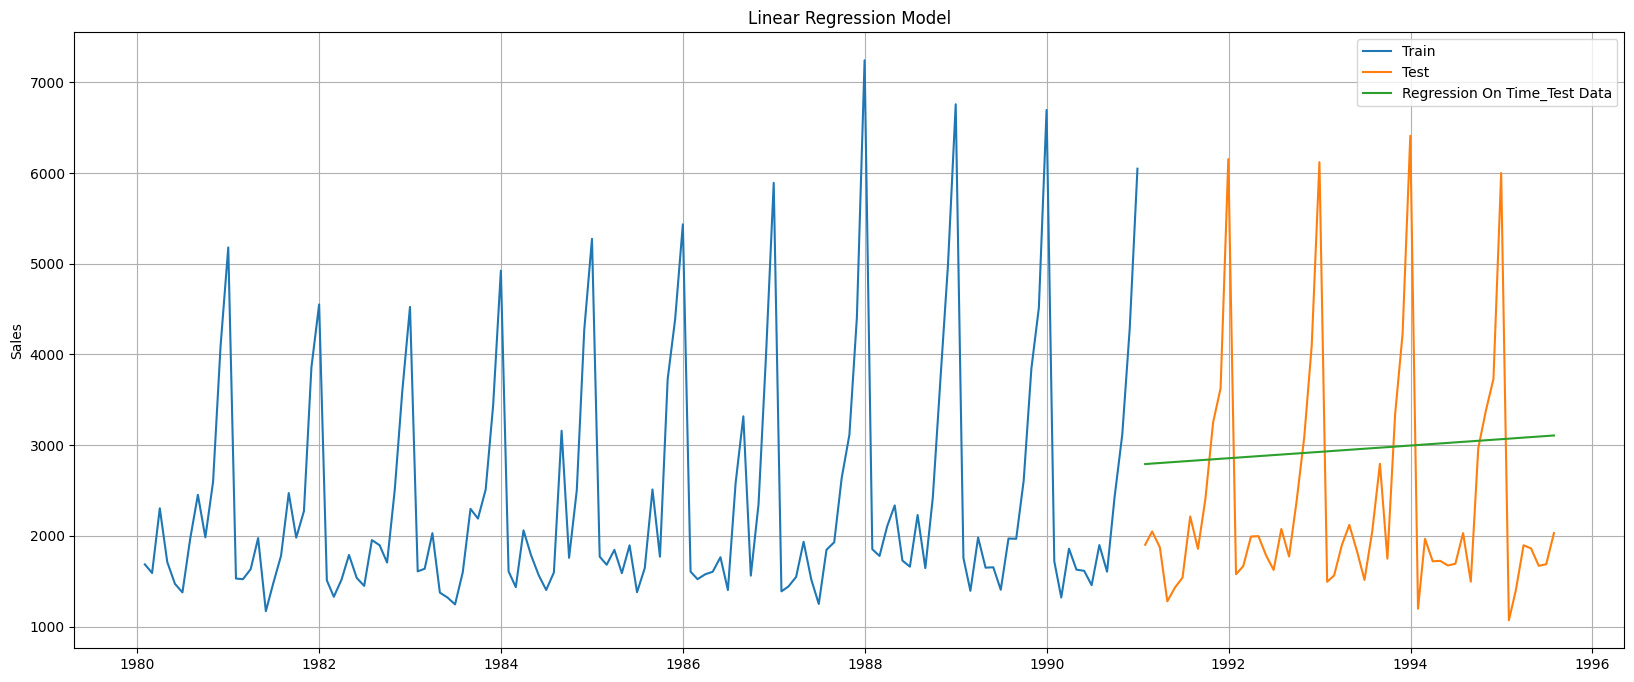

In [43]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.title('Linear Regression Model')
plt.ylabel('Sales')
plt.grid();


In [44]:
# Calculate the RMSE for the training data
rmse_model1_train = mean_squared_error(LinearRegression_train['Sparkling'], train_predictions_model1, squared=False)

train_rmse = pd.DataFrame({'Train_RMSE': [round(rmse_model1_train, 2)]}, index=['Linear Regression On Time'])
train_rmse



Train_RMSE
Linear Regression On Time     1279.32

In [45]:
from sklearn import metrics

#### Model Evaluation

In [46]:
#Calculating MAPE

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100
mape_LinearRegression = MAPE(test['Sparkling'], LinearRegression_test['RegOnTime'])
print('MAPE =', round(mape_LinearRegression, 2))

MAPE = 59.35


In [47]:
#Calculating RMSE
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))


For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 


In [48]:
#Creating a table to store RMSE & MAPE

resultsDf = pd.DataFrame({'Test_RMSE': round(rmse_model1_test, 2), 'MAPE': round(mape_LinearRegression, 2)}, index = ['Linear Regression On Time'])
resultsDf

Test_RMSE   MAPE
Linear Regression On Time    1389.14  59.35

**Insights:**
- Linear regression captures the trend but not the seasonality.
- RMSE is 1389.14, MAPE is 59.35 for Linear Regression, indicating difficulty in handling seasonality.





### Naive Approach:
**The Naive model predicts tomorrow's value based on today's observation, and the day after tomorrow's prediction is also the same as today's value.**

In [49]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [50]:
print("\n Last 5 values of Train data:\n", train.tail())
print("\n Last 5 values of Test data:\n",test.tail())


 Last 5 values of Train data:
             Sparkling
Year_Month           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

 Last 5 values of Test data:
             Sparkling
Year_Month           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031


In [51]:
NaiveModel_train['naive'] = train['Sparkling'].iloc[-1]
NaiveModel_train['naive'].head()

Year_Month
1980-01-31    6047
1980-02-29    6047
1980-03-31    6047
1980-04-30    6047
1980-05-31    6047
Name: naive, dtype: int64

In [52]:
NaiveModel_test['naive'] = train['Sparkling'].iloc[-1]
NaiveModel_test['naive'].head()

Year_Month
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

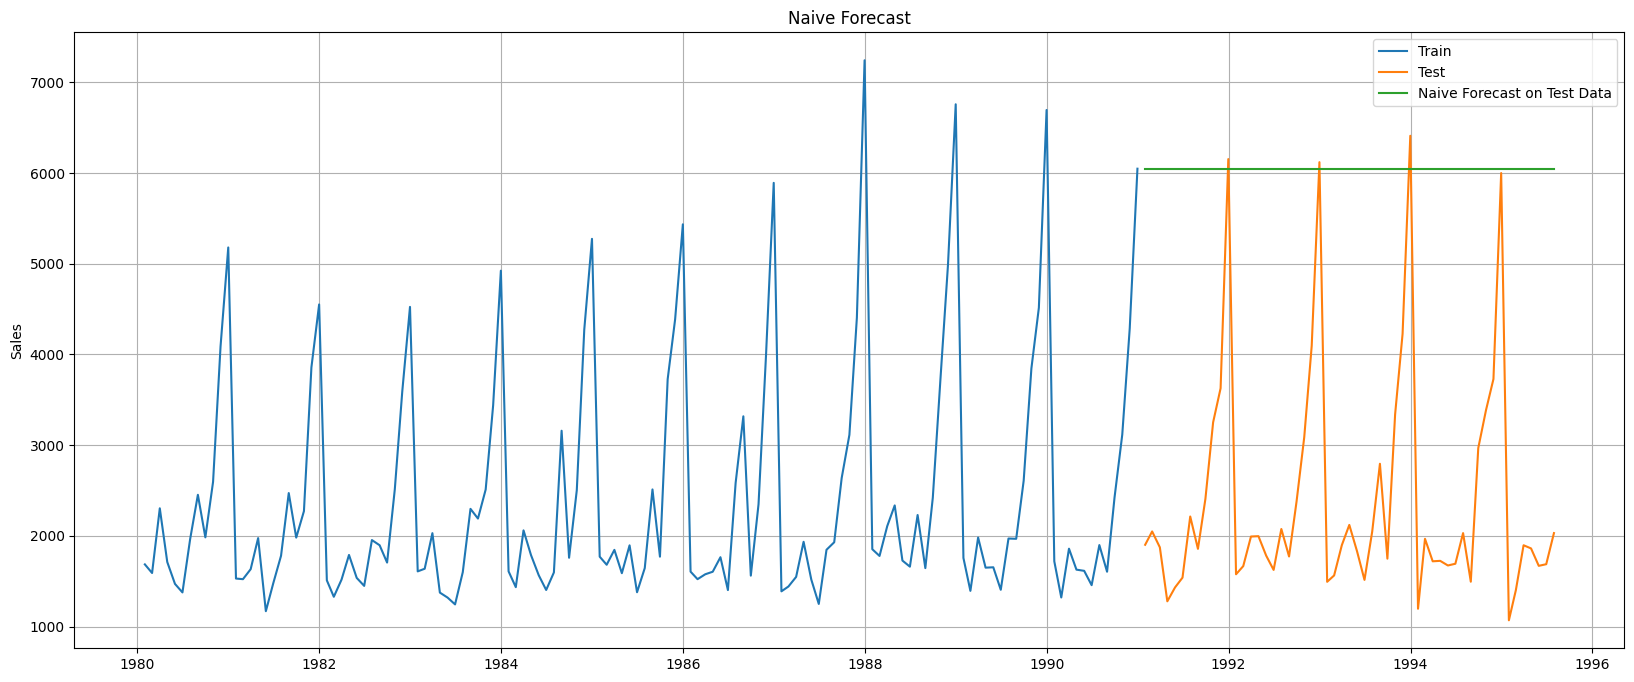

In [53]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title('Naive Forecast')
plt.ylabel('Sales')
plt.grid();


In [54]:
# Calculate the RMSE for the training data
rmse_naive_train = mean_squared_error(NaiveModel_train['Sparkling'], NaiveModel_train['naive'], squared=False)


In [55]:
train_rmse1 = pd.DataFrame({'Train_RMSE': [round(rmse_naive_train, 2)]}, index=['NaiveModel'])

train_rmse = pd.concat([train_rmse, train_rmse1])
train_rmse

Train_RMSE
Linear Regression On Time     1279.32
NaiveModel                    3867.70

#### Model Evaluation


In [56]:
#Calculating MAPE
mape_naive = MAPE(NaiveModel_test['Sparkling'], NaiveModel_test['naive'])
print('MAPE Naive =', round(mape_naive, 2))

MAPE Naive = 201.33


In [57]:
rmse_naive = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_naive))


For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [58]:
resultsDf_2 = pd.DataFrame({'Test_RMSE': round(rmse_naive, 2), 'MAPE': round(mape_naive, 2)}, index = ['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf


Test_RMSE    MAPE
Linear Regression On Time    1389.14   59.35
NaiveModel                   3864.28  201.33

**Insights:**
- Naive approach ignores trend and seasonality as it forecasts the last observed value
- RMSE is 3864.28, MAPE is 201.33 for Naive forecast, showing significant errors due to the lack of trend and seasonality capture.


### Simple Average
For this particular simple average method, we will forecast by using the average of the training values.

In [59]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()


In [60]:
SimpleAverage_train['simpleAvg'] = train['Sparkling'].mean()
SimpleAverage_train.head()

Sparkling    simpleAvg
Year_Month                        
1980-01-31       1686  2403.780303
1980-02-29       1591  2403.780303
1980-03-31       2304  2403.780303
1980-04-30       1712  2403.780303
1980-05-31       1471  2403.780303

In [61]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()


Sparkling  mean_forecast
Year_Month                          
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

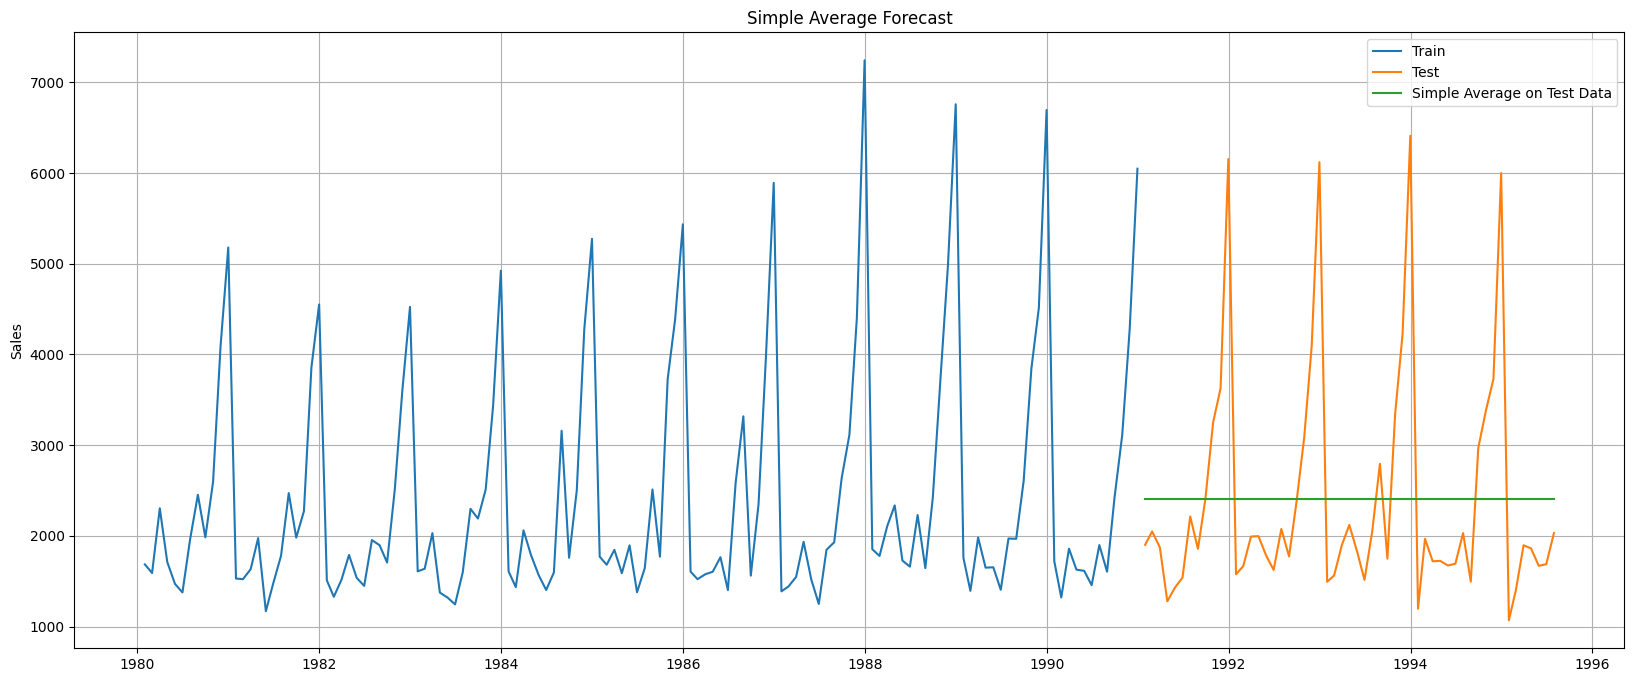

In [62]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.ylabel('Sales')
plt.grid();


In [63]:
# Calculate the RMSE for the training data
rmse_sa_train = mean_squared_error(SimpleAverage_train['Sparkling'], SimpleAverage_train['simpleAvg'], squared=False)
rmse_sa_train

1298.4836279430988

In [64]:
train_rmse2 = pd.DataFrame({'Train_RMSE': [round(rmse_sa_train, 2)]}, index=['Simple Average Model'])

train_rmse = pd.concat([train_rmse, train_rmse2])
train_rmse

Train_RMSE
Linear Regression On Time     1279.32
NaiveModel                    3867.70
Simple Average Model          1298.48

####Model Evaluation


In [65]:
#Calculating MAPE
mape_savg = MAPE(SimpleAverage_test['Sparkling'], SimpleAverage_test['mean_forecast'])
print('MAPE =', round(mape_savg, 2))

MAPE = 39.16


In [66]:
rmse_savg = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_savg))


For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [67]:
resultsDf_3 = pd.DataFrame({'Test_RMSE': round(rmse_savg, 2), 'MAPE': round(mape_savg, 2)}, index = ['Simple Average Model'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf


Test_RMSE    MAPE
Linear Regression On Time    1389.14   59.35
NaiveModel                   3864.28  201.33
Simple Average Model         1275.08   39.16

**Insights**
- Simple Average Model forecasts the mean of the training data. It ignores both the trend and seasonality.
- RMSE is 1275.08, MAPE is 39.16. Errors are significant due to the lack of trend and seasonality capture.
- Performs better than linear regression in this case as test data has a constant trend different from the training data's underlying trend.





### Moving Average(MA)
For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

#### For Moving Average, we are going to average over the entire data.

In [68]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling
Year_Month           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Trailing moving averages

In [69]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

round(MovingAverage.head(10),2)


Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Year_Month                                                           
1980-01-31       1686         NaN         NaN         NaN         NaN
1980-02-29       1591      1638.5         NaN         NaN         NaN
1980-03-31       2304      1947.5         NaN         NaN         NaN
1980-04-30       1712      2008.0     1823.25         NaN         NaN
1980-05-31       1471      1591.5     1769.50         NaN         NaN
1980-06-30       1377      1424.0     1716.00     1690.17         NaN
1980-07-31       1966      1671.5     1631.50     1736.83         NaN
1980-08-31       2453      2209.5     1816.75     1880.50         NaN
1980-09-30       1984      2218.5     1945.00     1827.17     1838.22
1980-10-31       2596      2290.0     2249.75     1974.50     1939.33

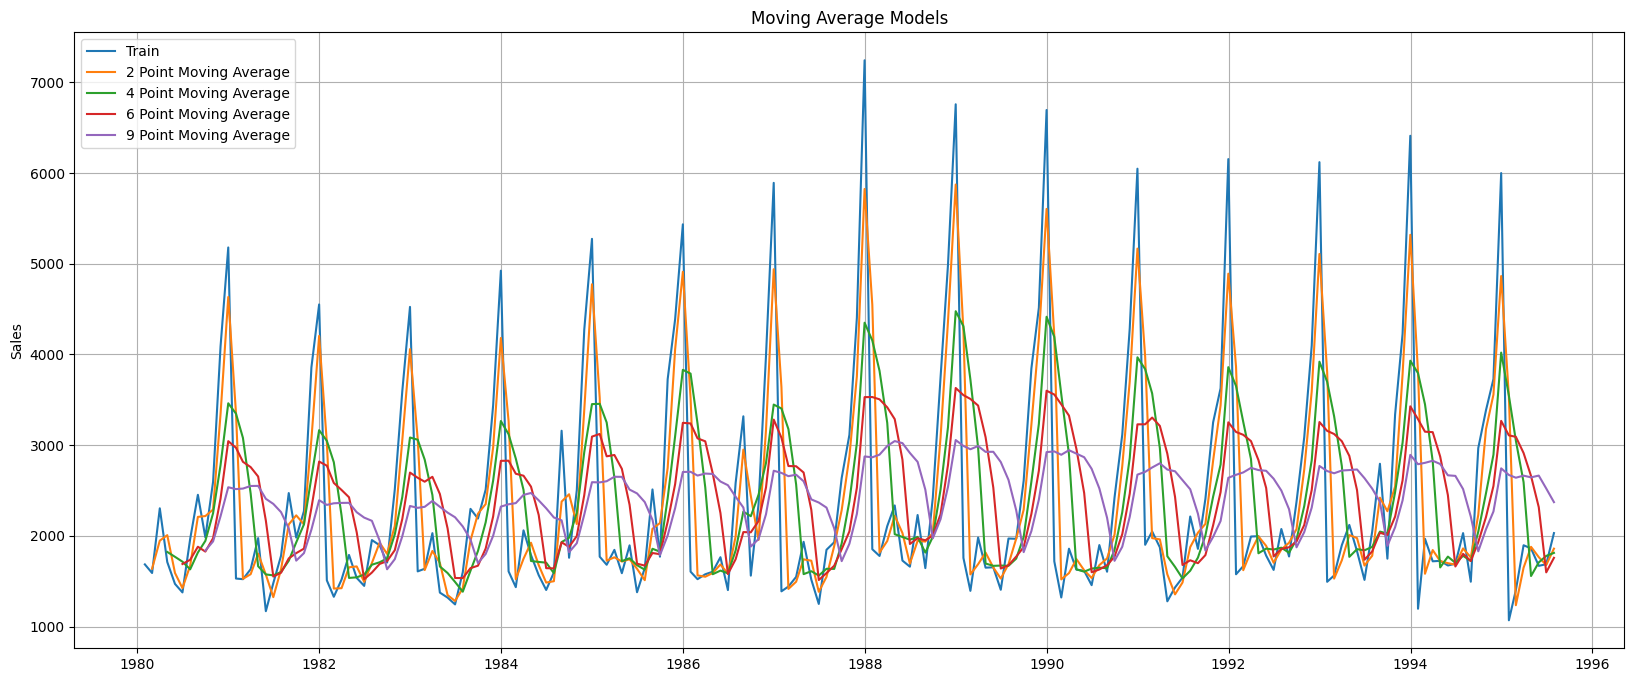

In [70]:
## Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.ylabel('Sales')
plt.title('Moving Average Models')
plt.grid();



Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.



In [71]:
#Creating train and test set
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]


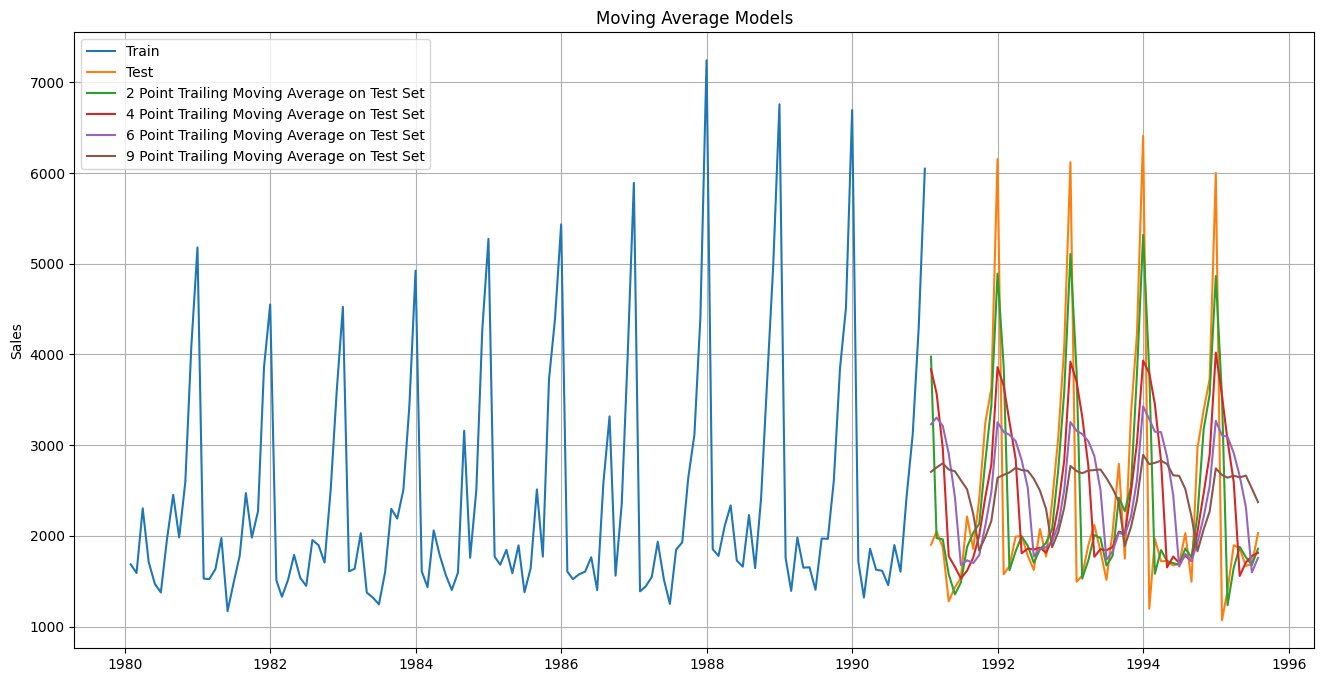

In [72]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.ylabel('Sales')
plt.title('Moving Average Models')
plt.grid();


In [73]:
# Calculate the RMSE for the training data

#We will first drop NA values in the trailing avg to calculate train RMSE
trailing_MovingAverage_train = trailing_MovingAverage_train.dropna()

# Calculate the RMSE for the training data for 2 point Trailing MA
rmse_mavg2_train = mean_squared_error(trailing_MovingAverage_train['Sparkling'], trailing_MovingAverage_train['Trailing_2'], squared=False)
print("For 2 point Moving Average \nRMSE =", round(rmse_mavg2_train, 2))

# Calculate the RMSE for the training data for 4 point Trailing MA
rmse_mavg4_train = mean_squared_error(trailing_MovingAverage_train['Sparkling'], trailing_MovingAverage_train['Trailing_4'], squared=False)
print("\nFor 4 point Moving Average \nRMSE =", round(rmse_mavg4_train, 2))

# Calculate the RMSE for the training data for 6 point Trailing MA
rmse_mavg6_train = mean_squared_error(trailing_MovingAverage_train['Sparkling'], trailing_MovingAverage_train['Trailing_6'], squared=False)
print("\nFor 6 point Moving Average \nRMSE =", round(rmse_mavg6_train, 2))

# Calculate the RMSE for the training data for 9 point Trailing MA
rmse_mavg9_train = mean_squared_error(trailing_MovingAverage_train['Sparkling'], trailing_MovingAverage_train['Trailing_9'], squared=False)
print("\nFor 9 point Moving Average \nRMSE =", round(rmse_mavg9_train, 2))


For 2 point Moving Average 
RMSE = 706.18

For 4 point Moving Average 
RMSE = 1125.87

For 6 point Moving Average 
RMSE = 1275.45

For 9 point Moving Average 
RMSE = 1372.84


- The 2-point Trailing Moving Average model is selected as it has the least errors (RMSE) among all the moving average train sets

In [74]:
train_rmse4 = pd.DataFrame({'Train_RMSE': [round(rmse_mavg2_train, 2)]}, index=['2 point Trailing Moving Average'])

train_rmse = pd.concat([train_rmse, train_rmse4])
train_rmse

Train_RMSE
Linear Regression On Time           1279.32
NaiveModel                          3867.70
Simple Average Model                1298.48
2 point Trailing Moving Average      706.18

#### Model Evaluation

In [75]:
## Test Data - RMSE & MAPE --> 2 point Trailing MA

rmse_mavg2 = mean_squared_error(trailing_MovingAverage_test['Sparkling'], trailing_MovingAverage_test['Trailing_2'], squared = False)
mape_mavg2 = MAPE(trailing_MovingAverage_test['Sparkling'], trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average \nRMSE =", round(rmse_mavg2, 2), "| MAPE =", round(mape_mavg2, 2))

## Test Data - RMSE & MAPE --> 4 point Trailing MA

rmse_mavg4 = mean_squared_error(trailing_MovingAverage_test['Sparkling'], trailing_MovingAverage_test['Trailing_4'], squared = False)
mape_mavg4 = MAPE(trailing_MovingAverage_test['Sparkling'], trailing_MovingAverage_test['Trailing_4'])
print("\nFor 4 point Moving Average \nRMSE =", round(rmse_mavg4, 2), "| MAPE =", round(mape_mavg4, 2))

## Test Data - RMSE & MAPE --> 6 point Trailing MA

rmse_mavg6 = mean_squared_error(trailing_MovingAverage_test['Sparkling'], trailing_MovingAverage_test['Trailing_6'], squared = False)
mape_mavg6 = MAPE(trailing_MovingAverage_test['Sparkling'], trailing_MovingAverage_test['Trailing_6'])
print("\nFor 6 point Moving Average \nRMSE =", round(rmse_mavg6, 2), "| MAPE =", round(mape_mavg6, 2))

## Test Data - RMSE & MAPE --> 9 point Trailing MA

rmse_mavg9 = mean_squared_error(trailing_MovingAverage_test['Sparkling'], trailing_MovingAverage_test['Trailing_9'], squared = False)
mape_mavg6 = MAPE(trailing_MovingAverage_test['Sparkling'], trailing_MovingAverage_test['Trailing_9'])
print("\nFor 9 point Moving Average \nRMSE =", round(rmse_mavg9, 2), "| MAPE =", round(mape_mavg6, 2))



For 2 point Moving Average 
RMSE = 813.4 | MAPE = 24.71

For 4 point Moving Average 
RMSE = 1156.59 | MAPE = 41.08

For 6 point Moving Average 
RMSE = 1283.93 | MAPE = 48.4

For 9 point Moving Average 
RMSE = 1346.28 | MAPE = 50.07


- The 2-point Trailing Moving Average model is selected as it has the least errors (RMSE & MAPE) among all the moving average models evaluated.

In [76]:


resultsDf_4 = pd.DataFrame({'Test_RMSE': round(rmse_mavg2, 2), 'MAPE': round(mape_mavg2, 2)}, index = ['2 point Trailing Moving Average'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf


Test_RMSE    MAPE
Linear Regression On Time          1389.14   59.35
NaiveModel                         3864.28  201.33
Simple Average Model               1275.08   39.16
2 point Trailing Moving Average     813.40   24.71

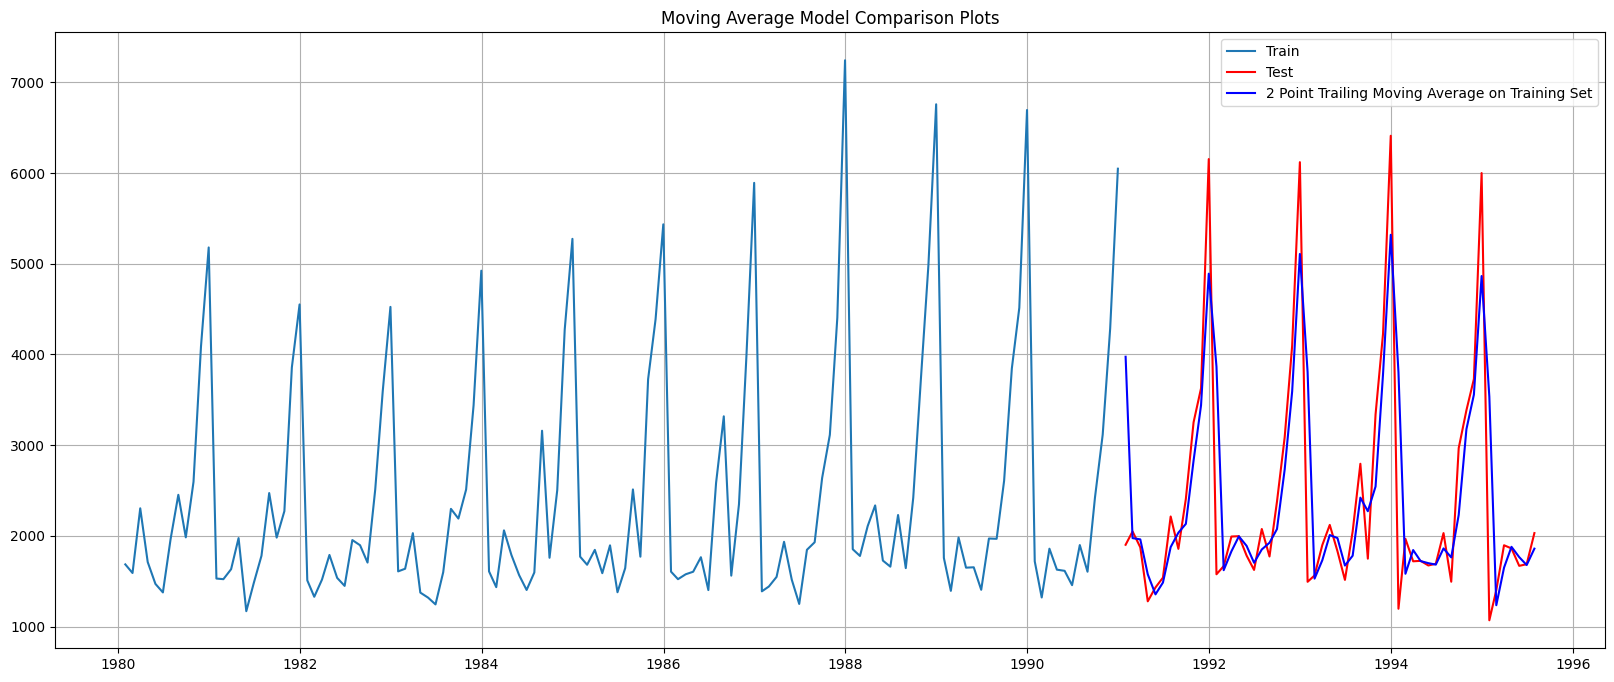

In [77]:
## Plotting on both Training and Test data for 2 points trailing moving average

plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test', color= 'r')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set', color='b')
plt.legend(loc='best')
plt.title("Moving Average Model Comparison Plots")
plt.grid();


**Insights**


- For the moving average models, here are the insights based on their RMSE and MAPE values:

 - 2-Point Moving Average: RMSE = 813.4, MAPE = 24.71. It performs relatively well in capturing the trend and seasonality but still has room for improvement.

 - 4-Point Moving Average: RMSE = 1156.59, MAPE = 41.08. It performs slightly worse than the 2-Point model, but it still shows better accuracy than simpler models like the Simple Average.

 - 6-Point Moving Average: RMSE = 1283.93, MAPE = 48.4. It performs reasonably well but is not as accurate as the 2-Point or 4-Point models.

 - 9-Point Moving Average: RMSE = 1346.28, MAPE = 50.07. It shows reasonable performance but is not as good as the 2-Point model.


- Overall, the **2-Point Moving Average model** stands out as the best-performing model with the lowest RMSE and MAPE values. However, there is still room for improvement in all the models to better capture the trend and seasonality and reduce errors in the forecasts.


###Let's build the **Exponential Smoothening Models** & Evaluate them

### **Exponential Smoothing methods**

###Simple Exponential Smoothing : ETS(A, N, N)

- This method is suitable for forecasting data with no clear trend or seasonal pattern.

- Parameter α is called the smoothing constant and its value lies between 0 and 1. Since the model uses only one smoothing constant, it is called Single Exponential Smoothing.

##### SES: Auto Fill Method

In [78]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

In [79]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)


In [80]:
SES_train_predict = model_SES_autofit.fittedvalues


In [81]:
## Let us check the parameters

model_SES_autofit.params


{'smoothing_level': 0.07028781460389563,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1763.9269926897732,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [82]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict


1991-01-31    2804.662714
1991-02-28    2804.662714
1991-03-31    2804.662714
1991-04-30    2804.662714
1991-05-31    2804.662714
1991-06-30    2804.662714
1991-07-31    2804.662714
1991-08-31    2804.662714
1991-09-30    2804.662714
1991-10-31    2804.662714
1991-11-30    2804.662714
1991-12-31    2804.662714
1992-01-31    2804.662714
1992-02-29    2804.662714
1992-03-31    2804.662714
1992-04-30    2804.662714
1992-05-31    2804.662714
1992-06-30    2804.662714
1992-07-31    2804.662714
1992-08-31    2804.662714
1992-09-30    2804.662714
1992-10-31    2804.662714
1992-11-30    2804.662714
1992-12-31    2804.662714
1993-01-31    2804.662714
1993-02-28    2804.662714
1993-03-31    2804.662714
1993-04-30    2804.662714
1993-05-31    2804.662714
1993-06-30    2804.662714
1993-07-31    2804.662714
1993-08-31    2804.662714
1993-09-30    2804.662714
1993-10-31    2804.662714
1993-11-30    2804.662714
1993-12-31    2804.662714
1994-01-31    2804.662714
1994-02-28    2804.662714
1994-03-31  

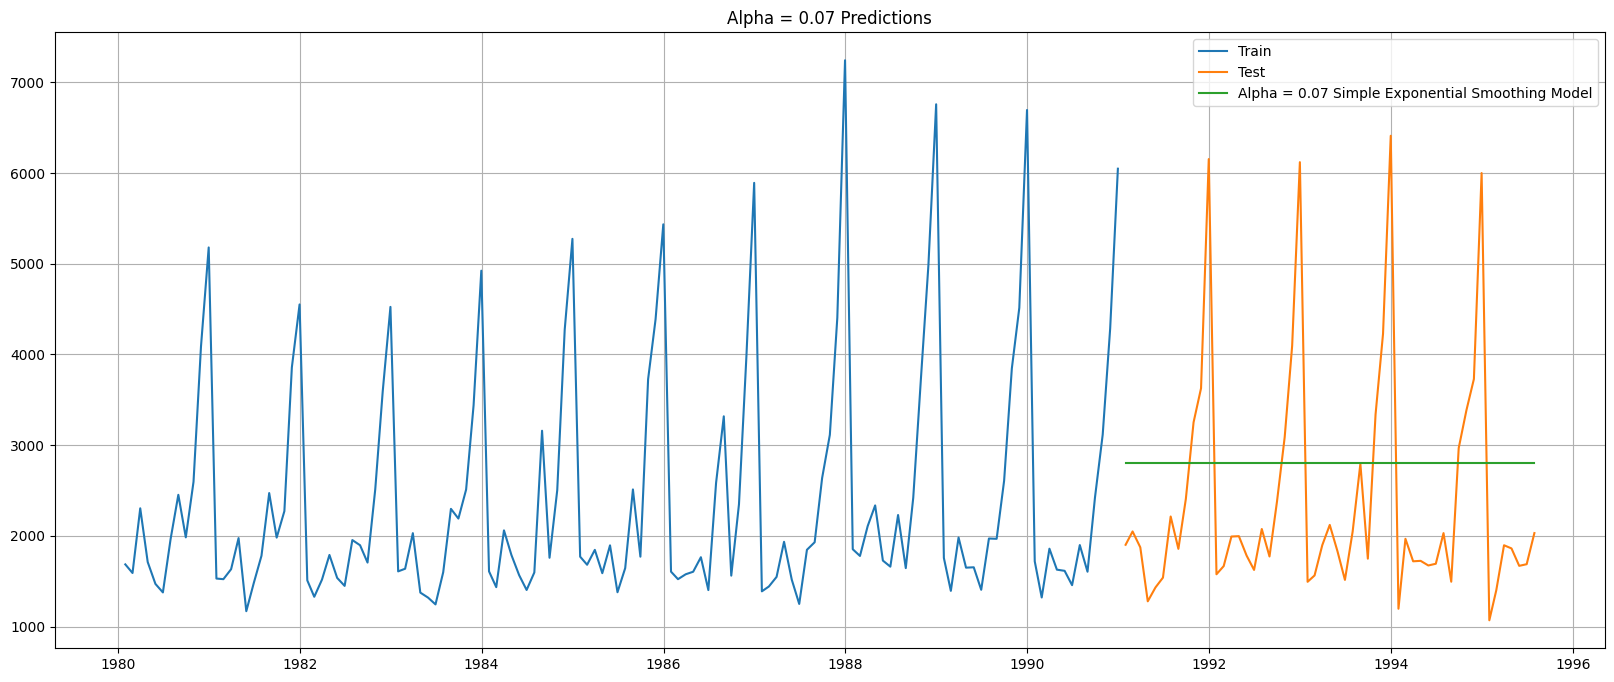

In [83]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha = 0.07 Simple Exponential Smoothing Model')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.07 Predictions');


In [84]:
# Calculate the RMSE for the training data

rmse_sesa_train = mean_squared_error(train, SES_train_predict, squared=False)
rmse_sesa_train

1322.897875391824

In [85]:

train_rmse5 = pd.DataFrame({'Train_RMSE': [round(rmse_sesa_train, 2)]}, index=['Alpha = 0.07 Simple Exponential Smoothing'])

train_rmse = pd.concat([train_rmse, train_rmse5])
train_rmse

Train_RMSE
Linear Regression On Time                     1279.32
NaiveModel                                    3867.70
Simple Average Model                          1298.48
2 point Trailing Moving Average                706.18
Alpha = 0.07 Simple Exponential Smoothing     1322.90

#### Model Evaluation

In [86]:
## MAPE
mape_ses_auto = MAPE(test.values, SES_predict.values)
print('Exponential Smoothing MAPE =', round(mape_ses_auto, 2))

Exponential Smoothing MAPE = 53.88


In [87]:
#RMSE
rmse_ses_auto = mean_squared_error(test.values, SES_predict.values, squared = False)
print('Simple Exponential Smoothing RMSE =', round(rmse_ses_auto, 2))

Simple Exponential Smoothing RMSE = 1338.0


In [88]:
resultsDf_4 = pd.DataFrame({'Test_RMSE': round(rmse_ses_auto, 2), 'MAPE': round(mape_ses_auto, 2)}, index = ['Alpha = 0.07 Simple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf


Test_RMSE    MAPE
Linear Regression On Time                    1389.14   59.35
NaiveModel                                   3864.28  201.33
Simple Average Model                         1275.08   39.16
2 point Trailing Moving Average               813.40   24.71
Alpha = 0.07 Simple Exponential Smoothing    1338.00   53.88

**Insights:**
- Simple exponential smoothing model provides one-step-ahead forecast. It ignores both the trend and seasonality in the data.
- RMSE is 1338 and MAPE is 53.88, indicating poor performance in capturing underlying patterns.
- The low smoothing parameter (0.07) implies a heavy reliance on past averages.
This makes it less accurate compared to more sophisticated methods.



##### SES Brute Force Method



In [89]:
custom_SES = pd.DataFrame(columns = ['Alpha', 'Train RMSE', 'Test RMSE'])
SES_train = train.copy()
SES_test = test.copy()

In [90]:
for i in np.arange(0.01, 1, 0.01):
    SES_alpha_i = SimpleExpSmoothing(train, initialization_method = 'estimated').fit(smoothing_level = i, optimized = False, use_brute = True)
    SES_train['predict', i] = SES_alpha_i.fittedvalues
    SES_test['predict', i] = SES_alpha_i.forecast(len(test))

    rmse_SES_train = mean_squared_error(train, SES_train['predict', i], squared = False)
    rmse_SES_test = mean_squared_error(test, SES_test['predict', i], squared = False)

    custom_SES = custom_SES.append({'Alpha': i,'Train RMSE': rmse_SES_train, 'Test RMSE': rmse_SES_test}, ignore_index = True)

custom_SES.sort_values(by = 'Test RMSE').head()

Alpha   Train RMSE    Test RMSE
1   0.02  1346.258628  1278.497798
0   0.01  1397.988872  1286.648058
2   0.03  1329.877089  1292.565292
3   0.04  1324.937340  1305.283075
4   0.05  1324.401979  1316.359347

In [91]:
best_alpha = custom_SES.sort_values(by='Test RMSE').head(1)['Alpha'].values[0]
print("Best Alpha for Simple Exponential Smoothing:", best_alpha)


Best Alpha for Simple Exponential Smoothing: 0.02


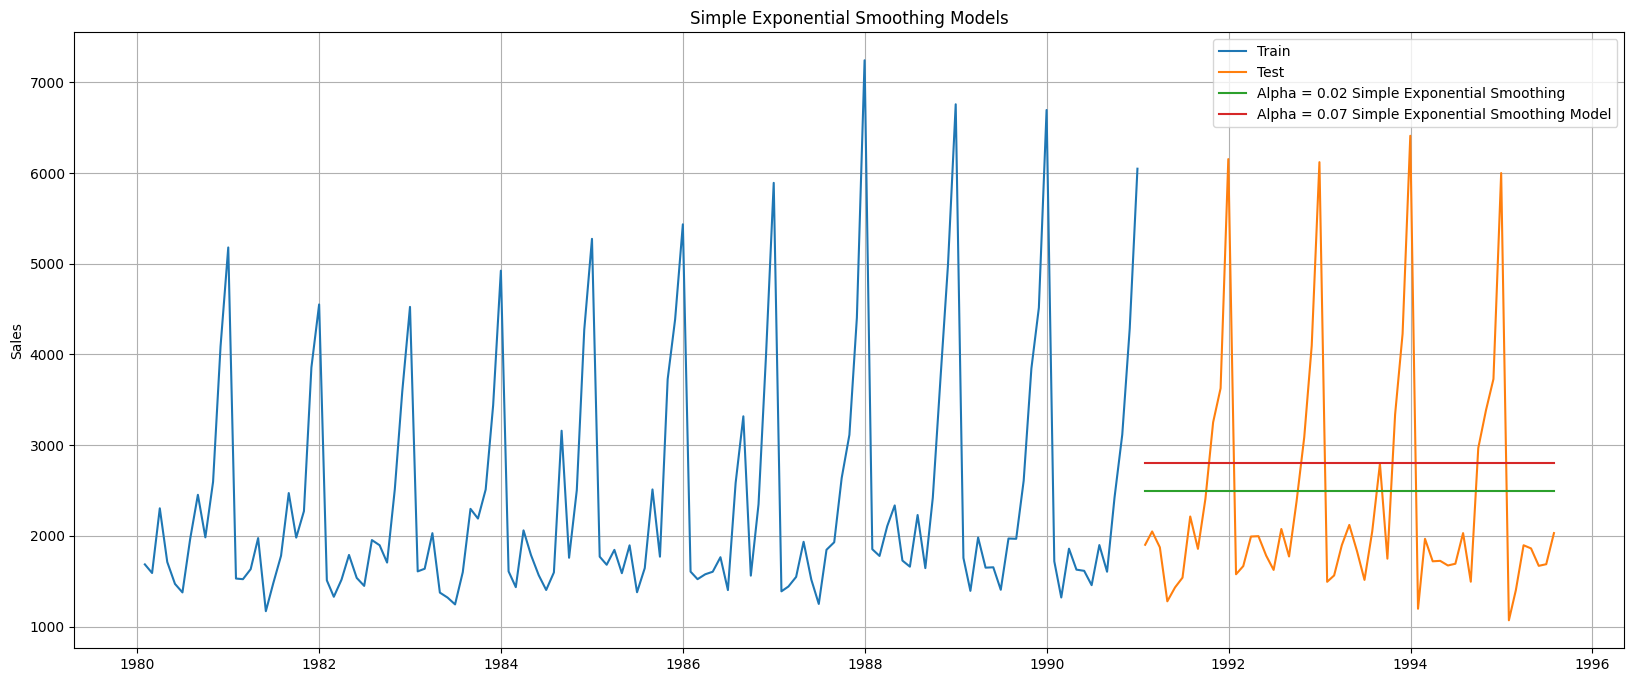

In [92]:
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(SES_test['predict', 0.02], label = 'Alpha = 0.02 Simple Exponential Smoothing')
plt.plot(SES_predict, label='Alpha = 0.07 Simple Exponential Smoothing Model')

plt.legend(loc = 'best')
plt.grid()
plt.ylabel('Sales')
plt.title('Simple Exponential Smoothing Models');

In [93]:
# Calculate the RMSE for the training data
# Since best RMSE table printed above on train data: Let's print against alpha= 0.02

rmse_sesbf_train = custom_SES.sort_values(by='Test RMSE').head(1)['Train RMSE'].values.item()
rmse_sesbf_train

1346.2586280491205

In [94]:

train_rmse5 = pd.DataFrame({'Train_RMSE': [round(rmse_sesbf_train, 2)]}, index=['Alpha = 0.02 Simple Exponential Smoothing'])

train_rmse = pd.concat([train_rmse, train_rmse5])
train_rmse

Train_RMSE
Linear Regression On Time                     1279.32
NaiveModel                                    3867.70
Simple Average Model                          1298.48
2 point Trailing Moving Average                706.18
Alpha = 0.07 Simple Exponential Smoothing     1322.90
Alpha = 0.02 Simple Exponential Smoothing     1346.26

#### Model Evaluation

In [95]:
#MAPE
mape_ses_tuned = MAPE(test.values, SES_test['predict', 0.02].values)
print('MAPE =', round(mape_ses_tuned, 2))

MAPE = 42.41


In [96]:
#RMSE
rmse_ses_tuned = custom_SES.sort_values(by = 'Test RMSE').values[0][2]
print('RMSE =', round(rmse_ses_tuned, 2))

RMSE = 1278.5


In [97]:
resultsDf5 = pd.DataFrame({'Test_RMSE': round(rmse_ses_tuned, 2), 'MAPE': round(mape_ses_tuned, 2)}, index = ['Alpha = 0.02 Simple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf5])
resultsDf

Test_RMSE    MAPE
Linear Regression On Time                    1389.14   59.35
NaiveModel                                   3864.28  201.33
Simple Average Model                         1275.08   39.16
2 point Trailing Moving Average               813.40   24.71
Alpha = 0.07 Simple Exponential Smoothing    1338.00   53.88
Alpha = 0.02 Simple Exponential Smoothing    1278.50   42.41

**Insights**
- The simple exponential smoothing model generates one-step-ahead forecasts, overlooking both trend and seasonality in the time series.
- The model exhibits a Root Mean Square Error of 1278.5 and a Mean Absolute Percentage Error of 42.41, signifying its inability to effectively capture the underlying trend and seasonal patterns.
- The small smoothing parameter (0.02) indicates that the model relies heavily on past data averages rather than recent observations, making its accuracy comparable to the simple average model.



### Double Exponential Smoothing

- Applicable when data has Trend but no seasonality.


##### DES: Autofit Model

In [98]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('Holt model Exponential Smoothing Estimated Parameters ')
print('\n')
print(model_DES.params)



Holt model Exponential Smoothing Estimated Parameters 


{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999998, 'initial_trend': 74.87272727272733, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [99]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict


1991-01-31    5401.733026
1991-02-28    5476.005230
1991-03-31    5550.277433
1991-04-30    5624.549637
1991-05-31    5698.821840
1991-06-30    5773.094044
1991-07-31    5847.366248
1991-08-31    5921.638451
1991-09-30    5995.910655
1991-10-31    6070.182858
1991-11-30    6144.455062
1991-12-31    6218.727266
1992-01-31    6292.999469
1992-02-29    6367.271673
1992-03-31    6441.543876
1992-04-30    6515.816080
1992-05-31    6590.088284
1992-06-30    6664.360487
1992-07-31    6738.632691
1992-08-31    6812.904894
1992-09-30    6887.177098
1992-10-31    6961.449302
1992-11-30    7035.721505
1992-12-31    7109.993709
1993-01-31    7184.265912
1993-02-28    7258.538116
1993-03-31    7332.810320
1993-04-30    7407.082523
1993-05-31    7481.354727
1993-06-30    7555.626930
1993-07-31    7629.899134
1993-08-31    7704.171338
1993-09-30    7778.443541
1993-10-31    7852.715745
1993-11-30    7926.987948
1993-12-31    8001.260152
1994-01-31    8075.532356
1994-02-28    8149.804559
1994-03-31  

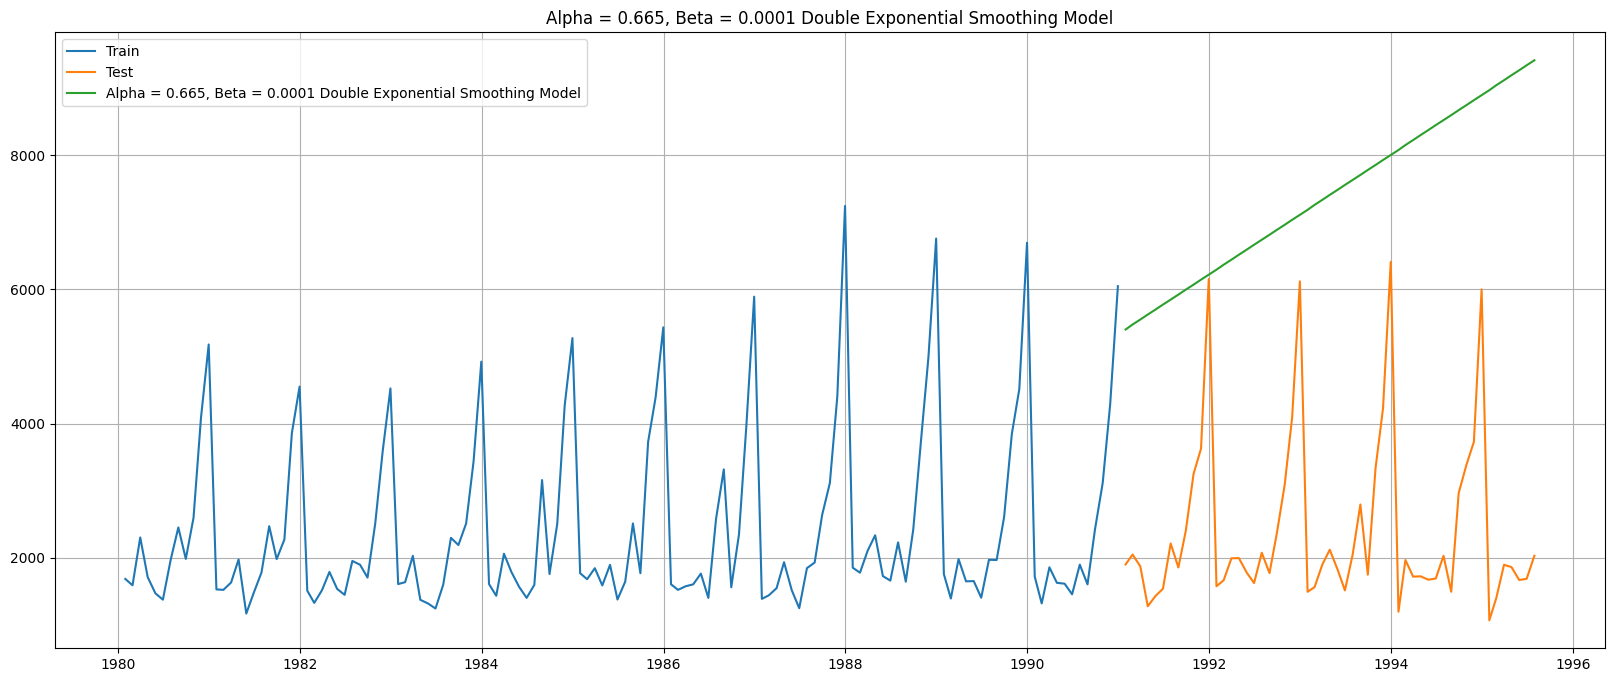

In [100]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(DES_predict, label = 'Alpha = 0.665, Beta = 0.0001 Double Exponential Smoothing Model')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.665, Beta = 0.0001 Double Exponential Smoothing Model');


In [101]:
# Calculate the RMSE for the training data

rmse_desa_train = mean_squared_error(train, model_DES.fittedvalues, squared=False)
rmse_desa_train

1339.5008820229418

In [102]:

train_rmse6 = pd.DataFrame({'Train_RMSE': [round(rmse_desa_train, 2)]}, index=['Alpha=0.665, Beta = 0.0001 Double Exponential Smoothing'])

train_rmse = pd.concat([train_rmse, train_rmse6])
train_rmse

Train_RMSE
Linear Regression On Time                              1279.32
NaiveModel                                             3867.70
Simple Average Model                                   1298.48
2 point Trailing Moving Average                         706.18
Alpha = 0.07 Simple Exponential Smoothing              1322.90
Alpha = 0.02 Simple Exponential Smoothing              1346.26
Alpha=0.665, Beta = 0.0001 Double Exponential S...     1339.50

#### Model Evaluation

In [103]:
mape_des_auto = MAPE(test.values, DES_predict.values)
print('DES MAPE =', round(mape_des_auto, 2))

DES MAPE = 268.91


In [104]:
print('DES RMSE:',round(mean_squared_error(test.values,DES_predict.values,squared=False),2))


DES RMSE: 5291.88


In [105]:
resultsDf_6 = pd.DataFrame({'Test_RMSE': [round(mean_squared_error(test.values, DES_predict.values, squared=False), 2)],
                            'MAPE': round(mape_des_auto, 2)},
                            index=['Alpha=0.665, Beta = 0.0001 Double Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf


Test_RMSE    MAPE
Linear Regression On Time                             1389.14   59.35
NaiveModel                                            3864.28  201.33
Simple Average Model                                  1275.08   39.16
2 point Trailing Moving Average                        813.40   24.71
Alpha = 0.07 Simple Exponential Smoothing             1338.00   53.88
Alpha = 0.02 Simple Exponential Smoothing             1278.50   42.41
Alpha=0.665, Beta = 0.0001 Double Exponential S...    5291.88  268.91

**Insights**
- The double exponential smoothing model forecasts the trend but disregards the seasonality of the time series.
- The Root Mean Square Error is 5291.88, and the Mean Absolute Percentage Error is 268.91 for the Double exponential smoothing model. The error is very high, indicating its failure to capture the seasonality in the data. Moreover, the level smoothing parameter being close to 1 suggests it is highly influenced by recent observations, leading to higher forecasts due to sales spikes at the year-end.
- Similarly, with beta close to 0, the model captures the historical trend of the particular level and extrapolates it.


#### DES: Brute Force Method


In [106]:
DES_train = train.copy()
DES_test = test.copy()
custom_DES = pd.DataFrame(columns = ['Alpha', 'Beta', 'Train RMSE', 'Test RMSE'])

In [107]:
for i in np.arange(0.01, 1, 0.01):
  for j in np.arange(0.01, 1, 0.01):
    DES_alpha_ij = Holt(train, initialization_method = 'estimated').fit(smoothing_level = i, smoothing_trend = j, optimized = False, use_brute = True)
    DES_train['predict', i, j] = DES_alpha_ij.fittedvalues
    DES_test['predict', i, j] = DES_alpha_ij.forecast(len(test))

    rmse_DES_train = mean_squared_error(train, DES_train['predict', i, j], squared = False)
    rmse_DES_test = mean_squared_error(test, DES_test['predict', i, j], squared = False)

    custom_DES = custom_DES.append({'Alpha': i, 'Beta': j, 'Train RMSE': rmse_DES_train, 'Test RMSE': rmse_DES_test}, ignore_index = True)

custom_DES.sort_values(by = 'Test RMSE').head()

Alpha  Beta   Train RMSE    Test RMSE
136   0.02  0.38  1398.025311  1275.874751
135   0.02  0.37  1398.309816  1276.128575
106   0.02  0.08  1509.840203  1276.557274
258   0.03  0.61  1415.807906  1278.165214
201   0.03  0.04  1492.652360  1279.190198

- Since alpha = 0.02 and beta = 0.38 yield the least test RMSE, indicating the best fit for our test data, we select them to build our double exponential smoothing model.

''

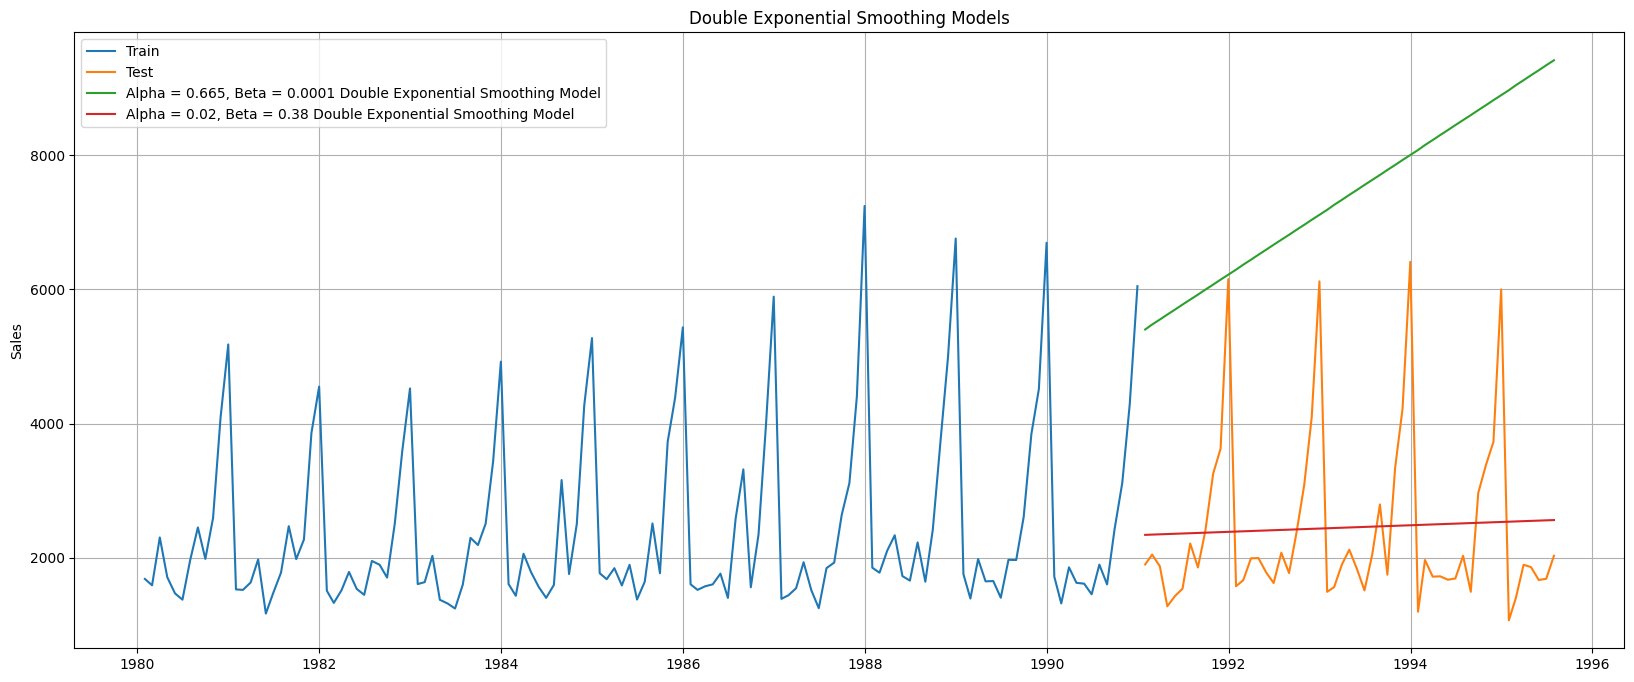

In [108]:
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(DES_predict, label = 'Alpha = 0.665, Beta = 0.0001 Double Exponential Smoothing Model')
plt.plot(DES_test['predict', 0.02, 0.38], label = 'Alpha = 0.02, Beta = 0.38 Double Exponential Smoothing Model')
plt.legend(loc = 'best')
plt.ylabel('Sales')
plt.title('Double Exponential Smoothing Models')
plt.grid()
;

In [109]:
# Calculate the RMSE for the training data
# Since best RMSE table printed above on train data: Let's print against Alpha=0.665, Beta = 0.0001

rmse_desbf_train = custom_DES.sort_values(by = 'Test RMSE').head(1)['Train RMSE'].values.item()
rmse_desbf_train


1398.025310709048

In [110]:

train_rmse7 = pd.DataFrame({'Train_RMSE': [round(rmse_desbf_train, 2)]}, index=['Alpha = 0.02, Beta = 0.38 Double Exponential Smoothing'])

train_rmse = pd.concat([train_rmse, train_rmse7])
train_rmse

Train_RMSE
Linear Regression On Time                              1279.32
NaiveModel                                             3867.70
Simple Average Model                                   1298.48
2 point Trailing Moving Average                         706.18
Alpha = 0.07 Simple Exponential Smoothing              1322.90
Alpha = 0.02 Simple Exponential Smoothing              1346.26
Alpha=0.665, Beta = 0.0001 Double Exponential S...     1339.50
Alpha = 0.02, Beta = 0.38 Double Exponential Sm...     1398.03

#####Model Evaluation

In [111]:
#MAPE
mape_des_tuned = MAPE(test.values, DES_test['predict', 0.02, 0.38].values)
print('DES MAPE =', round(mape_des_tuned, 2))

DES MAPE = 40.97


In [112]:
#RMSE
rmse_des_tuned = custom_DES.sort_values(by = 'Test RMSE').values[0][3]
print('DES RMSE =', round(rmse_des_tuned, 2))

DES RMSE = 1275.87


In [113]:
resultsDf7 = pd.DataFrame({'Test_RMSE': round(rmse_des_tuned, 2), 'MAPE': round(mape_des_tuned, 2)}, index = ['Alpha = 0.02, Beta = 0.38 Double Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf7])
resultsDf

Test_RMSE    MAPE
Linear Regression On Time                             1389.14   59.35
NaiveModel                                            3864.28  201.33
Simple Average Model                                  1275.08   39.16
2 point Trailing Moving Average                        813.40   24.71
Alpha = 0.07 Simple Exponential Smoothing             1338.00   53.88
Alpha = 0.02 Simple Exponential Smoothing             1278.50   42.41
Alpha=0.665, Beta = 0.0001 Double Exponential S...    5291.88  268.91
Alpha = 0.02, Beta = 0.38 Double Exponential Sm...    1275.87   40.97

**Insights:**
- The above double exponential smoothing model effectively captures the trend but overlooks the seasonality of the time series. This performs better than auto fill method(Double Exponential Smoothing alpha = 0.665, Beta = 0.0001)
- The model exhibits a high Root Mean Square Error of 1275.87 and a Mean Absolute Percentage Error of 40.97, indicating its failure to capture the seasonality in the data.
- The level smoothing parameter (alpha) is close to 0 (0.02), suggesting that the level forecast is primarily based on the past data rather than recent observations.
- The trend smoothing parameter (beta) is 0.38, which lies between 0 and 1, indicating a balanced approach that considers both historical data and recent observations to forecast the trend.






###Triple Exponential Smoothing:

#### TES: Autofit Model

In [114]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',
                                    seasonal='multiplicative',
                                    initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('Holt Winters model Exponential Smoothing Estimated Parameters')
print('')
print(model_TES_am.params)



Holt Winters model Exponential Smoothing Estimated Parameters

{'smoothing_level': 0.11119949831569428, 'smoothing_trend': 0.049430920023313805, 'smoothing_seasonal': 0.3620525701498937, 'damping_trend': nan, 'initial_level': 2356.5264391986907, 'initial_trend': -9.443690175376352, 'initial_seasons': array([0.71325627, 0.68332509, 0.90537798, 0.80561841, 0.65639659,
       0.65451508, 0.88690241, 1.13423953, 0.91927727, 1.21396745,
       1.86941738, 2.3734461 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [115]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am


1991-01-31    1587.685845
1991-02-28    1356.590237
1991-03-31    1763.121866
1991-04-30    1656.379813
1991-05-31    1542.186697
1991-06-30    1355.276292
1991-07-31    1854.460265
1991-08-31    1820.822870
1991-09-30    2277.203230
1991-10-31    3122.460625
1991-11-30    4129.148636
1991-12-31    5891.184787
1992-01-31    1538.578232
1992-02-29    1314.522051
1992-03-31    1708.305381
1992-04-30    1604.748228
1992-05-31    1493.989468
1992-06-30    1312.809887
1992-07-31    1796.200235
1992-08-31    1763.469447
1992-09-30    2205.285676
1992-10-31    3023.588340
1992-11-30    3998.053790
1992-12-31    5703.651532
1993-01-31    1489.470618
1993-02-28    1272.453864
1993-03-31    1653.488895
1993-04-30    1553.116644
1993-05-31    1445.792238
1993-06-30    1270.343481
1993-07-31    1737.940206
1993-08-31    1706.116024
1993-09-30    2133.368122
1993-10-31    2924.716056
1993-11-30    3866.958944
1993-12-31    5516.118277
1994-01-31    1440.363005
1994-02-28    1230.385677
1994-03-31  

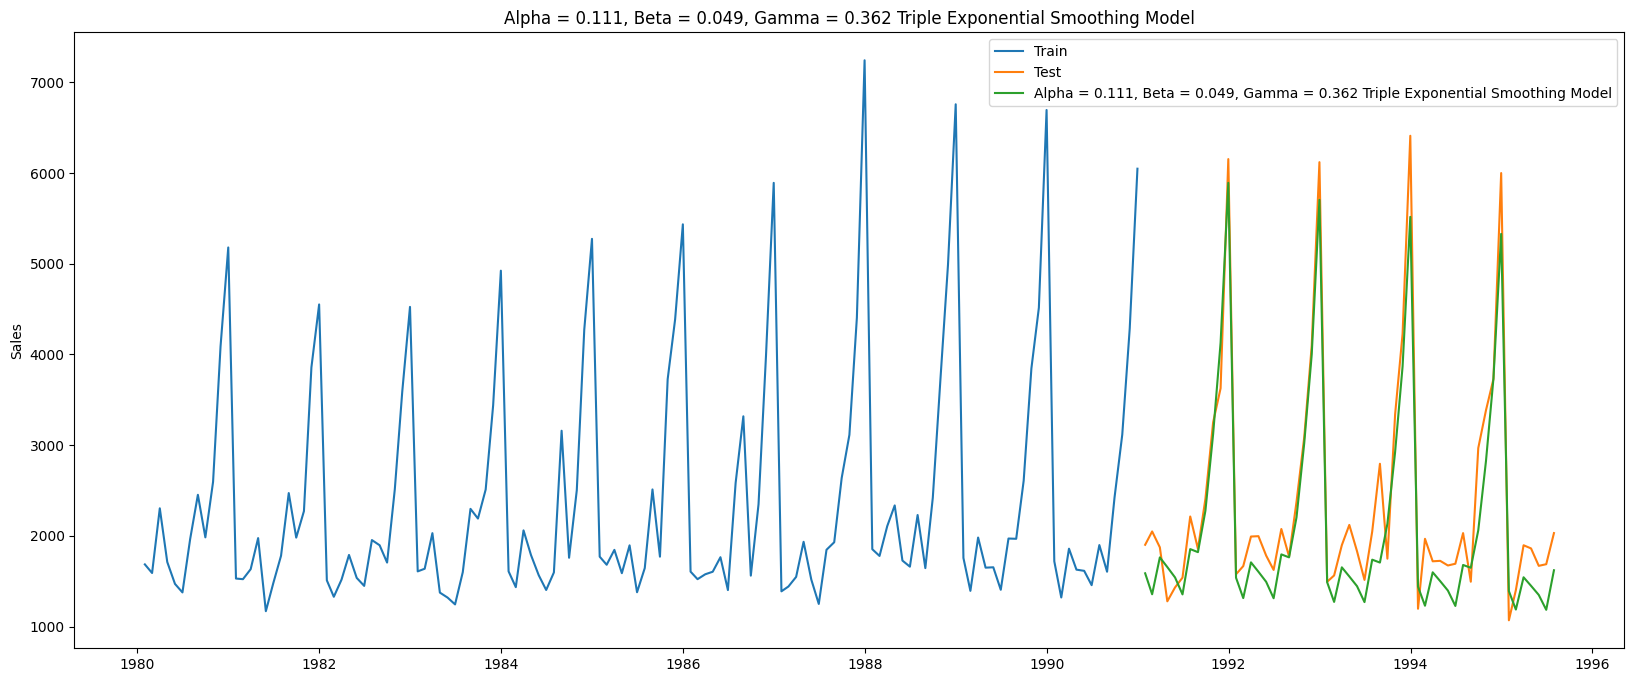

In [116]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(TES_predict_am, label = 'Alpha = 0.111, Beta = 0.049, Gamma = 0.362 Triple Exponential Smoothing Model')
plt.legend(loc = 'best')
plt.grid()
plt.ylabel('Sales')
plt.title('Alpha = 0.111, Beta = 0.049, Gamma = 0.362 Triple Exponential Smoothing Model')
plt.grid();


In [117]:
# Calculate the RMSE for the training data

rmse_tesa_train = mean_squared_error(train, model_TES_am.fittedvalues, squared=False)
rmse_tesa_train

355.7724478392862

In [118]:

train_rmse8 = pd.DataFrame({'Train_RMSE': [round(rmse_tesa_train, 2)]}, index=['Alpha = 0.111, Beta = 0.049, Gamma = 0.362 Triple Exponential Smoothing'])

train_rmse = pd.concat([train_rmse, train_rmse8])
train_rmse

Train_RMSE
Linear Regression On Time                              1279.32
NaiveModel                                             3867.70
Simple Average Model                                   1298.48
2 point Trailing Moving Average                         706.18
Alpha = 0.07 Simple Exponential Smoothing              1322.90
Alpha = 0.02 Simple Exponential Smoothing              1346.26
Alpha=0.665, Beta = 0.0001 Double Exponential S...     1339.50
Alpha = 0.02, Beta = 0.38 Double Exponential Sm...     1398.03
Alpha = 0.111, Beta = 0.049, Gamma = 0.362 Trip...      355.77

#### Model Accuracy

In [119]:
#MAPE
TES_aut_mape = MAPE(test.values, TES_predict_am.values)
print('MAPE =', round(TES_aut_mape, 2))

MAPE = 48.37


In [120]:
#RMSE
TES_aut_rmse= mean_squared_error(test.values,TES_predict_am.values,squared=False)
print('TES_aam RMSE:', round(TES_aut_rmse,2))


TES_aam RMSE: 403.71


In [121]:

resultsDf_8 = pd.DataFrame({'Test_RMSE': round(TES_aut_rmse, 2), 'MAPE': round(TES_aut_mape, 2)},
                              index = ['Alpha = 0.111, Beta = 0.049, Gamma = 0.362 Triple Exponential Smoothing'])


resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf


Test_RMSE    MAPE
Linear Regression On Time                             1389.14   59.35
NaiveModel                                            3864.28  201.33
Simple Average Model                                  1275.08   39.16
2 point Trailing Moving Average                        813.40   24.71
Alpha = 0.07 Simple Exponential Smoothing             1338.00   53.88
Alpha = 0.02 Simple Exponential Smoothing             1278.50   42.41
Alpha=0.665, Beta = 0.0001 Double Exponential S...    5291.88  268.91
Alpha = 0.02, Beta = 0.38 Double Exponential Sm...    1275.87   40.97
Alpha = 0.111, Beta = 0.049, Gamma = 0.362 Trip...     403.71   48.37

 **Insights**
- The triple exponential smoothing model captures both the trend and seasonality of the time series.
- The Root Mean Square Error (RMSE) is 403.71, and the Mean Absolute Percentage Error (MAPE) is 48.37 for the Triple Exponential Smoothing model. This model has the lowest error among all the evaluated models.
- The values of alpha and beta, being close to 0, indicate that the forecast relies heavily on historical data to build the model. On the other hand, the gamma value has a mid-range value, suggesting that it uses more than just the recent past data but less than the entire historical past.





#### TES: Brute Force Method

In [122]:
TES_train = train.copy()
TES_test = test.copy()
custom_TES = pd.DataFrame(columns = ['Alpha', 'Beta', 'Gamma', 'Train RMSE', 'Test RMSE'])

step size in the arange function is selected a bit higher to allow for faster computation

In [123]:
for i in np.arange(0.01, 1, 0.03):
  for j in np.arange(0.01, 1, 0.03):
    for k in np.arange(0.01, 1, 0.03):
      TES_alpha_ijk = ExponentialSmoothing(train, trend = 'additive',
                                           seasonal = 'multiplicative',
                                           initialization_method = 'estimated').fit(smoothing_level = i,
                                                                                    smoothing_trend = j,
                                                                                    smoothing_seasonal = k,
                                                                                    optimized = False, use_brute = True)
      TES_train['predict', i, j, k] = TES_alpha_ijk.fittedvalues
      TES_test['predict', i, j, k] = TES_alpha_ijk.forecast(len(test))

      rmse_TES_train = mean_squared_error(train, TES_train['predict', i, j, k], squared = False)
      rmse_TES_test = mean_squared_error(test, TES_test['predict', i, j, k], squared = False)

      custom_TES = custom_TES.append({'Alpha': i, 'Beta': j, 'Gamma': k, 'Train RMSE': rmse_TES_train, 'Test RMSE': rmse_TES_test}, ignore_index = True)

custom_TES.sort_values(by = 'Test RMSE').head()

Alpha  Beta  Gamma  Train RMSE   Test RMSE
41     0.01  0.04   0.25  470.837600  302.728640
40     0.01  0.04   0.22  481.966174  303.298599
42     0.01  0.04   0.28  461.026879  303.899551
1163   0.04  0.07   0.25  366.400702  305.639893
1164   0.04  0.07   0.28  365.138125  305.990053

Based on the evaluation, the triple exponential smoothing model with the following parameter values is selected as the best fit for our test data:

- Alpha (level smoothing parameter) = 0.01
- Beta (trend smoothing parameter) = 0.04
- Gamma (seasonality smoothing parameter) = 0.25


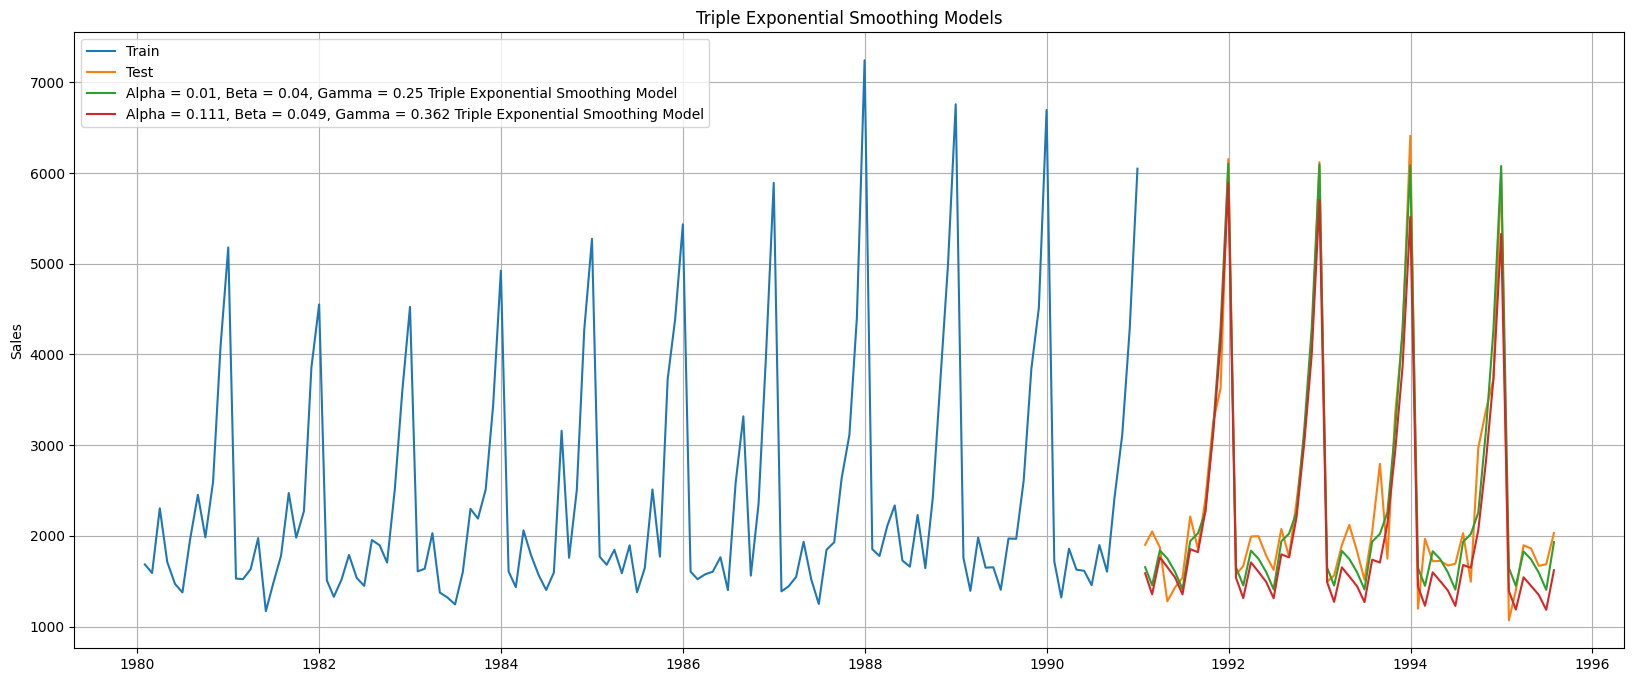

In [124]:
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(TES_test['predict', 0.01, 0.04, 0.25], label = 'Alpha = 0.01, Beta = 0.04, Gamma = 0.25 Triple Exponential Smoothing Model')
plt.plot(TES_predict_am, label = 'Alpha = 0.111, Beta = 0.049, Gamma = 0.362 Triple Exponential Smoothing Model')
plt.legend(loc = 'best')
plt.grid()
plt.ylabel('Sales')
plt.title('Triple Exponential Smoothing Models');

In [125]:
# Calculate the RMSE for the training data
# Since best RMSE table printed above on train data: Let's print against Alpha=0.665, Beta = 0.0001

rmse_tesbf_train = custom_TES.sort_values(by = 'Test RMSE').head(1)['Train RMSE'].values.item()
rmse_tesbf_train


470.837599653533

In [126]:

train_rmse9 = pd.DataFrame({'Train_RMSE': [round(rmse_tesbf_train, 2)]}, index=['Alpha = 0.01, Beta = 0.04, Gamma = 0.25 Triple Exponential Smoothing'])

train_rmse = pd.concat([train_rmse, train_rmse9])
train_rmse

Train_RMSE
Linear Regression On Time                              1279.32
NaiveModel                                             3867.70
Simple Average Model                                   1298.48
2 point Trailing Moving Average                         706.18
Alpha = 0.07 Simple Exponential Smoothing              1322.90
Alpha = 0.02 Simple Exponential Smoothing              1346.26
Alpha=0.665, Beta = 0.0001 Double Exponential S...     1339.50
Alpha = 0.02, Beta = 0.38 Double Exponential Sm...     1398.03
Alpha = 0.111, Beta = 0.049, Gamma = 0.362 Trip...      355.77
Alpha = 0.01, Beta = 0.04, Gamma = 0.25 Triple ...      470.84

#####Model Evaluation

In [127]:
#MAPE
TES_tuned_mape = MAPE(test.values, TES_test['predict', 0.01, 0.04, 0.25].values)
print('MAPE =', round(TES_tuned_mape, 2))

MAPE = 49.86


In [128]:
#RMSE
TES_tuned_rmse = custom_TES.sort_values(by = 'Test RMSE').values[0][4]
print('RMSE =', round(TES_tuned_rmse, 2))

RMSE = 302.73


In [129]:
resultsDf9 = pd.DataFrame({'Test_RMSE': round(TES_tuned_rmse, 2), 'MAPE': round(TES_tuned_mape, 2)},
                              index = ['Alpha = 0.01, Beta = 0.04, Gamma = 0.25 Triple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf9])
resultsDf

Test_RMSE    MAPE
Linear Regression On Time                             1389.14   59.35
NaiveModel                                            3864.28  201.33
Simple Average Model                                  1275.08   39.16
2 point Trailing Moving Average                        813.40   24.71
Alpha = 0.07 Simple Exponential Smoothing             1338.00   53.88
Alpha = 0.02 Simple Exponential Smoothing             1278.50   42.41
Alpha=0.665, Beta = 0.0001 Double Exponential S...    5291.88  268.91
Alpha = 0.02, Beta = 0.38 Double Exponential Sm...    1275.87   40.97
Alpha = 0.111, Beta = 0.049, Gamma = 0.362 Trip...     403.71   48.37
Alpha = 0.01, Beta = 0.04, Gamma = 0.25 Triple ...     302.73   49.86

**Insights:**

- The triple exponential smoothing model captures both the trend and seasonality of the time series effectively.
- With a Root Mean Square Error (RMSE) of 302.73 and a Mean Absolute Percentage Error (MAPE) of 49.86, this model exhibits the best accuracy among all the evaluated models.
- The values of alpha and beta being close to 0 imply that the model heavily relies on historical data to make forecasts. On the other hand, the mid-range value of gamma indicates that it strikes a balance between recent past data and the entire historical past to capture seasonality.





#### Plotting all the models so far

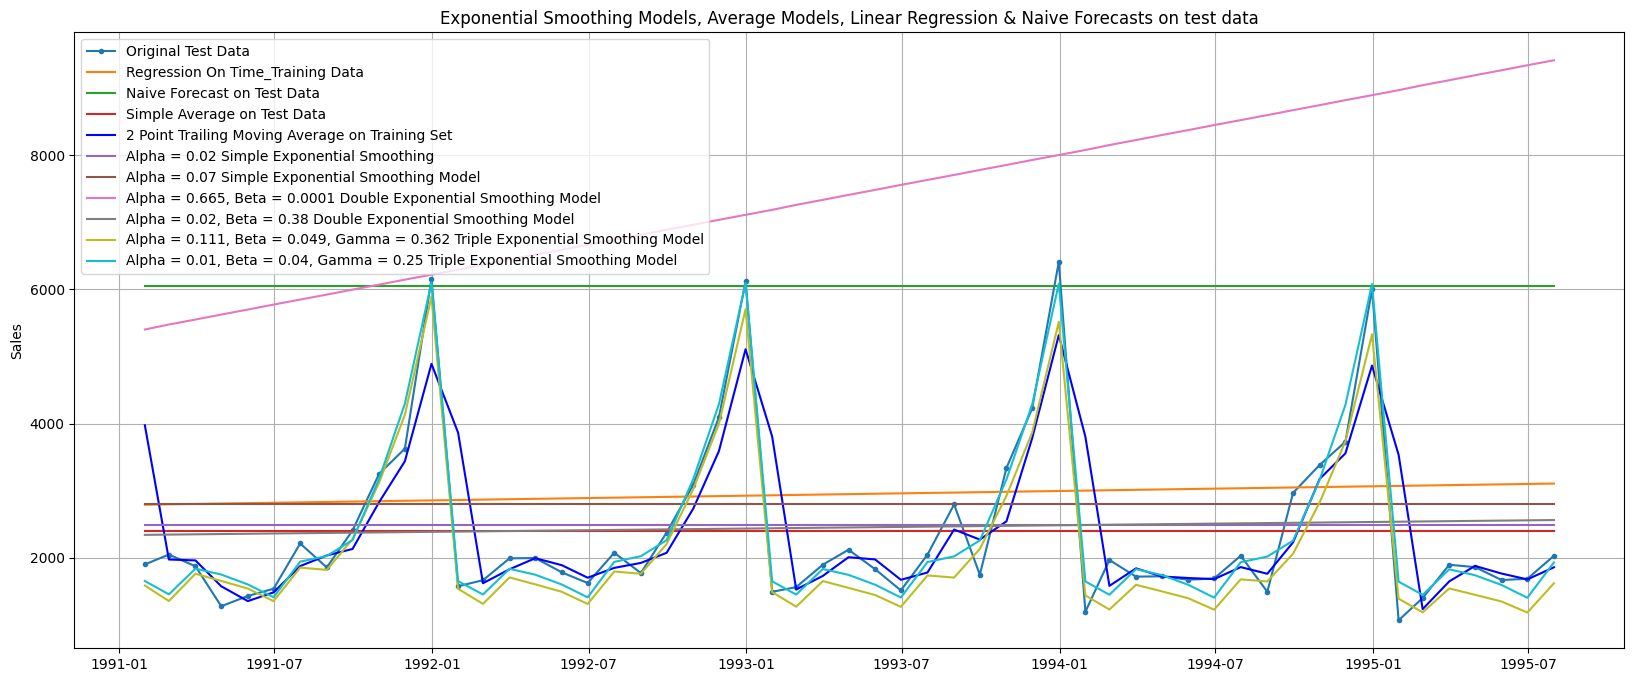

In [130]:
plt.plot(test, label = 'Original Test Data', marker = '.')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set', color='b')
plt.plot(SES_test['predict', 0.02], label = 'Alpha = 0.02 Simple Exponential Smoothing')
plt.plot(SES_predict, label='Alpha = 0.07 Simple Exponential Smoothing Model')
plt.plot(DES_predict, label = 'Alpha = 0.665, Beta = 0.0001 Double Exponential Smoothing Model')
plt.plot(DES_test['predict', 0.02, 0.38], label = 'Alpha = 0.02, Beta = 0.38 Double Exponential Smoothing Model')
plt.plot(TES_predict_am, label = 'Alpha = 0.111, Beta = 0.049, Gamma = 0.362 Triple Exponential Smoothing Model')
plt.plot(TES_test['predict', 0.01, 0.04, 0.25], label = 'Alpha = 0.01, Beta = 0.04, Gamma = 0.25 Triple Exponential Smoothing Model')

plt.legend(loc = 'best')
plt.grid()
plt.ylabel('Sales')
plt.title('Exponential Smoothing Models, Average Models, Linear Regression & Naive Forecasts on test data');

**Insights:**
- The triple exponential smoothing models performed best followed by the 2-point moving average model for capturing both trend and seasonality in the time series.

- The brute force triple exponential smoothing models show the best accuracy among all models evaluated, with the lowest Root Mean Square Error (RMSE) of 302.73 and Mean Absolute Percentage Error (MAPE) of 49.86.

- The moving average model, although effective to some extent, is not well-suited for capturing significant changes in the time series due to its averaging nature.
- Rest other models were not suitable for prediction as they do not capture both Trend & Seasonality required.



## **5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.**

#### Checking for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller (ADF) Test is used to check the stationarity of a time series. The test formulates the following null and alternative hypotheses:

- Null Hypothesis (Ho): The time series is non-stationary.
- Alternative Hypothesis (Ha): The time series is stationary.




In [131]:
## Test for stationarity of the Entire series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

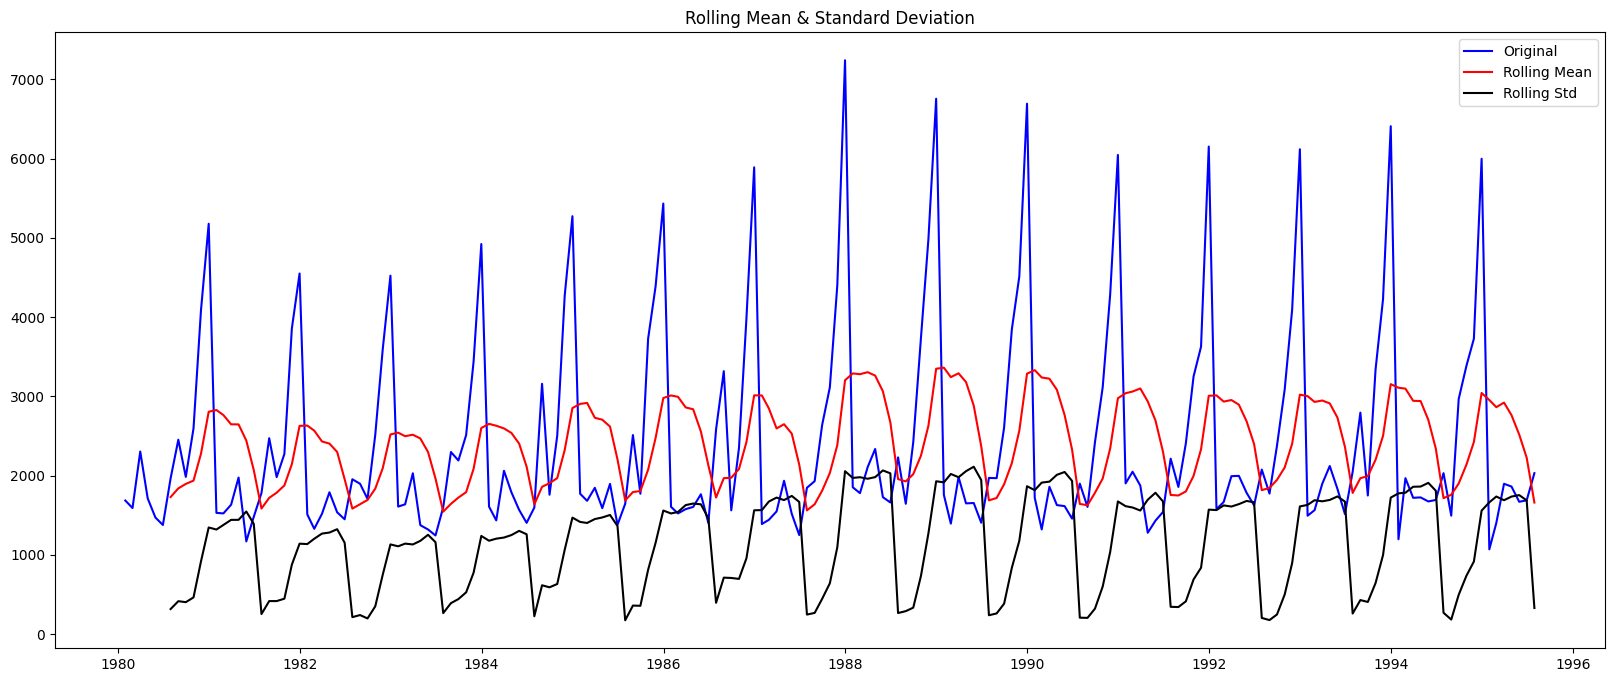

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [132]:
#Calling the function to see the results
test_stationarity(df['Sparkling'])

- We see that at 5% significant level the Time Series is non-stationary.
- Let us take a difference of order 1 and check whether the Time Series is stationary or not.

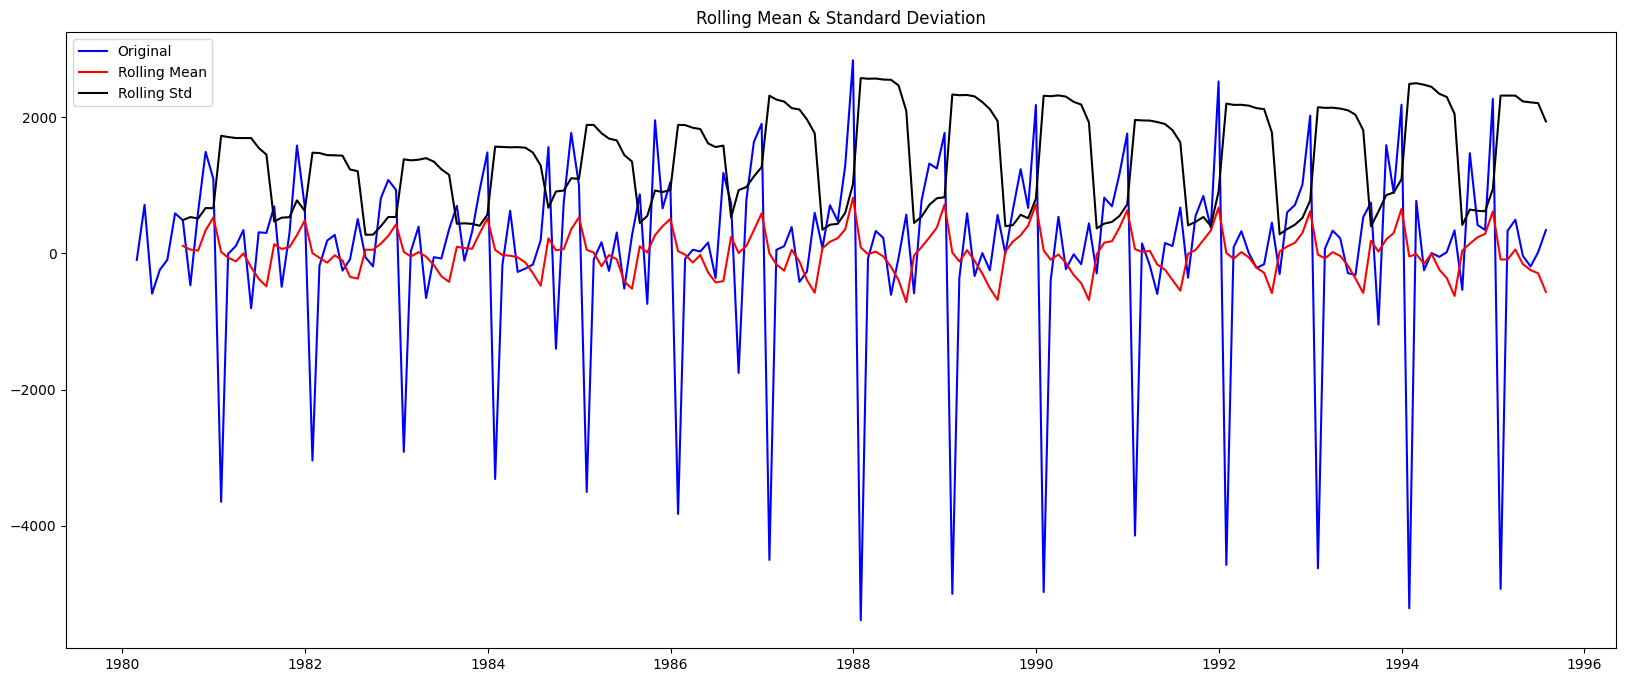

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [133]:
#Taking first order difference using diff function
test_stationarity(df['Sparkling'].diff().dropna())

- We see that **at difference of order 1, the series have become stationary** at $\alpha$ = 0.05.

#### Check for stationarity of the Training Data Time Series.

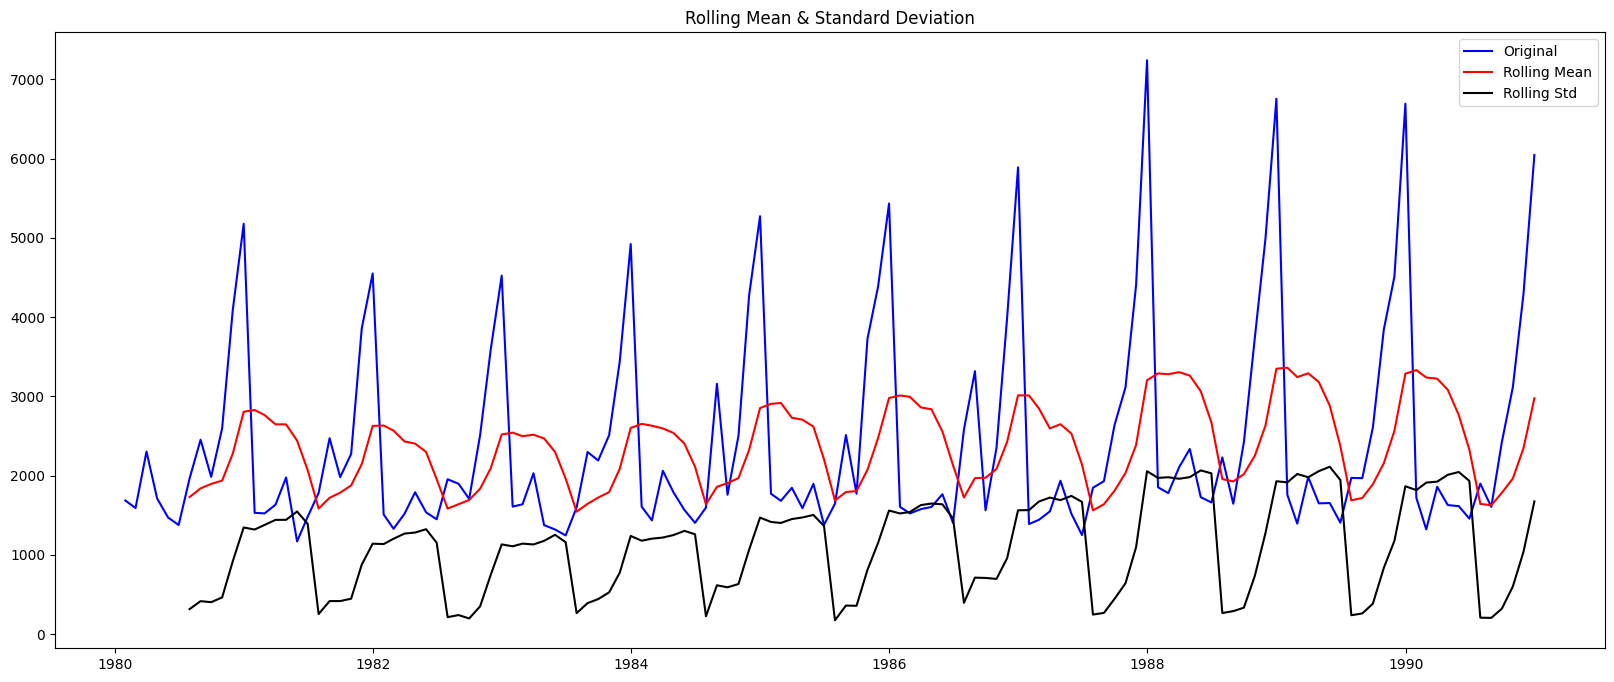

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [134]:
#Calling the function to check stationarity on training dataset
test_stationarity(train['Sparkling'])

- We see that the series is not stationary at $\alpha$ = 0.05.

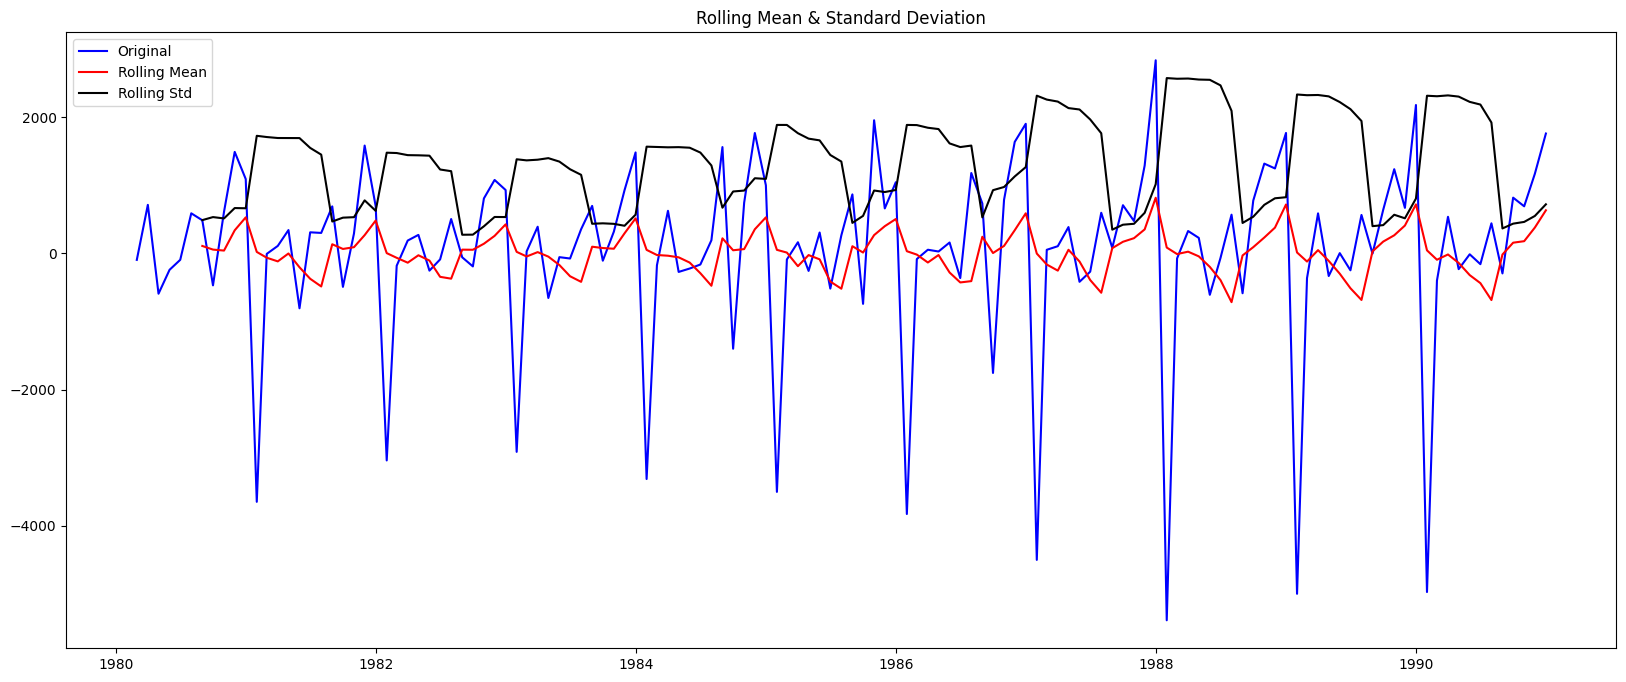

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [135]:
#Taking first order difference using diff function

test_stationarity(train['Sparkling'].diff().dropna())

- We see that **at difference of order 1, the series have become stationary** at $\alpha$ = 0.05.

## **6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.**

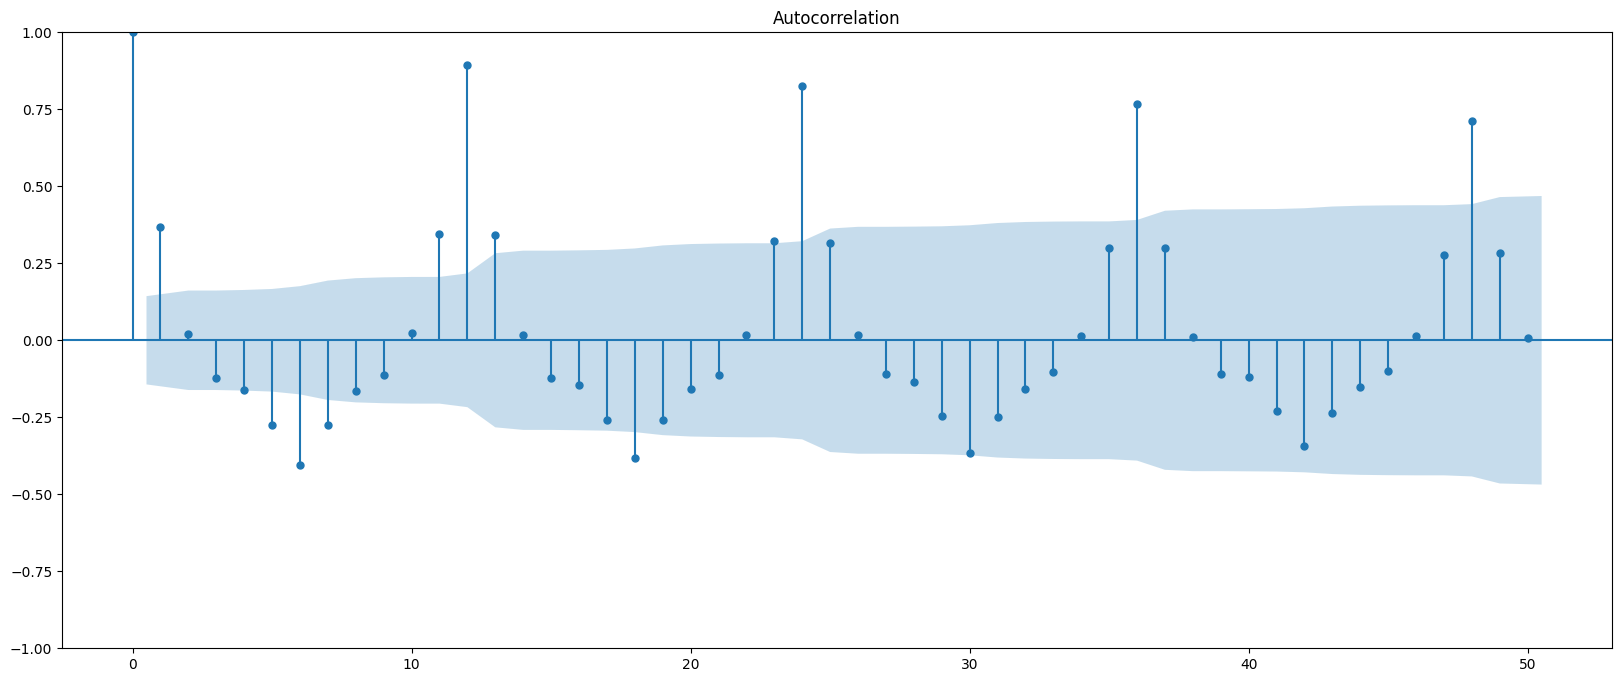

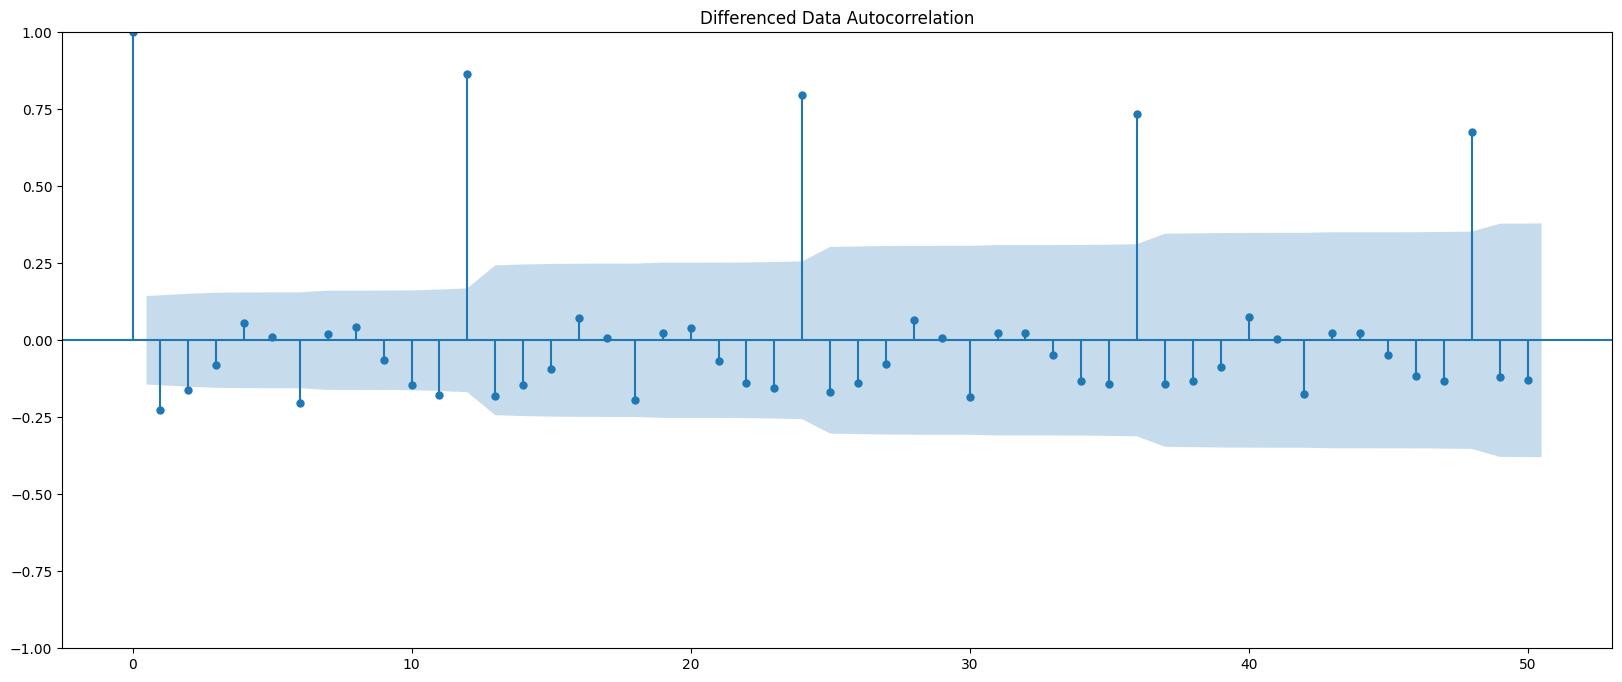

In [136]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

- From the above plots, we can say that there seems to be a seasonality in the data.

### Build an Automated version of an **ARIMA model**
For which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [137]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.
import itertools

p = q = range(0, 3)
d = [1]
pdq = list(itertools.product(p, d, q))

print('Examples of the parameter combinations for the Model')
for i in range(0, len(pdq)):
    print('Model:', pdq[i])

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [138]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [139]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
  ARIMA_model = ARIMA(train, order = param).fit()
  print('ARIMA', param, '- AIC :', ARIMA_model.aic)
  ARIMA_AIC = ARIMA_AIC.append({'param': param, 'AIC': ARIMA_model.aic}, ignore_index = True)

ARIMA (0, 1, 0) - AIC : 2267.6630357855465
ARIMA (0, 1, 1) - AIC : 2263.0600155919765
ARIMA (0, 1, 2) - AIC : 2234.4083231352784
ARIMA (1, 1, 0) - AIC : 2266.6085393190097
ARIMA (1, 1, 1) - AIC : 2235.755094674255
ARIMA (1, 1, 2) - AIC : 2234.5272004518056
ARIMA (2, 1, 0) - AIC : 2260.36574396809
ARIMA (2, 1, 1) - AIC : 2233.777626238336
ARIMA (2, 1, 2) - AIC : 2213.5092125741553


In [140]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2213.509213
7  (2, 1, 1)  2233.777626
2  (0, 1, 2)  2234.408323
5  (1, 1, 2)  2234.527200
4  (1, 1, 1)  2235.755095
6  (2, 1, 0)  2260.365744
1  (0, 1, 1)  2263.060016
3  (1, 1, 0)  2266.608539
0  (0, 1, 0)  2267.663036

In [141]:
# Fit the ARIMA(2, 1, 2) model on the training data

auto_ARIMA = ARIMA(train, order = (2, 1, 2)).fit()
print(auto_ARIMA.summary())


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 06 Aug 2023   AIC                           2213.509
Time:                        15:33:33   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.215      0.0

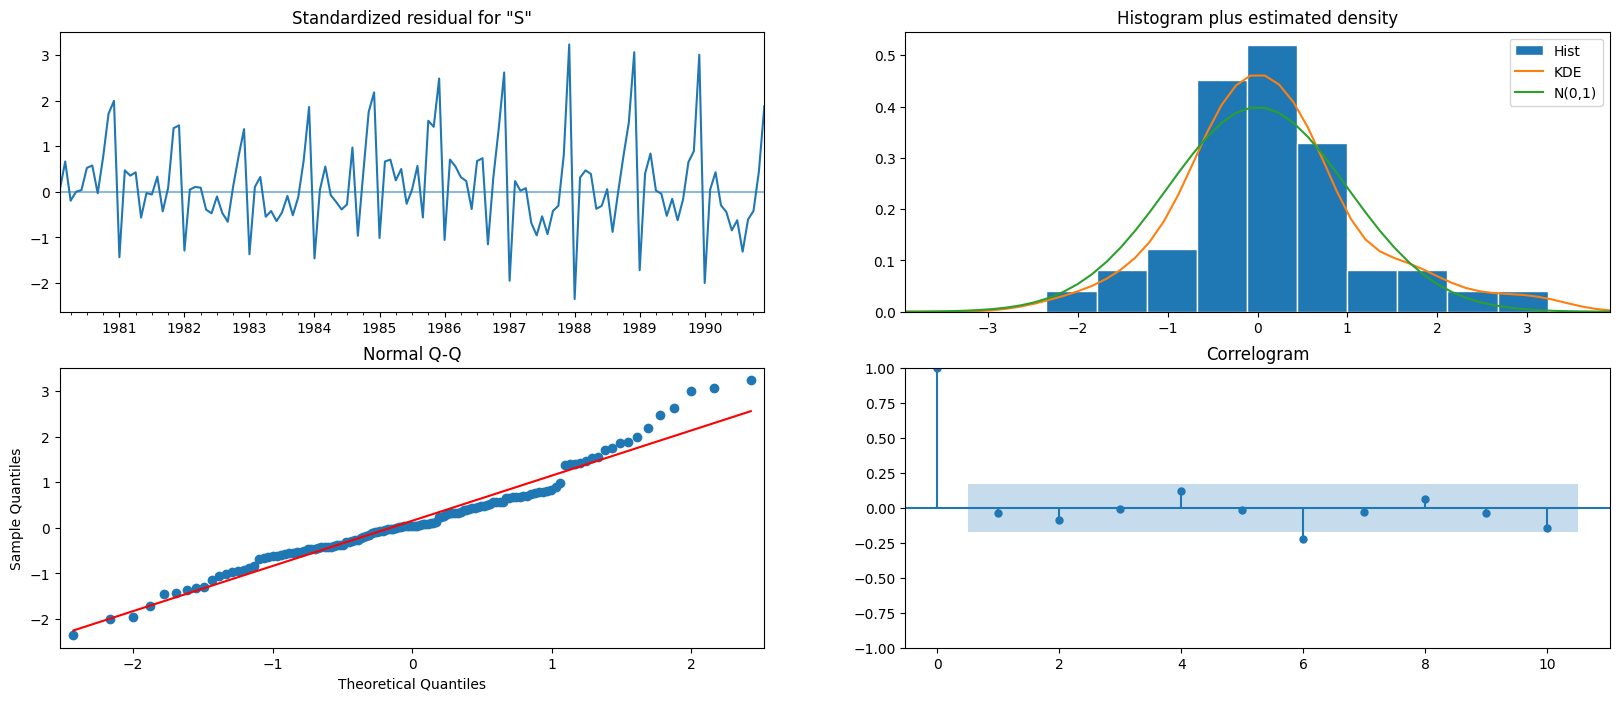

In [142]:
auto_ARIMA.plot_diagnostics();

In [143]:
pred_auto_ARIMA = auto_ARIMA.forecast(len(test))

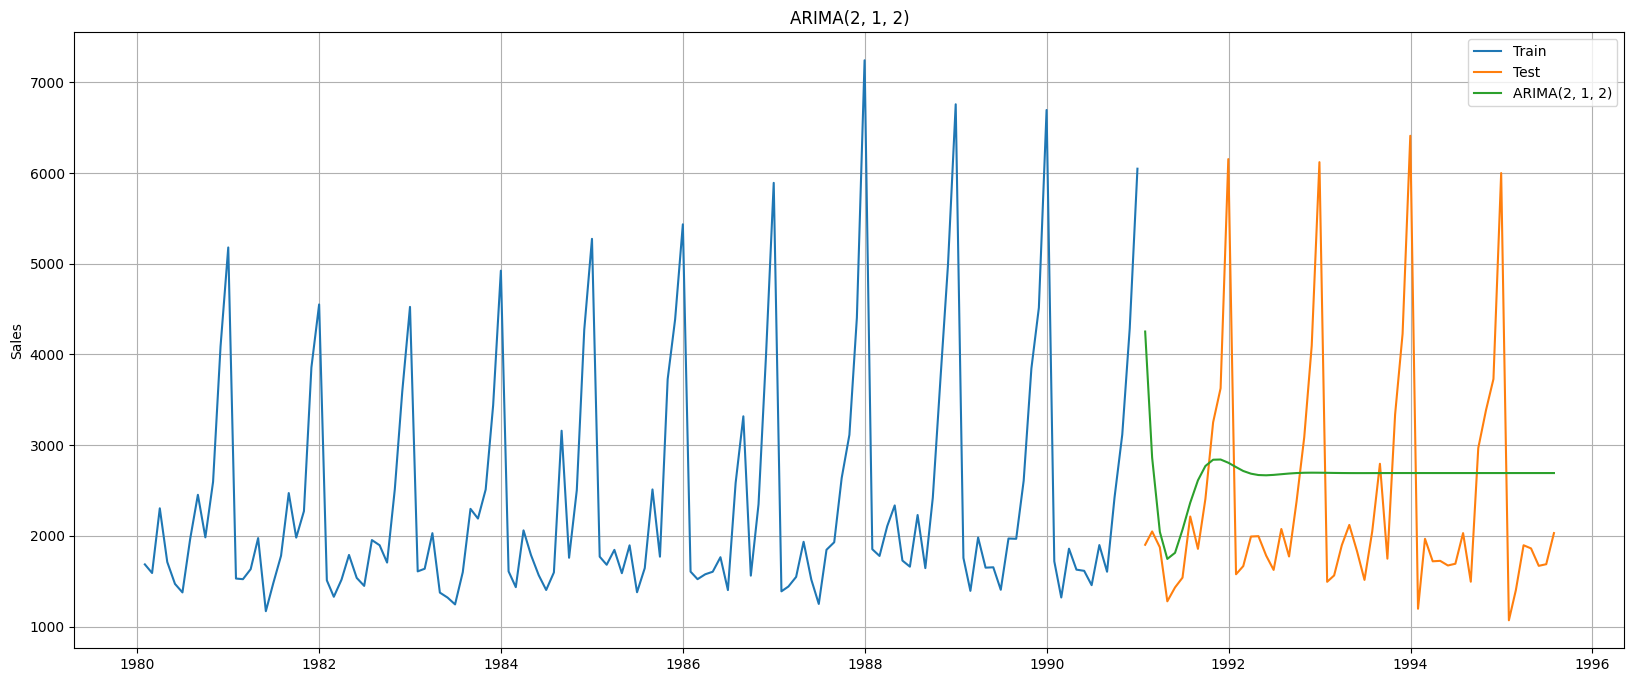

In [144]:
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(pred_auto_ARIMA, label = 'ARIMA(2, 1, 2)')
plt.legend(loc = 'best')
plt.grid()
plt.ylabel('Sales')
plt.title('ARIMA(2, 1, 2)');

In [145]:
#Calcultaing RMSE on Training data
#First Get the fitted values of the ARIMA(2, 1, 2) model on the training data
pred_train_auto_ARIMA = auto_ARIMA.fittedvalues

# Remove the first NaN value from the predicted values
pred_train_auto_ARIMA = pred_train_auto_ARIMA[1:]
# Remove the first element from the train data to match the number of samples
train = train[1:]

In [146]:
# Calculate the train RMSE for the ARIMA(2, 1, 2) model
rmse_train_auto_ARIMA = mean_squared_error(train, pred_train_auto_ARIMA, squared=False)
rmse_train_auto_ARIMA

1076.5141500597833

In [147]:
train_rmse10 = pd.DataFrame({'Train_RMSE': [round(rmse_train_auto_ARIMA, 2)]}, index=['Automated ARIMA(2, 1, 2)'])

train_rmse = pd.concat([train_rmse, train_rmse10])
train_rmse

Train_RMSE
Linear Regression On Time                              1279.32
NaiveModel                                             3867.70
Simple Average Model                                   1298.48
2 point Trailing Moving Average                         706.18
Alpha = 0.07 Simple Exponential Smoothing              1322.90
Alpha = 0.02 Simple Exponential Smoothing              1346.26
Alpha=0.665, Beta = 0.0001 Double Exponential S...     1339.50
Alpha = 0.02, Beta = 0.38 Double Exponential Sm...     1398.03
Alpha = 0.111, Beta = 0.049, Gamma = 0.362 Trip...      355.77
Alpha = 0.01, Beta = 0.04, Gamma = 0.25 Triple ...      470.84
Automated ARIMA(2, 1, 2)                               1076.51

#### Model Evaluation

In [148]:
#MAPE
mape_auto_ARIMA = MAPE(test.values, pred_auto_ARIMA.values)
print('MAPE =', round(mape_auto_ARIMA, 2))

MAPE = 49.42


In [149]:
rmse_auto_ARIMA = mean_squared_error(test['Sparkling'],pred_auto_ARIMA,squared=False)
print('RMSE:', round(rmse_auto_ARIMA,2))

RMSE: 1299.98


In [150]:

resultsDf_10 = pd.DataFrame({'Test_RMSE': round(rmse_auto_ARIMA, 2), 'MAPE': round(mape_auto_ARIMA, 2)}, index = ['Automated ARIMA(2, 1, 2)'])

resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf


Test_RMSE    MAPE
Linear Regression On Time                             1389.14   59.35
NaiveModel                                            3864.28  201.33
Simple Average Model                                  1275.08   39.16
2 point Trailing Moving Average                        813.40   24.71
Alpha = 0.07 Simple Exponential Smoothing             1338.00   53.88
Alpha = 0.02 Simple Exponential Smoothing             1278.50   42.41
Alpha=0.665, Beta = 0.0001 Double Exponential S...    5291.88  268.91
Alpha = 0.02, Beta = 0.38 Double Exponential Sm...    1275.87   40.97
Alpha = 0.111, Beta = 0.049, Gamma = 0.362 Trip...     403.71   48.37
Alpha = 0.01, Beta = 0.04, Gamma = 0.25 Triple ...     302.73   49.86
Automated ARIMA(2, 1, 2)                              1299.98   49.42

**Insights:**
- The ARIMA model aims to capture the underlying trend in the data but does not consider the seasonality component.
- The model's performance is evaluated with a Root Mean Square Error of 1299.98 and a Mean Absolute Percentage Error of 49.42.






### Build an Automated version of a **SARIMA model**
For which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

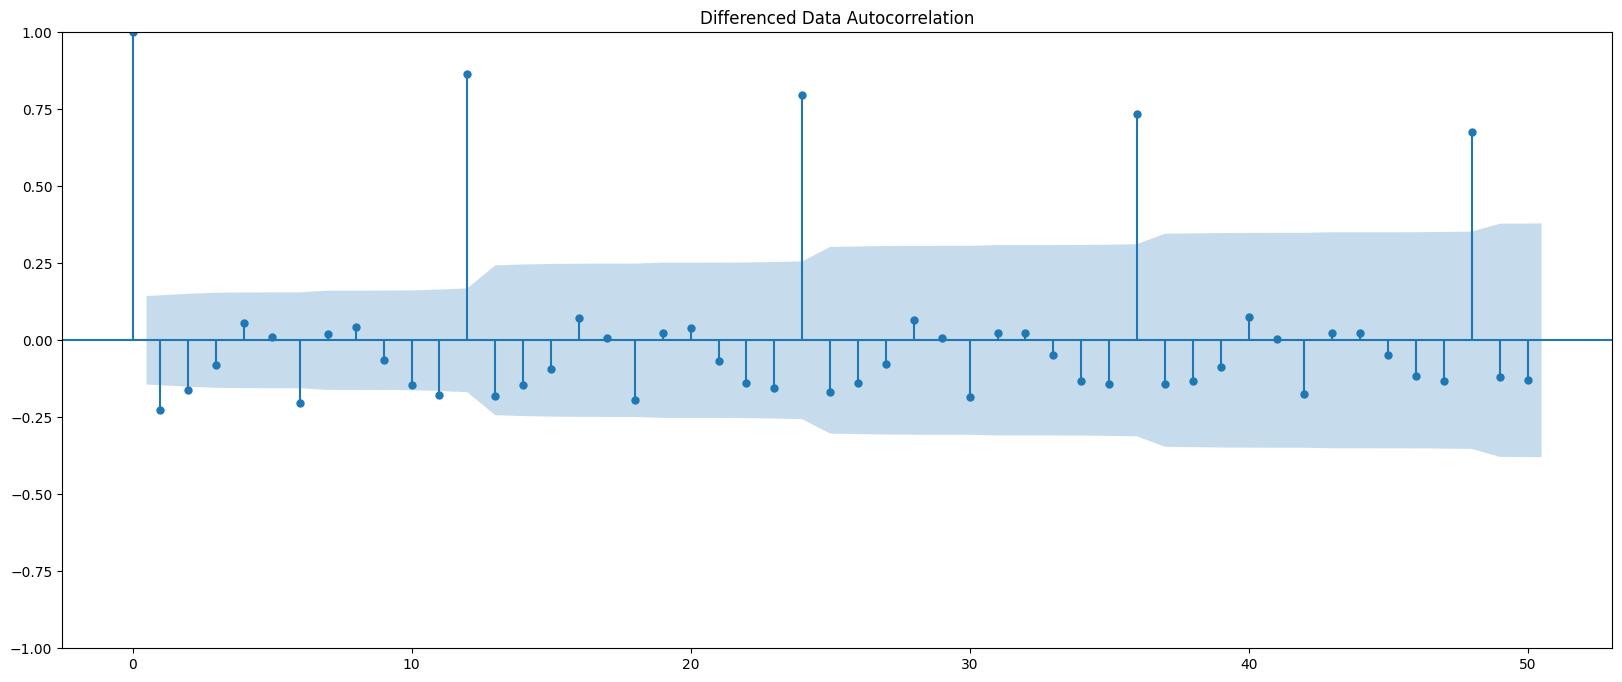

In [151]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

- S=12 is chosen for seasonal differencing as it is significant, and the ACF plot at S=12 does not taper off.

- This indicates the presence of seasonality, and applying seasonal differencing to the original series can improve the model's performance.






#### Setting the seasonality as 12  to estimate parametrs using auto SARIMA model.
d = 1 to make the time series stationary

Seasonal differencing not yet applied to make the time series stationary D = 0

#### Auto **SARIMA** - without differencing

In [152]:
#Train - Test Split ( Since we removed first value previously)
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [153]:
train

Sparkling
Year_Month           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471
...               ...
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

[132 rows x 1 columns]

In [154]:
p = q = range(0, 3)
d = [1]
D = [0]
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]

print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [155]:
SARIMA_AIC = pd.DataFrame(columns = ['param', 'seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [156]:
for param in pdq:
  for param_seasonal in PDQ:
    SARIMA_model = sm.tsa.statespace.SARIMAX(train,
                                             order = param, seasonal_order = param_seasonal,
                                             enforce_stationarity = False,
                                             enforce_invertibility = False).fit(maxiter = 1000)
    print('SARIMA', param, param_seasonal, '- AIC:', SARIMA_model.aic)
    SARIMA_AIC = SARIMA_AIC.append({'param': param, 'seasonal': param_seasonal,
                                    'AIC': SARIMA_model.aic}, ignore_index = True)

SARIMA (0, 1, 0) (0, 0, 0, 12) - AIC: 2251.3597196862966
SARIMA (0, 1, 0) (0, 0, 1, 12) - AIC: 1956.2614616844573
SARIMA (0, 1, 0) (0, 0, 2, 12) - AIC: 1723.153364023447
SARIMA (0, 1, 0) (1, 0, 0, 12) - AIC: 1837.4366022456677
SARIMA (0, 1, 0) (1, 0, 1, 12) - AIC: 1806.990530138882
SARIMA (0, 1, 0) (1, 0, 2, 12) - AIC: 1633.2108735791837
SARIMA (0, 1, 0) (2, 0, 0, 12) - AIC: 1648.3776153470858
SARIMA (0, 1, 0) (2, 0, 1, 12) - AIC: 1647.2054158613616
SARIMA (0, 1, 0) (2, 0, 2, 12) - AIC: 1630.9898053920804
SARIMA (0, 1, 1) (0, 0, 0, 12) - AIC: 2230.162907850583
SARIMA (0, 1, 1) (0, 0, 1, 12) - AIC: 1923.7688649566603
SARIMA (0, 1, 1) (0, 0, 2, 12) - AIC: 1692.7089572783755
SARIMA (0, 1, 1) (1, 0, 0, 12) - AIC: 1797.179588183827
SARIMA (0, 1, 1) (1, 0, 1, 12) - AIC: 1738.0903193744662
SARIMA (0, 1, 1) (1, 0, 2, 12) - AIC: 1570.1509144550118
SARIMA (0, 1, 1) (2, 0, 0, 12) - AIC: 1605.675195417545
SARIMA (0, 1, 1) (2, 0, 1, 12) - AIC: 1599.2245085437517
SARIMA (0, 1, 1) (2, 0, 2, 12) - AIC

In [157]:
SARIMA_AIC.sort_values(by = 'AIC').head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1555.934563
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121563
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340404

 p 1, d = 1, q = 2, P = 1, D = 0, Q = 2, S = 12

In [158]:
auto_SARIMA = sm.tsa.statespace.SARIMAX(train, order = (1, 1, 2),
                                        seasonal_order = (1, 0, 2, 12),
                                        enforce_stationarity = False,
                                        enforce_invertibility = False).fit(maxiter = 1000)
print(auto_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 06 Aug 2023   AIC                           1555.584
Time:                                    15:34:23   BIC                           1574.095
Sample:                                01-31-1980   HQIC                          1563.083
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.464      0.014      -1.128      -0.128
ma.L1         -0.1040      0.225   

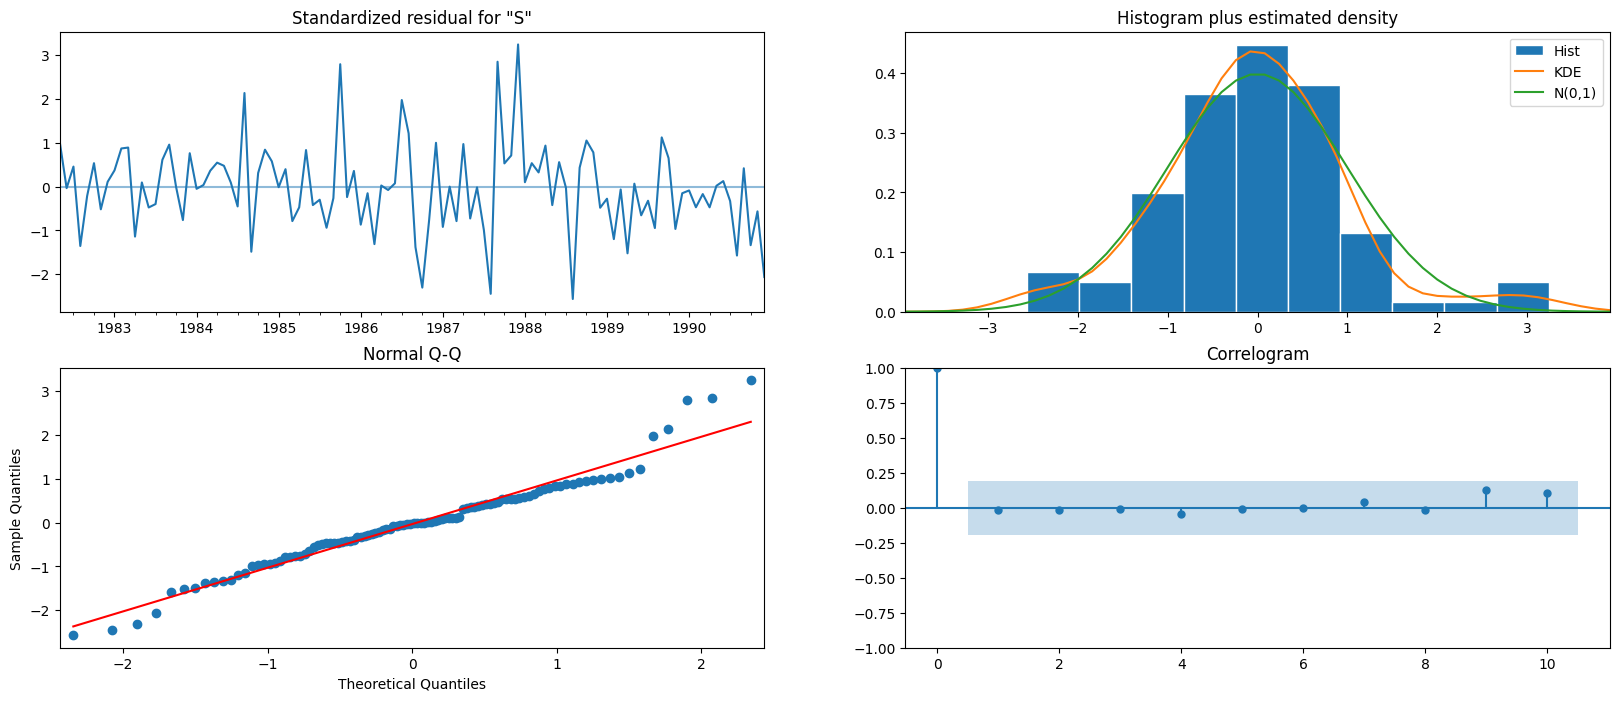

In [159]:
auto_SARIMA.plot_diagnostics()
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.

In [160]:
predicted_auto_SARIMA = auto_SARIMA.get_forecast(steps=len(test))

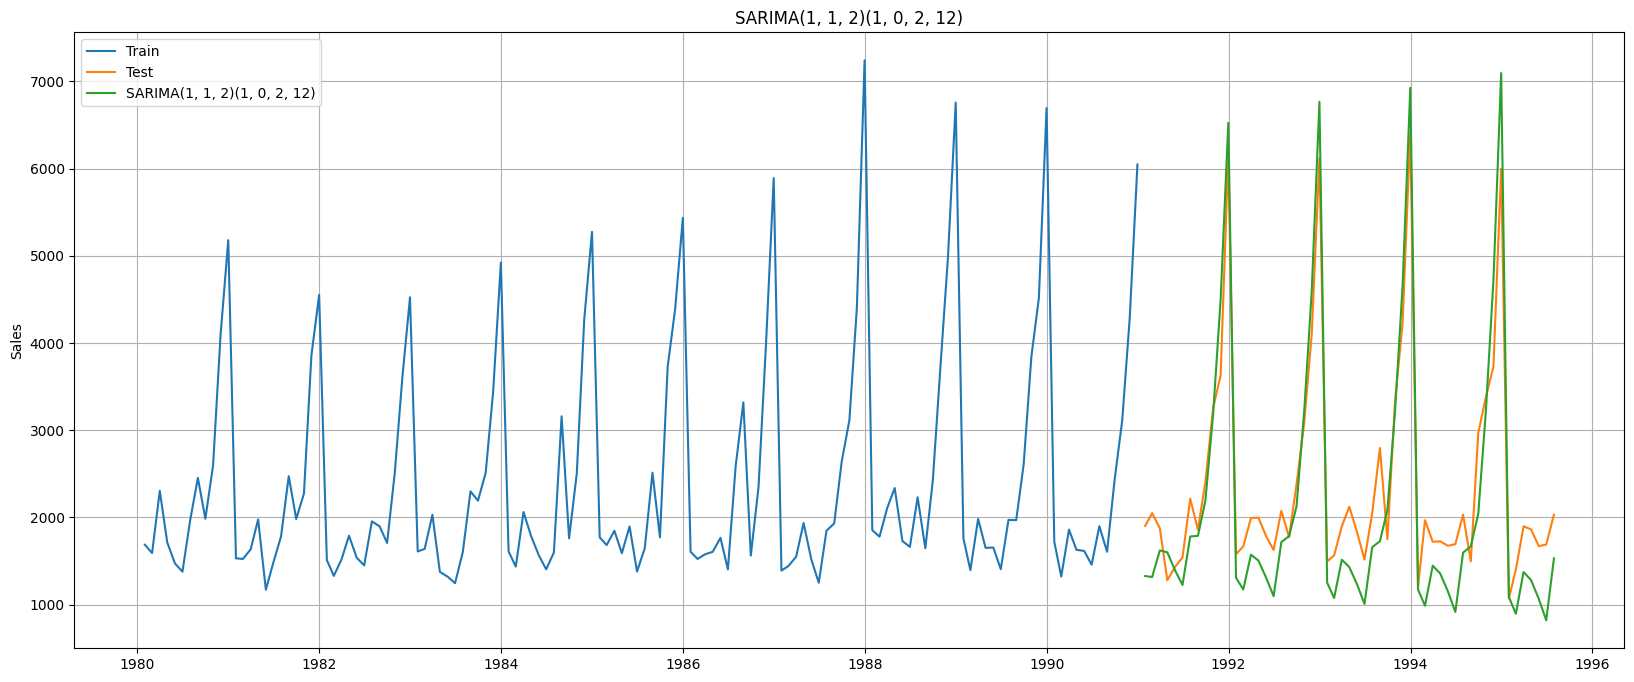

In [161]:
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(predicted_auto_SARIMA.predicted_mean, label = 'SARIMA(1, 1, 2)(1, 0, 2, 12)')
plt.legend(loc = 'best')
plt.ylabel('Sales')
plt.title('SARIMA(1, 1, 2)(1, 0, 2, 12)')
plt.grid();

In [162]:
# Calculate the train RMSE on Test data
pred_train_auto_SARIMA = auto_SARIMA.fittedvalues

# Ensure both arrays have the same length by adjusting the indexing
train = train.iloc[-len(pred_train_auto_SARIMA):]


In [163]:
rmse_train_auto_SARIMA = mean_squared_error(train, pred_train_auto_SARIMA, squared=False)


In [164]:
train_rmse12 = pd.DataFrame({'Train_RMSE': [round(rmse_train_auto_SARIMA, 2)]}, index=['Automated SARIMA(1, 1, 2)(1, 0, 2, 12)'])

train_rmse = pd.concat([train_rmse, train_rmse12])
train_rmse

Train_RMSE
Linear Regression On Time                              1279.32
NaiveModel                                             3867.70
Simple Average Model                                   1298.48
2 point Trailing Moving Average                         706.18
Alpha = 0.07 Simple Exponential Smoothing              1322.90
Alpha = 0.02 Simple Exponential Smoothing              1346.26
Alpha=0.665, Beta = 0.0001 Double Exponential S...     1339.50
Alpha = 0.02, Beta = 0.38 Double Exponential Sm...     1398.03
Alpha = 0.111, Beta = 0.049, Gamma = 0.362 Trip...      355.77
Alpha = 0.01, Beta = 0.04, Gamma = 0.25 Triple ...      470.84
Automated ARIMA(2, 1, 2)                               1076.51
Automated SARIMA(1, 1, 2)(1, 0, 2, 12)                  592.29

#### Model Evaluation

In [165]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  1327.325736  388.341704     566.189983    2088.461489
1991-02-28  1315.072585  402.007683     527.152005    2102.993164
1991-03-31  1621.527819  402.001296     833.619758    2409.435880
1991-04-30  1598.823447  407.240881     800.645987    2397.000907
1991-05-31  1392.635677  407.971310     593.026602    2192.244752

In [166]:
#MAPE
mape_auto_SARIMA = MAPE(test.values, predicted_auto_SARIMA.predicted_mean.values)
print('MAPE =', round(mape_auto_SARIMA, 2))

MAPE = 59.91


In [167]:
#RMSE
rmse_auto_SARIMA = mean_squared_error(test, predicted_auto_SARIMA.predicted_mean, squared = False)
print('RMSE =', round(rmse_auto_SARIMA, 2))

RMSE = 528.66


In [168]:

resultsDf_11 = pd.DataFrame({'Test_RMSE': round(rmse_auto_SARIMA, 2), 'MAPE': round(mape_auto_SARIMA, 2)}, index = ['Automated SARIMA(1, 1, 2)(1, 0, 2, 12)'])

resultsDf = pd.concat([resultsDf, resultsDf_11])
resultsDf


Test_RMSE    MAPE
Linear Regression On Time                             1389.14   59.35
NaiveModel                                            3864.28  201.33
Simple Average Model                                  1275.08   39.16
2 point Trailing Moving Average                        813.40   24.71
Alpha = 0.07 Simple Exponential Smoothing             1338.00   53.88
Alpha = 0.02 Simple Exponential Smoothing             1278.50   42.41
Alpha=0.665, Beta = 0.0001 Double Exponential S...    5291.88  268.91
Alpha = 0.02, Beta = 0.38 Double Exponential Sm...    1275.87   40.97
Alpha = 0.111, Beta = 0.049, Gamma = 0.362 Trip...     403.71   48.37
Alpha = 0.01, Beta = 0.04, Gamma = 0.25 Triple ...     302.73   49.86
Automated ARIMA(2, 1, 2)                              1299.98   49.42
Automated SARIMA(1, 1, 2)(1, 0, 2, 12)                 528.66   59.91

#### Auto **SARIMA** - with seasonal differencing

In [169]:
#Train - Test Split ( Since we removed first value previously)
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

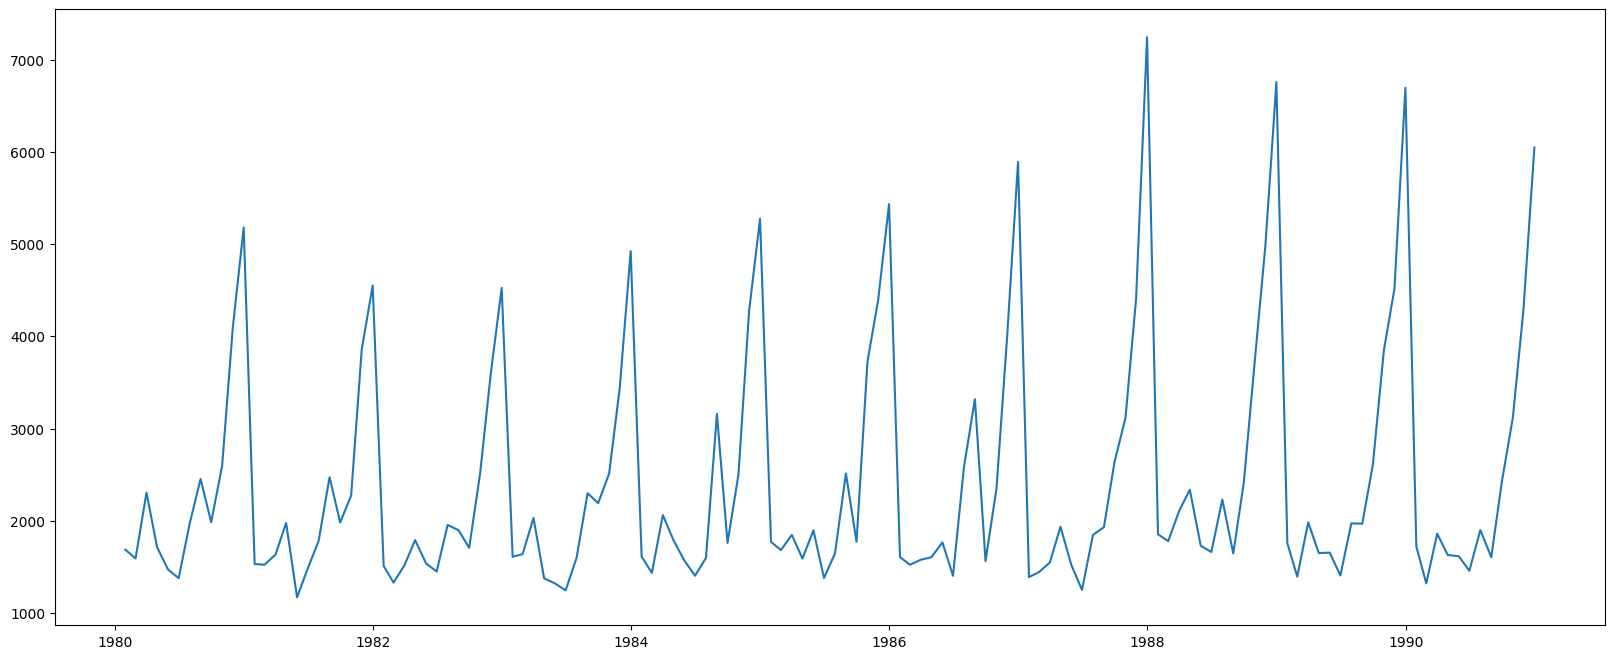

In [170]:
plt.plot(train);

- As noticed from the monthly plot, the time series is relatively constant for each month except for December, which shows a pattern. Since December has the highest sales, it has a significant impact on the time series.

- To address this, we apply a 12-month seasonal difference to the data and examine if it makes the training data stationary.






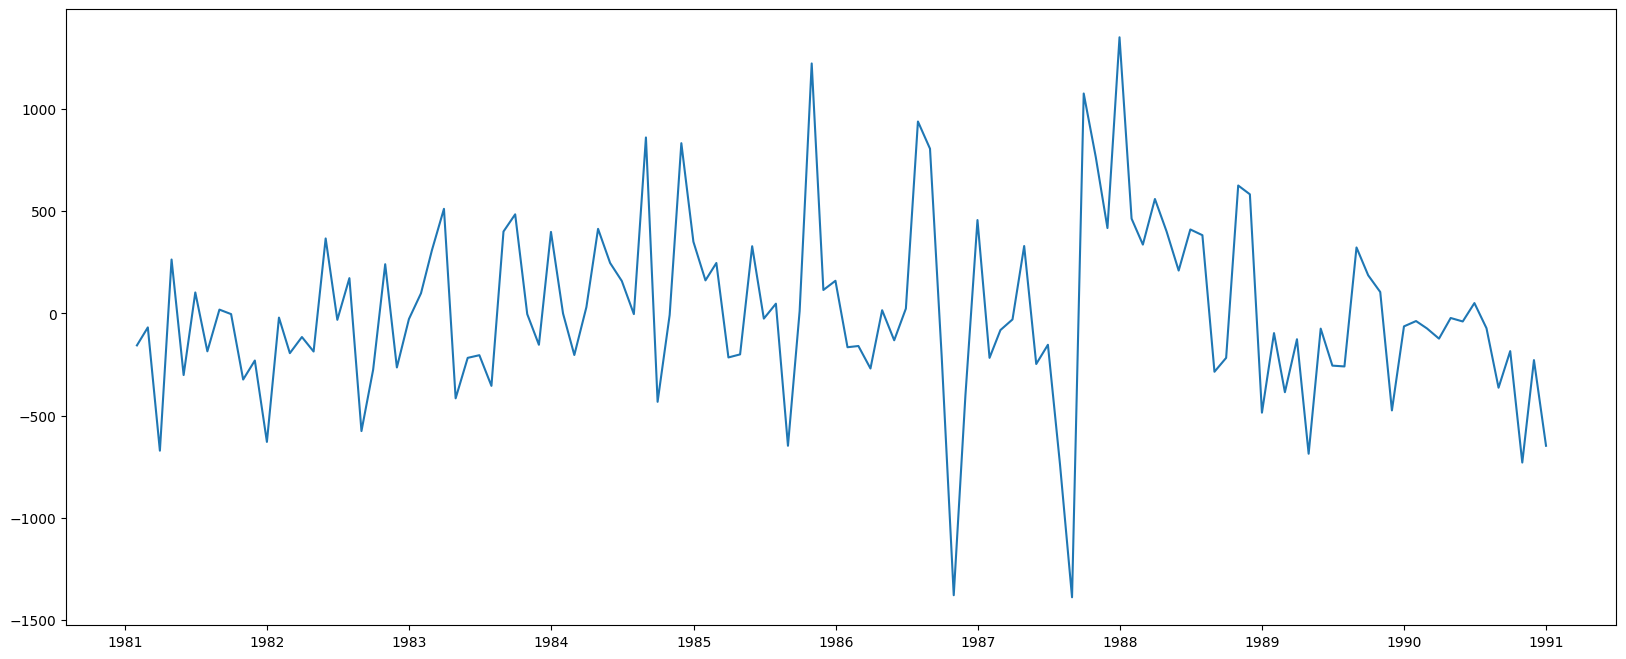

In [171]:
plt.plot(train.diff(12).dropna());

The time series looks stationary. Let's check for stationarity using Augmented Dickey - Fuller Test.

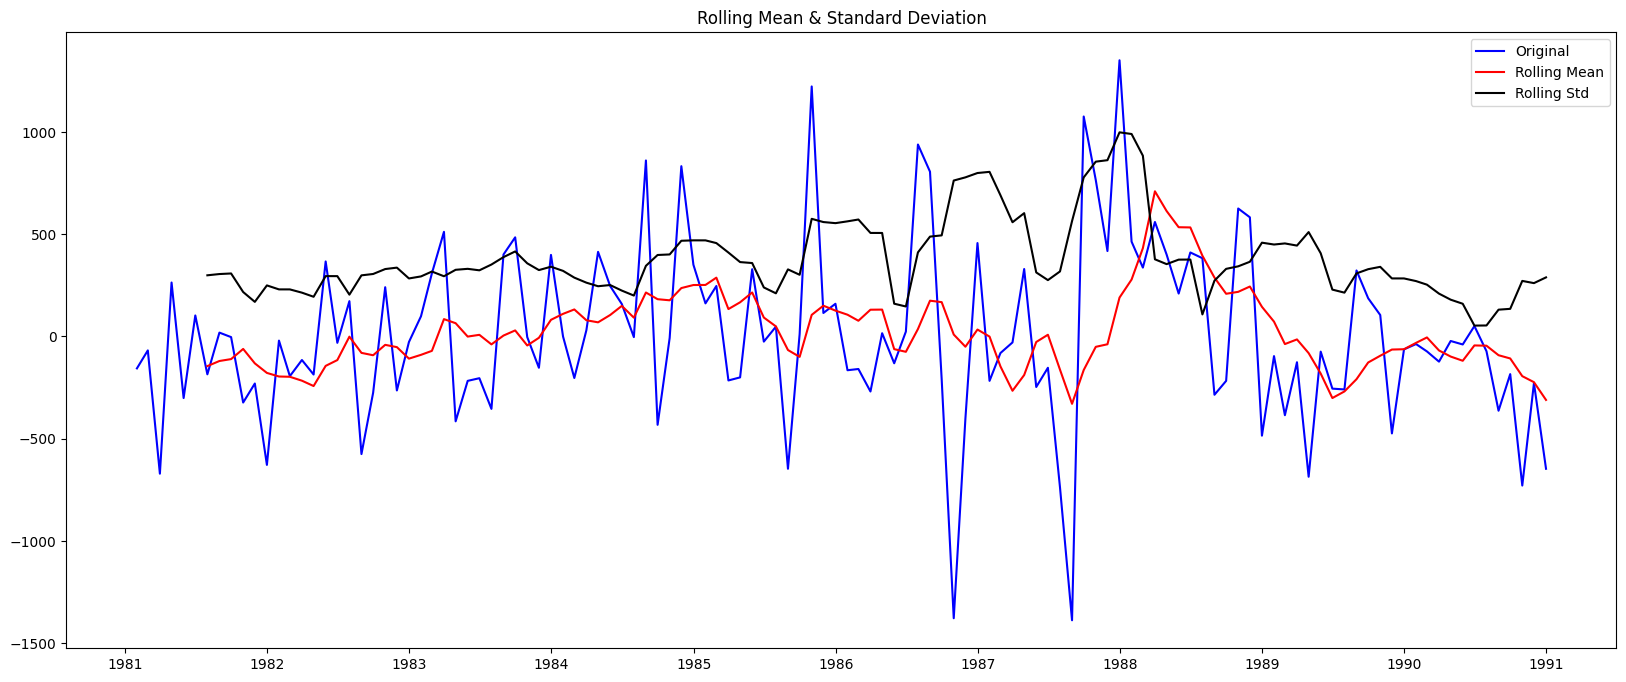

Results of Dickey-Fuller Test:
Test Statistic                  -3.136812
p-value                          0.023946
#Lags Used                      11.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [172]:
test_stationarity(train.diff(12).dropna())

- The p-value is less than 0.05, leading us to reject the null hypothesis (Ho) and conclude that the time series is stationary.

- Therefore, we can build our model with d = 0 (regular differencing) and D = 1 (seasonal differencing), as applying only seasonal differencing makes the time series stationary and prevents over-differencing.






In [173]:
p = q = range(0, 3)
d = [0]
D = [1]
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]

print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 0, 1)(0, 1, 1, 12)
Model: (0, 0, 2)(0, 1, 2, 12)
Model: (1, 0, 0)(1, 1, 0, 12)
Model: (1, 0, 1)(1, 1, 1, 12)
Model: (1, 0, 2)(1, 1, 2, 12)
Model: (2, 0, 0)(2, 1, 0, 12)
Model: (2, 0, 1)(2, 1, 1, 12)
Model: (2, 0, 2)(2, 1, 2, 12)


In [174]:
SARIMA_AIC_sd = pd.DataFrame(columns = ['param', 'seasonal', 'AIC'])
SARIMA_AIC_sd

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [175]:
for param in pdq:
  for param_seasonal in PDQ:
    SARIMA_model = sm.tsa.statespace.SARIMAX(train, order = param, seasonal_order = param_seasonal,
                                             enforce_stationarity = False, enforce_invertibility = False).fit(maxiter = 1000)
    print('SARIMA', param, param_seasonal, '- AIC:', SARIMA_model.aic)
    SARIMA_AIC_sd = SARIMA_AIC_sd.append({'param': param, 'seasonal': param_seasonal, 'AIC': SARIMA_model.aic}, ignore_index = True)

SARIMA (0, 0, 0) (0, 1, 0, 12) - AIC: 1786.4850411919438
SARIMA (0, 0, 0) (0, 1, 1, 12) - AIC: 1596.2586002542675
SARIMA (0, 0, 0) (0, 1, 2, 12) - AIC: 1428.1357423138443
SARIMA (0, 0, 0) (1, 1, 0, 12) - AIC: 1615.044590751547
SARIMA (0, 0, 0) (1, 1, 1, 12) - AIC: 1598.2582087358312
SARIMA (0, 0, 0) (1, 1, 2, 12) - AIC: 1429.7362167410722
SARIMA (0, 0, 0) (2, 1, 0, 12) - AIC: 1441.2182003596358
SARIMA (0, 0, 0) (2, 1, 1, 12) - AIC: 1443.075231617053
SARIMA (0, 0, 0) (2, 1, 2, 12) - AIC: 1429.132845277273
SARIMA (0, 0, 1) (0, 1, 0, 12) - AIC: 1767.392058994786
SARIMA (0, 0, 1) (0, 1, 1, 12) - AIC: 1577.8120190076033
SARIMA (0, 0, 1) (0, 1, 2, 12) - AIC: 1410.1567215348334
SARIMA (0, 0, 1) (1, 1, 0, 12) - AIC: 1610.5860755472986
SARIMA (0, 0, 1) (1, 1, 1, 12) - AIC: 1579.608431116076
SARIMA (0, 0, 1) (1, 1, 2, 12) - AIC: 1411.8978099954627
SARIMA (0, 0, 1) (2, 1, 0, 12) - AIC: 1437.685577414661
SARIMA (0, 0, 1) (2, 1, 1, 12) - AIC: 1439.5176129796287
SARIMA (0, 0, 1) (2, 1, 2, 12) - AIC:

In [176]:
SARIMA_AIC_sd.sort_values(by = 'AIC').head()

param       seasonal          AIC
20  (0, 0, 2)  (0, 1, 2, 12)  1397.037021
47  (1, 0, 2)  (0, 1, 2, 12)  1397.239335
74  (2, 0, 2)  (0, 1, 2, 12)  1397.783884
23  (0, 0, 2)  (1, 1, 2, 12)  1398.924576
50  (1, 0, 2)  (1, 1, 2, 12)  1399.001907

- p = 0, d = 0, q = 2, P = 0, D = 1, Q = 2, S = 12

In [177]:
auto_SARIMA_sd = sm.tsa.statespace.SARIMAX(train, order = (0, 0, 2), seasonal_order = (0, 1, 2, 12),
                                        enforce_stationarity = False, enforce_invertibility = False).fit(maxiter = 1000)
print(auto_SARIMA_sd.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 0, 2)x(0, 1, 2, 12)   Log Likelihood                -693.519
Date:                            Sun, 06 Aug 2023   AIC                           1397.037
Time:                                    15:35:05   BIC                           1409.700
Sample:                                01-31-1980   HQIC                          1402.150
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2746      0.106      2.583      0.010       0.066       0.483
ma.L2         -0.0647      0.116   

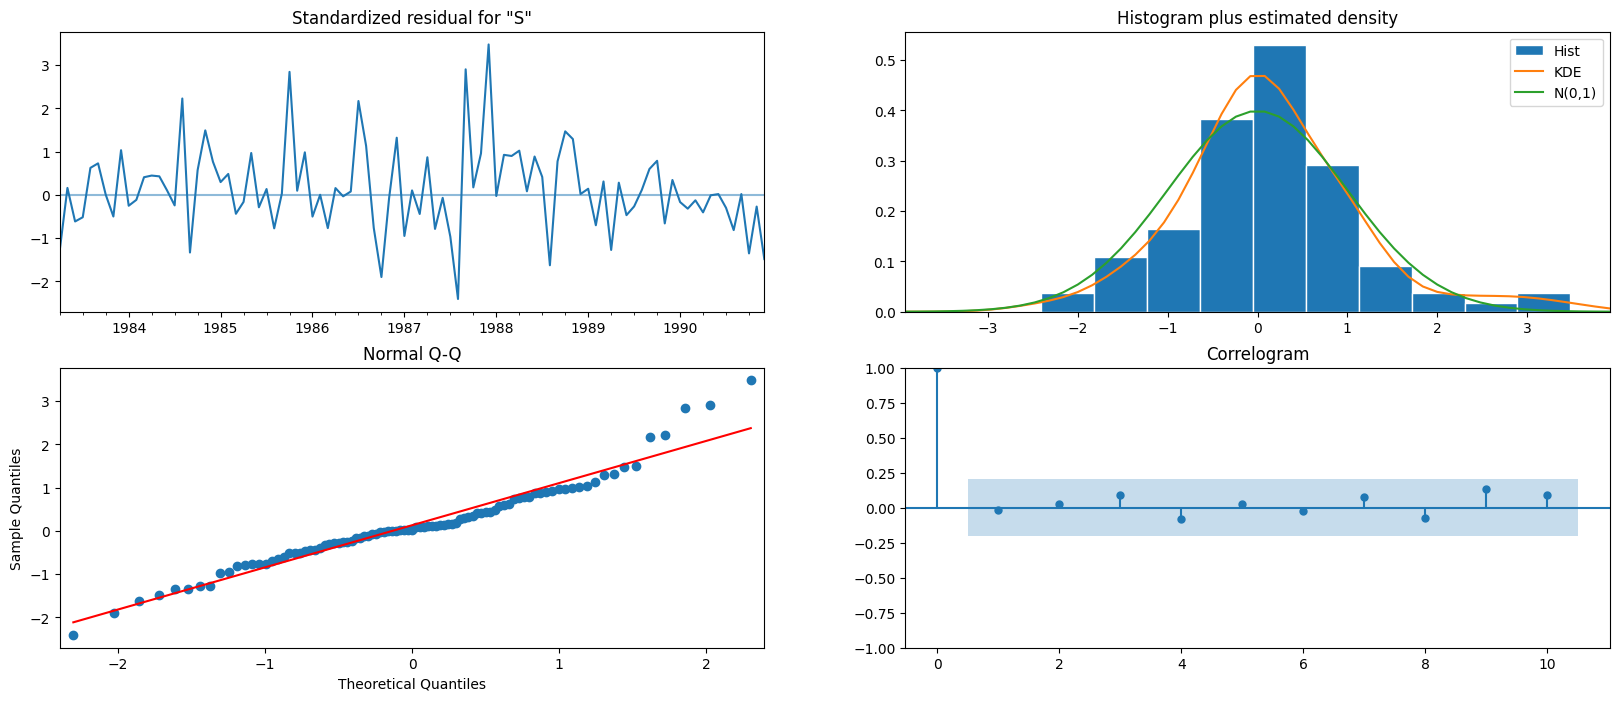

In [178]:
auto_SARIMA_sd.plot_diagnostics();

In [179]:
pred_auto_SARIMA_sd = auto_SARIMA_sd.get_forecast(len(test))

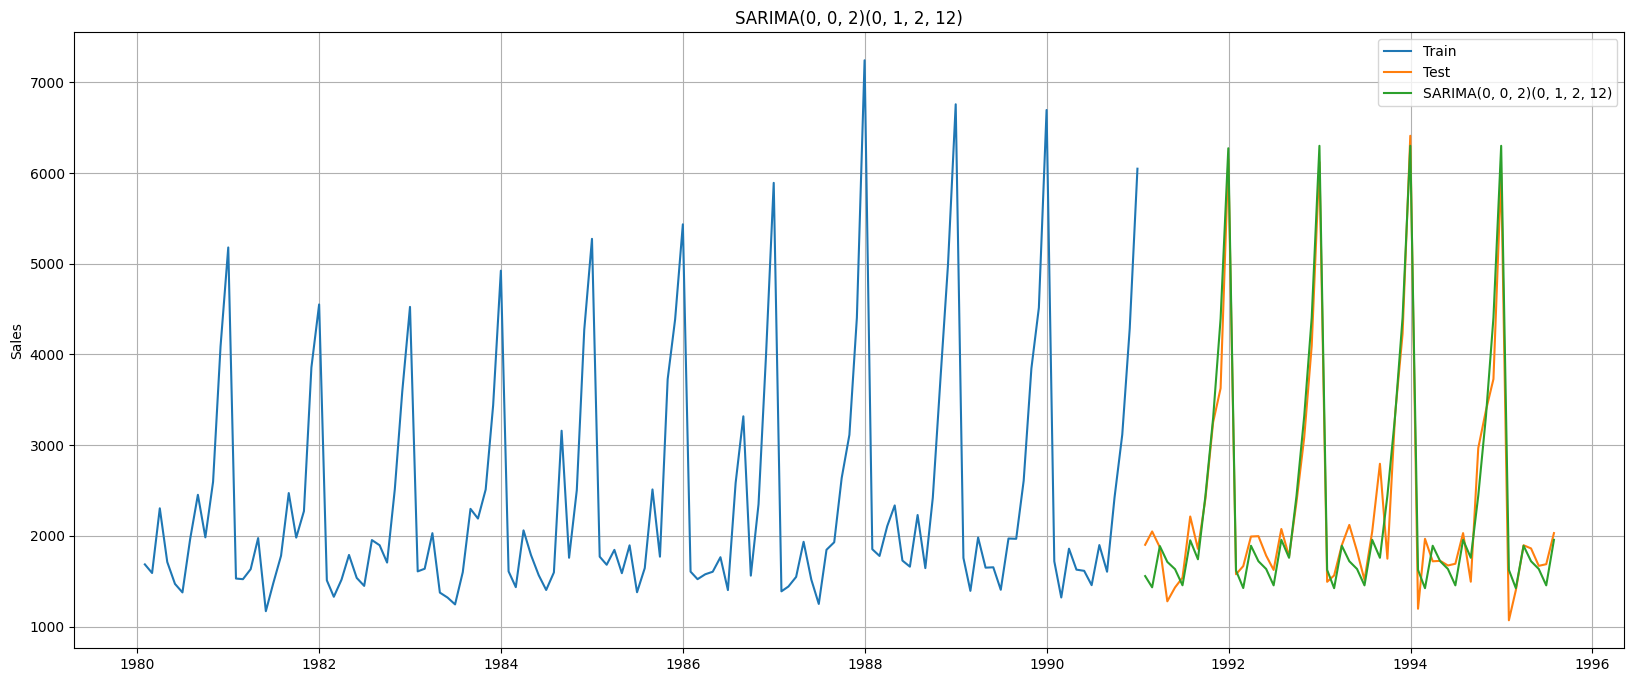

In [180]:
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(pred_auto_SARIMA_sd.predicted_mean, label = 'SARIMA(0, 0, 2)(0, 1, 2, 12)')
plt.legend(loc = 'best')
plt.grid()
plt.ylabel('Sales')
plt.title('SARIMA(0, 0, 2)(0, 1, 2, 12)');

In [181]:
#Calculating RMSE on Train data
pred_train_auto_SARIMA_sd = auto_SARIMA_sd.fittedvalues

# Ensure both arrays have the same length by adjusting the indexing
train = train.iloc[-len(pred_train_auto_SARIMA_sd):]

rmse_train_auto_SARIMA_sd = mean_squared_error(train, pred_train_auto_SARIMA_sd, squared=False)
rmse_train_auto_SARIMA_sd

861.687679848736

In [182]:
train_rmse13 = pd.DataFrame({'Train_RMSE': [round(rmse_train_auto_SARIMA_sd, 2)]}, index=['Automated SARIMA(0, 0, 2)(0, 1, 2, 12)'])

train_rmse = pd.concat([train_rmse, train_rmse13])
train_rmse

Train_RMSE
Linear Regression On Time                              1279.32
NaiveModel                                             3867.70
Simple Average Model                                   1298.48
2 point Trailing Moving Average                         706.18
Alpha = 0.07 Simple Exponential Smoothing              1322.90
Alpha = 0.02 Simple Exponential Smoothing              1346.26
Alpha=0.665, Beta = 0.0001 Double Exponential S...     1339.50
Alpha = 0.02, Beta = 0.38 Double Exponential Sm...     1398.03
Alpha = 0.111, Beta = 0.049, Gamma = 0.362 Trip...      355.77
Alpha = 0.01, Beta = 0.04, Gamma = 0.25 Triple ...      470.84
Automated ARIMA(2, 1, 2)                               1076.51
Automated SARIMA(1, 1, 2)(1, 0, 2, 12)                  592.29
Automated SARIMA(0, 0, 2)(0, 1, 2, 12)                  861.69

####Model Evaluation

In [183]:
#MAPE
mape_auto_SARIMA_sd = MAPE(test.values, pred_auto_SARIMA_sd.predicted_mean.values)
print('MAPE =', round(mape_auto_SARIMA_sd, 2))

MAPE = 51.69


In [184]:
#RMSE
rmse_auto_SARIMA_sd = mean_squared_error(test, pred_auto_SARIMA_sd.predicted_mean, squared = False)
print('RMSE =', round(rmse_auto_SARIMA_sd, 2))

RMSE = 317.06


In [185]:
resultsDf12 = pd.DataFrame({'Test_RMSE': round(rmse_auto_SARIMA_sd, 2), 'MAPE': round(mape_auto_SARIMA_sd, 2)}, index = ['Automated SARIMA(0, 0, 2)(0, 1, 2, 12)'])

resultsDf = pd.concat([resultsDf, resultsDf12])
resultsDf

Test_RMSE    MAPE
Linear Regression On Time                             1389.14   59.35
NaiveModel                                            3864.28  201.33
Simple Average Model                                  1275.08   39.16
2 point Trailing Moving Average                        813.40   24.71
Alpha = 0.07 Simple Exponential Smoothing             1338.00   53.88
Alpha = 0.02 Simple Exponential Smoothing             1278.50   42.41
Alpha=0.665, Beta = 0.0001 Double Exponential S...    5291.88  268.91
Alpha = 0.02, Beta = 0.38 Double Exponential Sm...    1275.87   40.97
Alpha = 0.111, Beta = 0.049, Gamma = 0.362 Trip...     403.71   48.37
Alpha = 0.01, Beta = 0.04, Gamma = 0.25 Triple ...     302.73   49.86
Automated ARIMA(2, 1, 2)                              1299.98   49.42
Automated SARIMA(1, 1, 2)(1, 0, 2, 12)                 528.66   59.91
Automated SARIMA(0, 0, 2)(0, 1, 2, 12)                 317.06   51.69

**Insights:**
- The SARIMA model successfully captures both the trend and seasonality in the data.
- The Root Mean Square Error is 317.06, and the Mean Absolute Percentage Error is 51.69 for the automated SARIMA model with seasonal differencing.
- This model performs better than the model without seasonal differencing, indicating that incorporating seasonal differencing improves the accuracy of the forecast.






## **7. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.**

- We created two Tables for Test & Train RMSE, let'scombine both & see the final results in single Table:-

In [186]:
pip install tabulate


In [187]:
from tabulate import tabulate

# Creating new DataFrame Final_results & sort it based on Test RMSE
Final_results = pd.merge(train_rmse, resultsDf, left_index=True, right_index=True, how='outer')
Final_results_sorted = Final_results.sort_values(by='Test_RMSE')

# Convert the train_rmse DataFrame to a tabular form
train_rmse_table = tabulate(train_rmse, headers='keys', tablefmt='pretty')

# Convert the resultsDf DataFrame to a tabular form
resultsDf_table = tabulate(resultsDf, headers='keys', tablefmt='pretty')

# Convert the Final_results_sorted DataFrame to a tabular form
final_results_table = tabulate(Final_results_sorted, headers='keys', tablefmt='pretty')
print("\nFinal Results Table:")
print(final_results_table)


Final Results Table:
+-------------------------------------------------------------------------+------------+-----------+--------+
|                                                                         | Train_RMSE | Test_RMSE |  MAPE  |
+-------------------------------------------------------------------------+------------+-----------+--------+
|  Alpha = 0.01, Beta = 0.04, Gamma = 0.25 Triple Exponential Smoothing   |   470.84   |  302.73   | 49.86  |
|                 Automated SARIMA(0, 0, 2)(0, 1, 2, 12)                  |   861.69   |  317.06   | 51.69  |
| Alpha = 0.111, Beta = 0.049, Gamma = 0.362 Triple Exponential Smoothing |   355.77   |  403.71   | 48.37  |
|                 Automated SARIMA(1, 1, 2)(1, 0, 2, 12)                  |   592.29   |  528.66   | 59.91  |
|                     2 point Trailing Moving Average                     |   706.18   |   813.4   | 24.71  |
|                          Simple Average Model                           |  1298.48   |  1275.08 

## **8. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.**

###Building the most optimum model on the Full Data.

In [188]:
#Let's check the best performing models:

Final_results.sort_values(by = 'Test_RMSE').head()

Train_RMSE  Test_RMSE  \
Alpha = 0.01, Beta = 0.04, Gamma = 0.25 Triple ...      470.84     302.73   
Automated SARIMA(0, 0, 2)(0, 1, 2, 12)                  861.69     317.06   
Alpha = 0.111, Beta = 0.049, Gamma = 0.362 Trip...      355.77     403.71   
Automated SARIMA(1, 1, 2)(1, 0, 2, 12)                  592.29     528.66   
2 point Trailing Moving Average                         706.18     813.40   

                                                     MAPE  
Alpha = 0.01, Beta = 0.04, Gamma = 0.25 Triple ...  49.86  
Automated SARIMA(0, 0, 2)(0, 1, 2, 12)              51.69  
Alpha = 0.111, Beta = 0.049, Gamma = 0.362 Trip...  48.37  
Automated SARIMA(1, 1, 2)(1, 0, 2, 12)              59.91  
2 point Trailing Moving Average                     24.71

The most optimum models for forecasting are:

- Tuned Triple Exponential Model with Alpha = 0.01, Beta = 0.04, and Gamma = 0.25 having test RMSE 302.73 and MAPE 49.96
- Automated SARIMA with seasonal differencing - SARIMA(0, 0, 2)(0, 1, 2, 12) having test RMSE 317.06	 and MAPE 51.69
- Triple Exponential Smoothing with Alpha = 0.111, Beta = 0.049, and Gamma = 0.362, which has a Root Mean Square Error of 403.71 and Mean Absolute Percentage Error of 48.37.





###Forecasting - Tuned Triple Exponential Model with Alpha = 0.01, Beta = 0.04, Gamma = 0.25

In [189]:
full_data_model1 = ExponentialSmoothing(df,
                                        trend = 'additive',
                                        seasonal = 'multiplicative',
                                           initialization_method ='estimated').fit(smoothing_level = 0.01,
                                                                                    smoothing_trend = 0.04,
                                                                                    smoothing_seasonal = 0.25)

In [190]:
print('RMSE Full Model =', mean_squared_error(df, full_data_model1.fittedvalues, squared = False))

RMSE Full Model = 416.5022680489737


In [191]:
pred_full_data = full_data_model1.forecast(12)

- Assumption: Forecast distribution's standard deviation ≈ Residual standard deviation.
- Purpose: Helps estimate uncertainty in the forecast.
- Use: Construct confidence intervals with a specified level of confidence.







In [192]:
pred_df = pd.DataFrame({'lower_ci': pred_full_data - 1.96 * np.std(full_data_model1.resid, ddof = 1),
                        'prediction': pred_full_data,
                        'upper_ci': pred_full_data + 1.96 * np.std(full_data_model1.resid, ddof = 1)})
pred_df

lower_ci   prediction     upper_ci
1995-08-31  1200.848838  1996.325100  2791.801361
1995-09-30  1592.834233  2388.310494  3183.786755
1995-10-31  2482.423911  3277.900172  4073.376433
1995-11-30  3277.056202  4072.532463  4868.008724
1995-12-31  5380.157921  6175.634182  6971.110443
1996-01-31   625.254007  1420.730268  2216.206529
1996-02-29   838.088822  1633.565084  2429.041345
1996-03-31  1075.186663  1870.662925  2666.139186
1996-04-30  1030.764395  1826.240656  2621.716917
1996-05-31   885.435997  1680.912258  2476.388519
1996-06-30   794.407425  1589.883686  2385.359947
1996-07-31  1249.849273  2045.325534  2840.801795

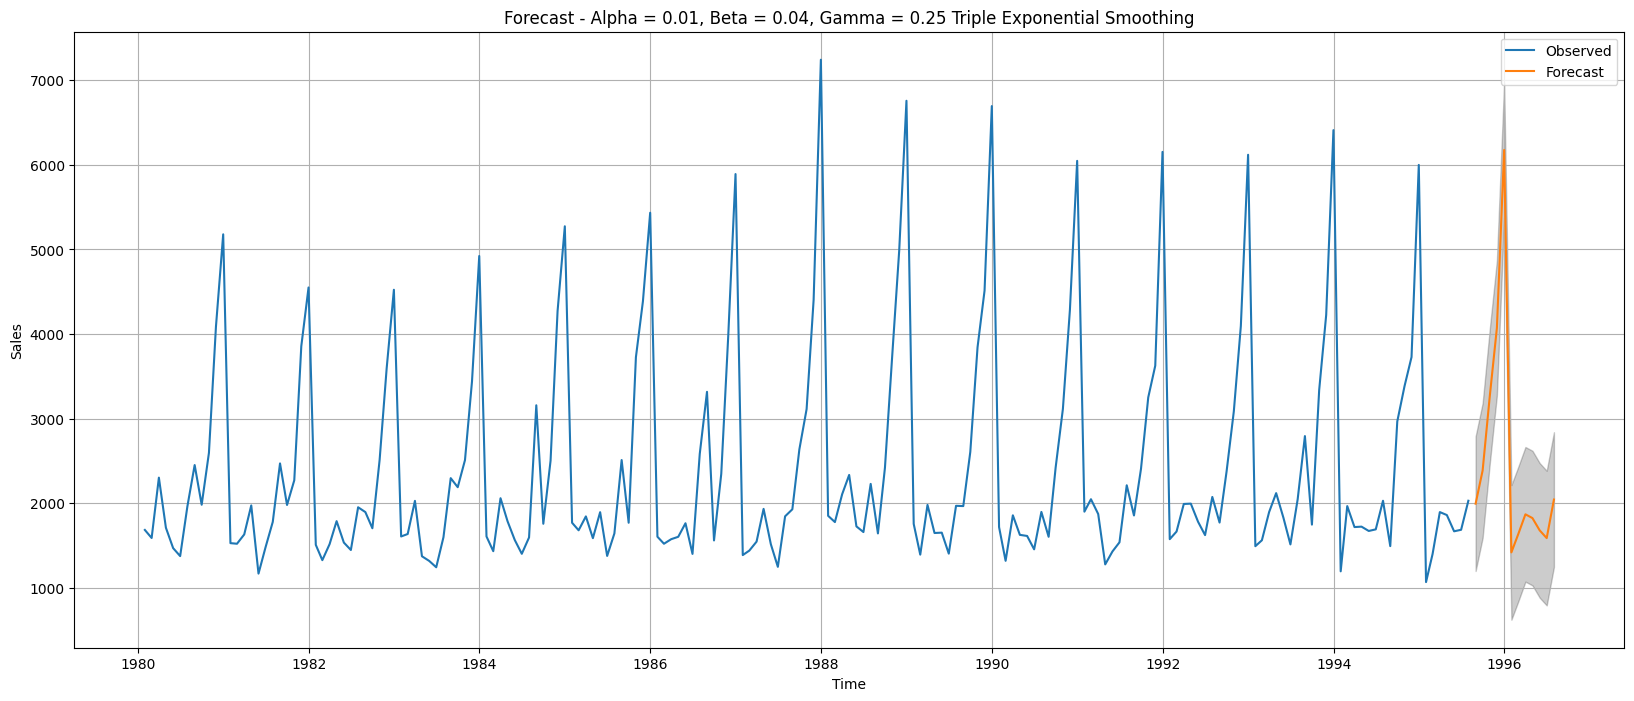

In [193]:
plt.plot(df, label = 'Observed')
plt.plot(pred_df['prediction'], label = 'Forecast')
plt.fill_between(pred_df.index, pred_df['lower_ci'], pred_df['upper_ci'], color = 'k', alpha = 0.20)

plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend(loc = 'best')
plt.title('Forecast - Alpha = 0.01, Beta = 0.04, Gamma = 0.25 Triple Exponential Smoothing')
plt.grid();

###Forecasting - Automated SARIMA with seasonal differencing - SARIMA(0, 0, 2)(0, 1, 2, 12)

Before building the SARIMA models on the full data, we need to check  the stationarity after applying seasonal differencing D=12.

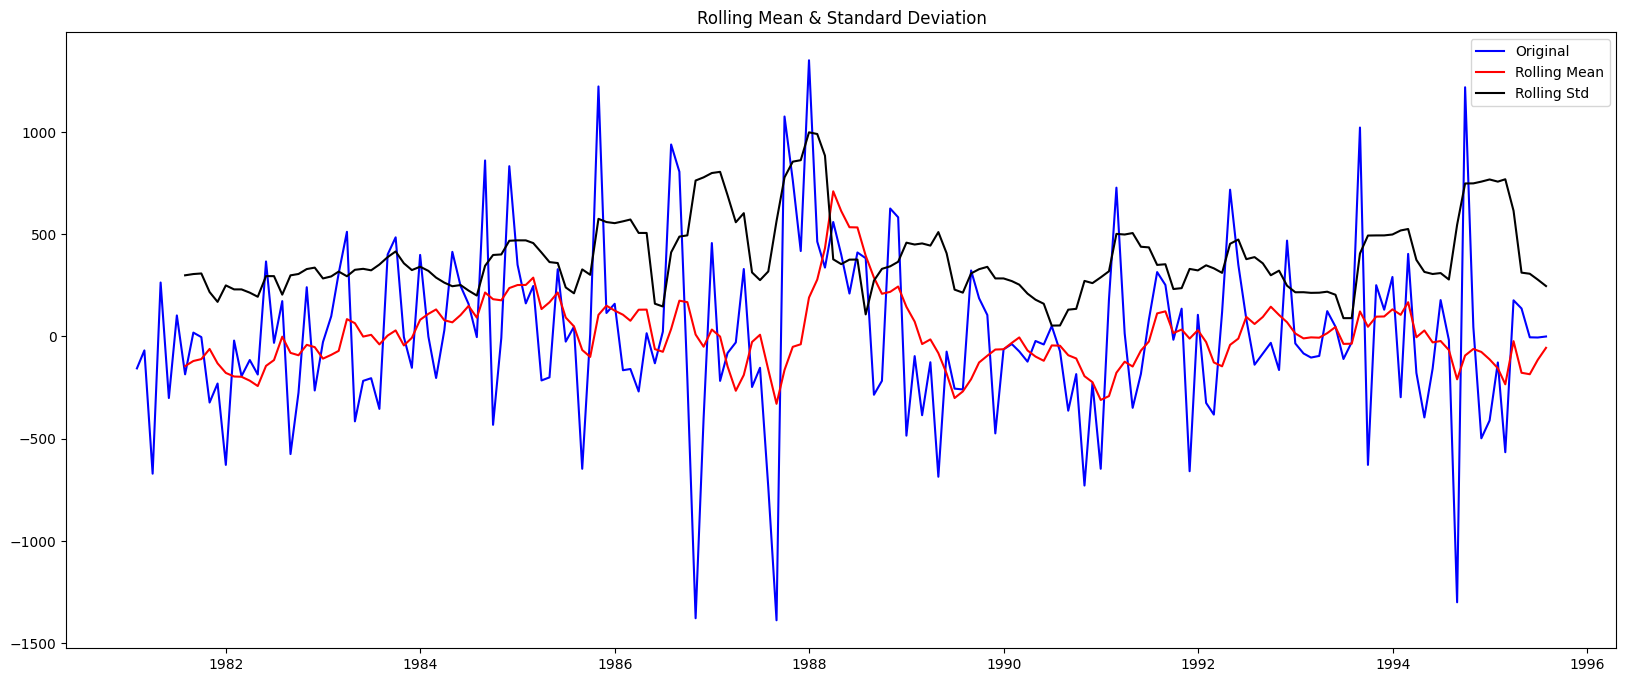

Results of Dickey-Fuller Test:
Test Statistic                  -4.460165
p-value                          0.000232
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [194]:
test_stationarity(df.diff(12).dropna())

at p-value < 0.05 we reject the Null Hypothesis & conclude that the full data is also Stationary at 95% confidence level

In [195]:
full_data_model2 = sm.tsa.statespace.SARIMAX(df,
                                order=(1,1,2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model2 = full_data_model2.fit(maxiter=1000)
print(results_full_data_model2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -1173.413
Date:                            Sun, 06 Aug 2023   AIC                           2360.827
Time:                                    15:35:15   BIC                           2382.309
Sample:                                01-31-1980   HQIC                          2369.551
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6610      0.242     -2.734      0.006      -1.135      -0.187
ma.L1         -0.2739      0.200   

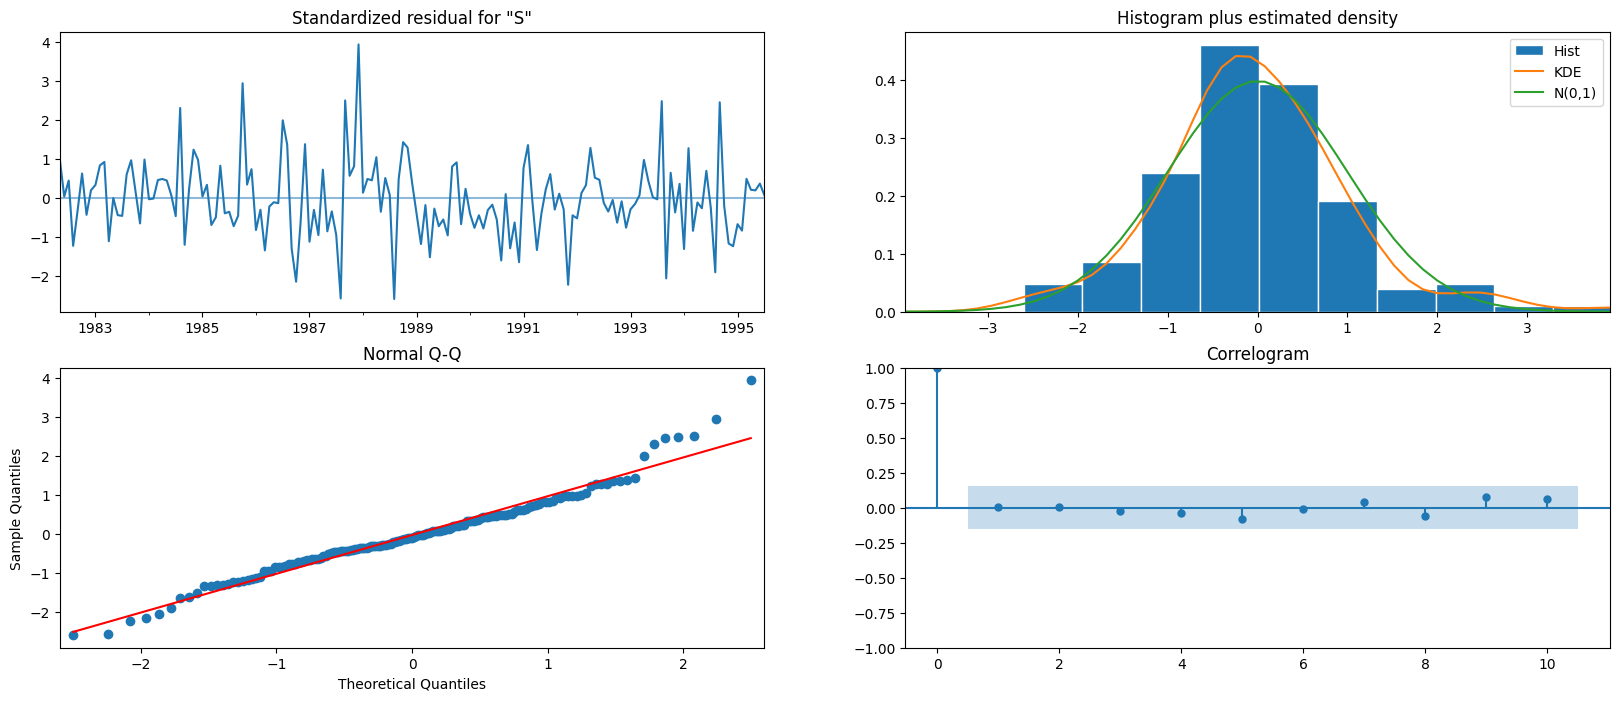

In [196]:
results_full_data_model2.plot_diagnostics();

#### Evaluate the model on the whole and predict 12 months into the future

In [197]:
predicted_SARIMA_full_data = results_full_data_model2.get_forecast(steps=12)

In [198]:
predicted_SARIMA_full_data.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1836.367093  379.710188    1092.148801    2580.585385
1995-09-30  2489.589237  384.474504    1736.033056    3243.145418
1995-10-31  3324.586557  384.580305    2570.823009    4078.350105
1995-11-30  4020.224547  386.338744    3263.014522    4777.434571
1995-12-31  6289.999972  386.393292    5532.683035    7047.316909

In [199]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model2.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 539.9853944534857


In [200]:
pred_full_SARIMA_date = predicted_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

In [201]:
pred_full_SARIMA_date

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1836.367093  379.710188    1092.148801    2580.585385
1995-09-30  2489.589237  384.474504    1736.033056    3243.145418
1995-10-31  3324.586557  384.580305    2570.823009    4078.350105
1995-11-30  4020.224547  386.338744    3263.014522    4777.434571
1995-12-31  6289.999972  386.393292    5532.683035    7047.316909
1996-01-31  1244.690294  387.303811     485.588774    2003.791815
1996-02-29  1533.142520  387.532185     773.593395    2292.691645
1996-03-31  1821.702218  388.159318    1060.923933    2582.480502
1996-04-30  1788.492996  388.499401    1027.048163    2549.937830
1996-05-31  1627.566794  389.018579     865.104390    2390.029197
1996-06-30  1563.321091  389.414529     800.082639    2326.559542
1996-07-31  2000.702985  389.889175    1236.534244    2764.871726

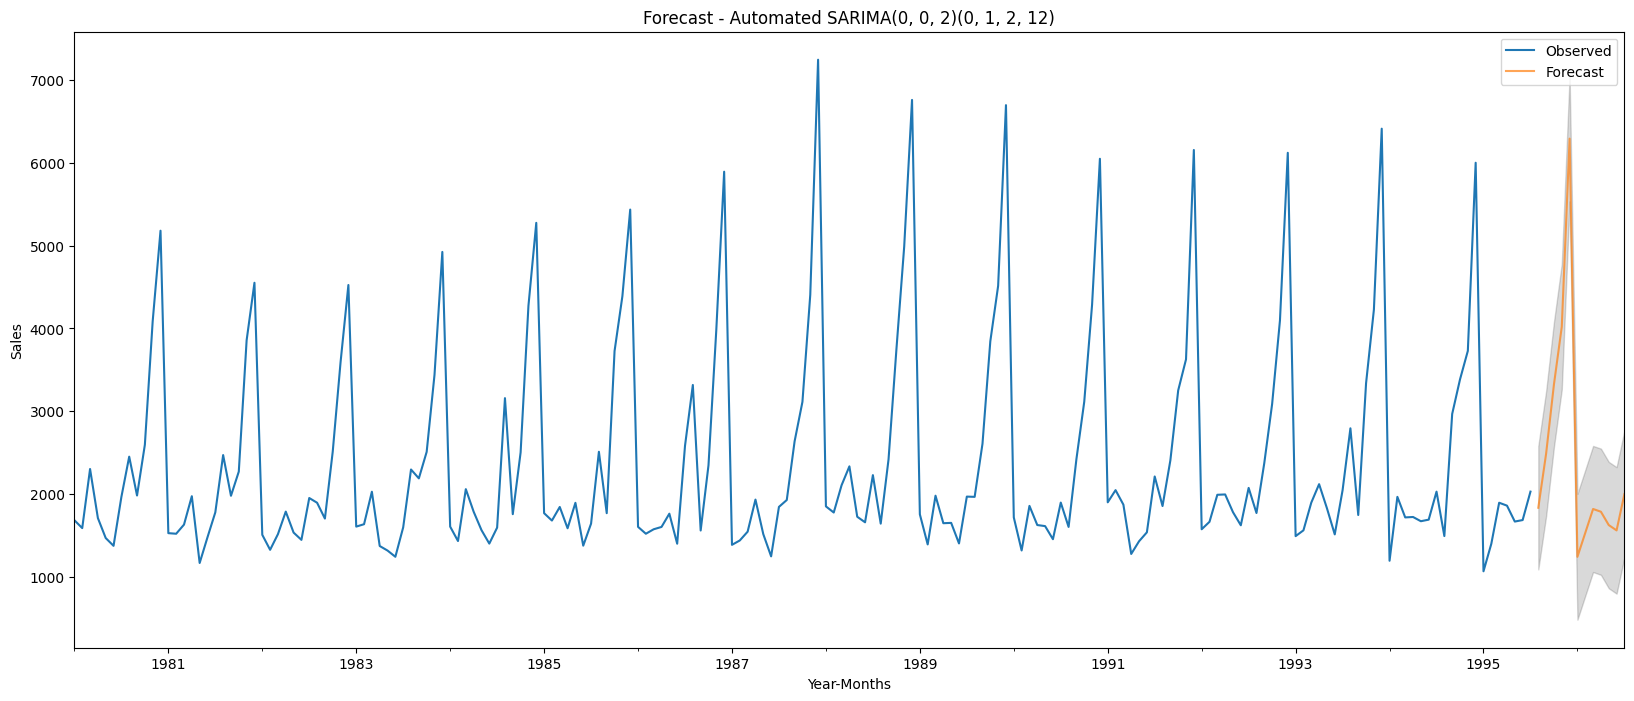

In [202]:
# plot the forecast along with the confidence band

axis = df['Sparkling'].plot(label='Observed')
pred_full_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_SARIMA_date.index, pred_full_SARIMA_date['mean_ci_lower'],
                  pred_full_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.title('Forecast - Automated SARIMA(0, 0, 2)(0, 1, 2, 12)')
plt.legend(loc='best')
plt.show()

## **9. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.**

#### **Model Performance:** After evaluating various forecasting models, the top-performing ones are:

- **Tuned Triple Exponential Model** (Alpha = 0.01, Beta = 0.04, Gamma = 0.25): It shows the **best accuracy** with a Test RMSE of 302.73 and MAPE of 49.86.
- **Automated SARIMA with Seasonal Differencing** (SARIMA(0, 0, 2)(0, 1, 2, 12)): It also **performs well**, with a Test RMSE of 317.06 and MAPE of 51.69.
- **Triple Exponential Smoothing** (Alpha = 0.111, Beta = 0.049, Gamma = 0.362): This model is the third-best with a Test RMSE of 403.71 and MAPE of 48.37.
- On the other hand, the Alpha=0.665, Beta = 0.0001 **Double Exponential Smoothing model** performs **poorly** with a high Test RMSE of 5291.88 and MAPE of 268.91.


#### **Predictions on Full Data:** For the best 2 model

- **Tuned Triple Exponential Model** with Alpha = 0.01, Beta = 0.04, and Gamma = 0.25, the RMSE of the Full Model is 416.50.

- **Automated SARIMA with Seasonal Differencing** (SARIMA(0, 0, 2)(0, 1, 2, 12)): It also performs well, with a full model RMSE of 539.99

- These two models projects the sales trend for 12 months ahead based on historical patterns.

- Both models give a similar forecast, indicating that the constant trend & seasonality observed in the sales of previous few years will continue with a slight increase in sales during the holiday season (November – December) compared to last year.


#### **Measures for Future Sales**

Based on the analysis, the company can take the following measures to improve future sales:


- **Capitalize on Seasonal Trends:** With observed seasonal patterns during November and December, the company should plan production and marketing efforts to meet increased demand during holiday seasons.


- **Inventory Management:** Implement effective inventory management to avoid stockouts during peak periods and minimize excess inventory during slower periods.

- **Pricing Strategy:** Utilize dynamic pricing to adjust prices during peak and off-peak periods, attracting more customers and optimizing revenue.

- **Customer Engagement**: Strengthen customer relationships through personalized offers, loyalty programs, and active engagement to foster repeat purchases.
